In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
from stacked_data import stacked_data
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble

Using TensorFlow backend.


/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

# Ensemble models

In [3]:
# Parameters
MODELS = ['23c07175-158e-4ae6-957a-92d59edbddc7', '0dc80db6-a8be-494d-bf8a-3f436bf32aa1']
SCORE = "accuracy"


In [4]:
models = MODELS
print("models: {}".format(models))

models: ['23c07175-158e-4ae6-957a-92d59edbddc7', '0dc80db6-a8be-494d-bf8a-3f436bf32aa1']


In [5]:
sd = stacked_data(uuids=models)

  0%|          | 0/708 [00:00<?, ?it/s]

Training points = 708
Benign: 378, Intermediate: 330, Malignant: 0

Validation points = 202
Benign: 108, Intermediate: 94, Malignant: 0

Testing points = 101
Benign: 54, Intermediate: 47, Malignant: 0
bone-penn-281
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 1/708 [00:00<01:42,  6.87it/s]

  0%|          | 3/708 [00:00<01:29,  7.87it/s]

bone-china-005
Does this patient have T2 available? True
I'm doing the thing.
bone-china-080
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-330
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 4/708 [00:00<02:08,  5.49it/s]

  1%|          | 5/708 [00:00<02:01,  5.77it/s]

bone-penn-95
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-564
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 6/708 [00:00<01:54,  6.12it/s]

  1%|          | 7/708 [00:01<01:43,  6.76it/s]

bone-china-167
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-145
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 8/708 [00:01<01:52,  6.21it/s]

bone-penn-567
Does this patient have T2 available? True
T2 image unavailable
bone-china-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 11/708 [00:01<01:52,  6.21it/s]

  2%|▏         | 12/708 [00:01<01:39,  7.00it/s]

bone-china-106
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 14/708 [00:02<01:45,  6.58it/s]

  2%|▏         | 15/708 [00:02<01:39,  6.96it/s]

bone-china-041
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 16/708 [00:02<03:14,  3.56it/s]

  2%|▏         | 17/708 [00:03<02:50,  4.05it/s]

bone-penn-590
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-159
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 18/708 [00:03<02:37,  4.38it/s]

  3%|▎         | 19/708 [00:03<02:22,  4.84it/s]

bone-penn-347
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-264
Does this patient have T2 available? False
T2 image unavailable
bone-penn-518
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 21/708 [00:03<02:14,  5.11it/s]

  3%|▎         | 22/708 [00:03<02:02,  5.59it/s]

bone-hup-287
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-301
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 23/708 [00:04<02:06,  5.43it/s]

  3%|▎         | 24/708 [00:04<01:53,  6.04it/s]

bone-hup-278
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-545
Does this patient have T2 available? False
T2 image unavailable
bone-hup-266
Does this patient have T2 available? True
I'm doing the thing.


  4%|▎         | 26/708 [00:04<01:49,  6.24it/s]

bone-hup-326
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 27/708 [00:05<03:05,  3.67it/s]

  4%|▍         | 29/708 [00:05<02:20,  4.84it/s]

bone-hup-140
Does this patient have T2 available? False
T2 image unavailable
bone-china-039
Does this patient have T2 available? True
I'm doing the thing.
bone-china-033
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-476
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 31/708 [00:05<01:51,  6.05it/s]

bone-penn-612
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 33/708 [00:05<02:23,  4.71it/s]

bone-china-002
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T2 available? False
T2 image unavailable
bone-penn-509
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-293
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 36/708 [00:06<01:48,  6.19it/s]

bone-hup-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-527
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 38/708 [00:06<01:48,  6.16it/s]

bone-penn-503
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-413
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 40/708 [00:06<01:42,  6.50it/s]

  6%|▌         | 41/708 [00:06<01:37,  6.83it/s]

bone-penn-303
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 42/708 [00:06<01:34,  7.08it/s]

bone-penn-535
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 43/708 [00:07<02:11,  5.06it/s]

  6%|▋         | 45/708 [00:07<01:49,  6.06it/s]

bone-penn-481
Does this patient have T2 available? True
I'm doing the thing.
bone-china-022
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-107
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 46/708 [00:07<02:20,  4.71it/s]

bone-penn-276
Does this patient have T2 available? True
T2 image unavailable
bone-hup-129
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 48/708 [00:08<02:23,  4.61it/s]

  7%|▋         | 49/708 [00:08<02:07,  5.18it/s]

bone-china-168
Does this patient have T2 available? True
I'm doing the thing.
bone-china-035
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 51/708 [00:08<01:49,  5.99it/s]

bone-china-155
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-323
Does this patient have T2 available? True
T2 image unavailable
bone-china-014
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-562
Does this patient have T2 available? False
T2 image unavailable
bone-china-100
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 55/708 [00:08<01:25,  7.64it/s]

bone-penn-561
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 57/708 [00:09<01:35,  6.79it/s]

bone-penn-304
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-560
Does this patient have T2 available? False
T2 image unavailable
bone-penn-473
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 59/708 [00:09<01:20,  8.07it/s]

  9%|▊         | 61/708 [00:09<01:10,  9.20it/s]

bone-china-032
Does this patient have T2 available? True
I'm doing the thing.
bone-china-070
Does this patient have T2 available? True
I'm doing the thing.
bone-china-043
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 63/708 [00:09<01:12,  8.93it/s]

bone-penn-346
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 65/708 [00:10<01:39,  6.45it/s]

bone-penn-297
Does this patient have T2 available? True
I'm doing the thing.
bone-china-136
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 68/708 [00:10<01:21,  7.81it/s]

bone-penn-88
Does this patient have T2 available? False
T2 image unavailable
bone-china-151
Does this patient have T2 available? True
I'm doing the thing.
bone-china-038
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 70/708 [00:10<01:24,  7.59it/s]

bone-china-160
Does this patient have T2 available? True
I'm doing the thing.
bone-china-132
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 71/708 [00:10<01:20,  7.96it/s]

 10%|█         | 72/708 [00:10<01:21,  7.83it/s]

bone-penn-90
Does this patient have T2 available? True
I'm doing the thing.
bone-china-133
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 73/708 [00:10<01:18,  8.09it/s]

 10%|█         | 74/708 [00:11<01:19,  7.97it/s]

bone-china-124
Does this patient have T2 available? True
I'm doing the thing.
bone-china-008
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 75/708 [00:11<01:15,  8.36it/s]

bone-penn-284
Does this patient have T2 available? False
T2 image unavailable
bone-penn-552
Does this patient have T2 available? False
T2 image unavailable
bone-hup-297
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 78/708 [00:12<01:47,  5.87it/s]

bone-penn-83
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 79/708 [00:12<02:17,  4.56it/s]

bone-penn-89
Does this patient have T2 available? False
T2 image unavailable
bone-china-060
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-471
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 82/708 [00:12<01:49,  5.74it/s]

 12%|█▏        | 83/708 [00:12<01:36,  6.49it/s]

bone-penn-317
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 84/708 [00:12<01:52,  5.55it/s]

bone-penn-332
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 85/708 [00:13<02:10,  4.77it/s]

 12%|█▏        | 86/708 [00:13<01:53,  5.47it/s]

bone-china-023
Does this patient have T2 available? True
I'm doing the thing.
bone-china-162
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-525
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 88/708 [00:13<02:15,  4.57it/s]

 13%|█▎        | 89/708 [00:14<01:53,  5.44it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140127
Name: bone-penn-525, dtype: object
index 161 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 13%|█▎        | 90/708 [00:14<03:26,  2.99it/s]

bone-china-051
Does this patient have T2 available? True
I'm doing the thing.
bone-china-126
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 92/708 [00:15<02:51,  3.59it/s]

bone-penn-497
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 94/708 [00:15<02:19,  4.40it/s]

 13%|█▎        | 95/708 [00:15<01:56,  5.24it/s]

bone-penn-282
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-291
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▎        | 96/708 [00:15<01:40,  6.10it/s]

bone-penn-100
Does this patient have T2 available? False
T2 image unavailable
bone-penn-570
Does this patient have T2 available? False
T2 image unavailable
bone-penn-480
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 99/708 [00:15<01:23,  7.32it/s]

bone-penn-536
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 100/708 [00:15<01:53,  5.35it/s]

bone-penn-520
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-119
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 102/708 [00:16<01:39,  6.12it/s]

bone-penn-82
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 103/708 [00:16<01:48,  5.58it/s]

 15%|█▍        | 106/708 [00:16<01:25,  7.07it/s]

bone-china-107
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-327
Does this patient have T2 available? True
T2 image unavailable
bone-penn-109
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-125
Does this patient have T2 available? True
T2 image unavailable
bone-hup-257
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-269
Does this patient have T2 available? True
T2 image unavailable
bone-penn-312
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 110/708 [00:17<01:26,  6.94it/s]

 16%|█▌        | 112/708 [00:17<01:17,  7.66it/s]

bone-penn-136
Does this patient have T2 available? False
T2 image unavailable
bone-penn-382
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-108
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 113/708 [00:17<02:47,  3.54it/s]

 16%|█▌        | 114/708 [00:18<02:23,  4.13it/s]

bone-hup-155
Does this patient have T2 available? True
I'm doing the thing.
bone-china-129
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 116/708 [00:18<01:56,  5.07it/s]

bone-china-068
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 117/708 [00:18<01:54,  5.18it/s]

 17%|█▋        | 118/708 [00:18<01:41,  5.80it/s]

bone-china-170
Does this patient have T2 available? True
I'm doing the thing.
bone-china-075
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 119/708 [00:18<01:30,  6.54it/s]

bone-penn-453
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 120/708 [00:19<02:09,  4.53it/s]

bone-penn-588
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 121/708 [00:19<02:19,  4.20it/s]

bone-penn-549
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-302
Does this patient have T2 available? False
T2 image unavailable
bone-penn-484
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 124/708 [00:19<01:52,  5.21it/s]

 18%|█▊        | 125/708 [00:19<01:36,  6.04it/s]

bone-china-010
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-385
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 126/708 [00:20<02:32,  3.83it/s]

 18%|█▊        | 127/708 [00:20<02:03,  4.69it/s]

bone-china-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-584
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 128/708 [00:20<01:47,  5.39it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.145203
Name: bone-penn-584, dtype: object
operands could not be broadcast together with shapes (255,20) (318,20) 
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 340, in mask_image_percentile
    masked = image * segmentation
ValueErr

 18%|█▊        | 130/708 [00:20<01:47,  5.36it/s]

bone-penn-129
Does this patient have T2 available? False
T2 image unavailable
bone-hup-272
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▊        | 132/708 [00:21<01:48,  5.29it/s]

bone-hup-316
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 133/708 [00:21<02:05,  4.60it/s]

 19%|█▉        | 135/708 [00:21<01:42,  5.61it/s]

bone-penn-280
Does this patient have T2 available? True
I'm doing the thing.
bone-china-078
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 137/708 [00:21<01:26,  6.64it/s]

bone-china-026
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 138/708 [00:22<01:55,  4.94it/s]

bone-penn-289
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 139/708 [00:22<02:14,  4.22it/s]

bone-china-011
Does this patient have T2 available? True
T2 image unavailable
bone-penn-491
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 141/708 [00:22<01:53,  5.01it/s]

 20%|██        | 143/708 [00:22<01:30,  6.27it/s]

bone-hup-159
Does this patient have T2 available? False
T2 image unavailable
bone-china-069
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-320
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 144/708 [00:23<03:07,  3.00it/s]

bone-hup-275
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 145/708 [00:24<04:36,  2.04it/s]

bone-china-089
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 147/708 [00:25<04:07,  2.27it/s]

bone-hup-265
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 148/708 [00:25<03:34,  2.61it/s]

bone-penn-96
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 149/708 [00:26<04:20,  2.14it/s]

 21%|██▏       | 152/708 [00:26<03:08,  2.95it/s]

bone-penn-133
Does this patient have T2 available? False
T2 image unavailable
bone-penn-158
Does this patient have T2 available? False
T2 image unavailable
bone-china-079
Does this patient have T2 available? True
I'm doing the thing.
bone-china-077
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-575
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 154/708 [00:26<02:43,  3.38it/s]

 22%|██▏       | 156/708 [00:26<02:04,  4.43it/s]

bone-hup-161
Does this patient have T2 available? True
I'm doing the thing.
bone-china-055
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-530
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 158/708 [00:26<01:45,  5.21it/s]

bone-china-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 160/708 [00:27<01:38,  5.55it/s]

bone-china-073
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-325
Does this patient have T2 available? True
T2 image unavailable
bone-penn-155
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 162/708 [00:27<01:20,  6.76it/s]

 23%|██▎       | 164/708 [00:27<01:07,  8.07it/s]

bone-china-154
Does this patient have T2 available? True
I'm doing the thing.
bone-china-066
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-158
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 166/708 [00:27<01:13,  7.39it/s]

bone-penn-498
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-84
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▎       | 168/708 [00:28<02:07,  4.24it/s]

 24%|██▍       | 169/708 [00:28<01:58,  4.56it/s]

bone-hup-312
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 170/708 [00:29<02:05,  4.27it/s]

bone-hup-322
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 171/708 [00:29<02:18,  3.87it/s]

 24%|██▍       | 172/708 [00:29<01:59,  4.49it/s]

bone-penn-435
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-572
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 173/708 [00:29<01:40,  5.34it/s]

bone-penn-101
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 174/708 [00:29<01:44,  5.10it/s]

 25%|██▌       | 179/708 [00:30<01:19,  6.70it/s]

bone-china-147
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-321
Does this patient have T2 available? False
T2 image unavailable
bone-penn-573
Does this patient have T2 available? False
T2 image unavailable
bone-penn-580
Does this patient have T2 available? False
T2 image unavailable
bone-hup-299
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-462
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 181/708 [00:30<01:26,  6.09it/s]

bone-penn-153
Does this patient have T2 available? False
T2 image unavailable
bone-penn-521
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 182/708 [00:31<03:19,  2.64it/s]

 26%|██▌       | 183/708 [00:31<02:39,  3.30it/s]

bone-china-086
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-333
Does this patient have T2 available? True
T2 image unavailable
bone-penn-455
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 185/708 [00:31<02:11,  3.99it/s]

 26%|██▋       | 186/708 [00:31<01:48,  4.81it/s]

bone-penn-417
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▋       | 187/708 [00:32<02:05,  4.15it/s]

 27%|██▋       | 188/708 [00:32<01:53,  4.59it/s]

bone-china-138
Does this patient have T2 available? True
I'm doing the thing.
bone-china-112
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 189/708 [00:32<01:37,  5.31it/s]

bone-china-097
Does this patient have T2 available? False
T2 image unavailable
bone-china-065
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-421
Does this patient have T2 available? True
T2 image unavailable
bone-penn-148
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 193/708 [00:32<01:18,  6.59it/s]

 27%|██▋       | 194/708 [00:32<01:20,  6.41it/s]

bone-hup-308
Does this patient have T2 available? True
I'm doing the thing.
bone-china-145
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 195/708 [00:33<01:25,  5.99it/s]

bone-penn-152
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 196/708 [00:33<01:55,  4.45it/s]

 28%|██▊       | 197/708 [00:33<01:37,  5.24it/s]

bone-penn-586
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 198/708 [00:33<01:41,  5.02it/s]

 28%|██▊       | 199/708 [00:34<01:39,  5.13it/s]

bone-china-143
Does this patient have T2 available? True
I'm doing the thing.
bone-china-139
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 200/708 [00:34<01:33,  5.40it/s]

 28%|██▊       | 201/708 [00:34<01:32,  5.50it/s]

bone-hup-150
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▊       | 203/708 [00:34<01:18,  6.47it/s]

bone-china-127
Does this patient have T2 available? True
I'm doing the thing.
bone-china-052
Does this patient have T2 available? True
I'm doing the thing.
bone-china-053
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 205/708 [00:34<01:02,  8.07it/s]

bone-hup-329
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 207/708 [00:35<01:11,  7.02it/s]

bone-penn-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-556
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 208/708 [00:35<01:22,  6.03it/s]

 30%|██▉       | 209/708 [00:35<01:14,  6.67it/s]

bone-china-148
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-331
Does this patient have T2 available? False
T2 image unavailable
bone-china-088
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 211/708 [00:35<01:06,  7.46it/s]

 30%|██▉       | 212/708 [00:35<01:03,  7.87it/s]

bone-penn-585
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-334
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 214/708 [00:36<01:34,  5.25it/s]

bone-hup-290
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 215/708 [00:36<01:53,  4.33it/s]

 31%|███       | 217/708 [00:36<01:30,  5.40it/s]

bone-hup-30
Does this patient have T2 available? False
T2 image unavailable
bone-penn-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-322
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 218/708 [00:36<01:23,  5.89it/s]

 31%|███       | 219/708 [00:37<01:18,  6.25it/s]

bone-penn-391
Does this patient have T2 available? True
I'm doing the thing.
bone-china-114
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 220/708 [00:37<01:11,  6.86it/s]

 31%|███       | 221/708 [00:37<01:08,  7.13it/s]

bone-penn-375
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T2 available? True
I'm doing the thing.


 31%|███▏      | 222/708 [00:37<01:34,  5.17it/s]

 31%|███▏      | 223/708 [00:37<01:22,  5.89it/s]

bone-penn-94
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 224/708 [00:38<01:55,  4.20it/s]

 32%|███▏      | 226/708 [00:38<01:27,  5.50it/s]

bone-hup-117
Does this patient have T2 available? False
T2 image unavailable
bone-china-031
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 227/708 [00:38<01:42,  4.67it/s]

bone-hup-319
Does this patient have T2 available? False
T2 image unavailable
bone-penn-468
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 229/708 [00:39<02:33,  3.12it/s]

 33%|███▎      | 231/708 [00:39<01:57,  4.06it/s]

bone-china-036
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 232/708 [00:40<02:41,  2.95it/s]

bone-penn-146
Does this patient have T2 available? False
T2 image unavailable
bone-penn-85
Does this patient have T2 available? True
I'm doing the thing.
bone-china-074
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 235/708 [00:40<02:04,  3.80it/s]

 33%|███▎      | 236/708 [00:40<01:44,  4.52it/s]

bone-china-158
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-295
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 237/708 [00:41<02:26,  3.23it/s]

 34%|███▍      | 239/708 [00:41<01:52,  4.18it/s]

bone-penn-537
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-504
Does this patient have T2 available? True
I'm doing the thing.
bone-china-061
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 241/708 [00:41<01:34,  4.96it/s]

 34%|███▍      | 242/708 [00:41<01:26,  5.39it/s]

bone-china-028
Does this patient have T2 available? True
I'm doing the thing.
bone-china-099
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 244/708 [00:41<01:11,  6.46it/s]

bone-penn-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-329
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 245/708 [00:42<02:10,  3.55it/s]

bone-hup-116
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 246/708 [00:42<02:19,  3.32it/s]

bone-penn-516
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 247/708 [00:43<02:16,  3.37it/s]

bone-penn-143
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 248/708 [00:43<02:07,  3.61it/s]

bone-penn-352
Does this patient have T2 available? False
T2 image unavailable
bone-china-111
Does this patient have T2 available? True
T2 image unavailable
bone-china-173
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-456
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 252/708 [00:43<01:38,  4.63it/s]

 36%|███▌      | 254/708 [00:43<01:18,  5.77it/s]

bone-china-116
Does this patient have T2 available? True
I'm doing the thing.
bone-china-103
Does this patient have T2 available? True
I'm doing the thing.
bone-china-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 256/708 [00:44<01:04,  6.96it/s]

bone-china-081
Does this patient have T2 available? True
I'm doing the thing.
bone-china-166
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 258/708 [00:44<01:05,  6.85it/s]

 37%|███▋      | 259/708 [00:44<01:00,  7.44it/s]

bone-penn-501
Does this patient have T2 available? True
I'm doing the thing.
bone-china-109
Does this patient have T2 available? True
I'm doing the thing.
bone-china-149
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 261/708 [00:44<00:54,  8.25it/s]

 37%|███▋      | 263/708 [00:44<00:47,  9.46it/s]

bone-china-024
Does this patient have T2 available? True
T2 image unavailable
bone-penn-140
Does this patient have T2 available? True
I'm doing the thing.
bone-china-084
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 265/708 [00:44<00:46,  9.62it/s]

bone-hup-276
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 267/708 [00:45<00:57,  7.71it/s]

 38%|███▊      | 268/708 [00:45<00:56,  7.79it/s]

bone-penn-459
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-563
Does this patient have T2 available? False
T2 image unavailable
bone-penn-92
Does this patient have T2 available? True
T2 image unavailable
bone-penn-381
Does this patient have T2 available? True
I'm doing the thing.
bone-china-093
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 272/708 [00:45<00:45,  9.52it/s]

 39%|███▊      | 274/708 [00:45<00:40, 10.61it/s]

bone-china-098
Does this patient have T2 available? True
T2 image unavailable
bone-hup-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-351
Does this patient have T2 available? False
T2 image unavailable
bone-penn-348
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-577
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 277/708 [00:46<00:46,  9.26it/s]

bone-penn-139
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-132
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 279/708 [00:47<01:29,  4.81it/s]

bone-penn-446
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 280/708 [00:47<01:28,  4.81it/s]

 40%|███▉      | 281/708 [00:47<01:24,  5.07it/s]

bone-penn-568
Does this patient have T2 available? True
I'm doing the thing.
bone-china-020
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 284/708 [00:47<01:03,  6.64it/s]

bone-penn-114
Does this patient have T2 available? False
T2 image unavailable
bone-penn-541
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-135
Does this patient have T2 available? True
T2 image unavailable
bone-china-004
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-565
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 287/708 [00:47<01:00,  6.93it/s]

bone-penn-97
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-489
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 289/708 [00:48<01:23,  4.99it/s]

 41%|████      | 291/708 [00:48<01:06,  6.31it/s]

bone-china-102
Does this patient have T2 available? True
T2 image unavailable
bone-penn-141
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-307
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-553
Does this patient have T2 available? True
I'm doing the thing.


 41%|████▏     | 293/708 [00:49<01:18,  5.29it/s]

 42%|████▏     | 294/708 [00:49<01:11,  5.76it/s]

bone-penn-528
Does this patient have T2 available? True
I'm doing the thing.
bone-china-131
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 295/708 [00:49<01:06,  6.20it/s]

bone-penn-474
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-423
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 297/708 [00:50<01:28,  4.67it/s]

bone-hup-303
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 298/708 [00:50<02:14,  3.04it/s]

bone-penn-403
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-619
Does this patient have T2 available? True
T2 image unavailable
bone-china-050
Does this patient have T2 available? True
I'm doing the thing.
bone-china-134
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 302/708 [00:51<01:39,  4.07it/s]

bone-penn-283
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 303/708 [00:51<01:52,  3.61it/s]

bone-penn-517
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 304/708 [00:51<01:52,  3.58it/s]

 43%|████▎     | 306/708 [00:51<01:28,  4.52it/s]

bone-penn-287
Does this patient have T2 available? False
T2 image unavailable
bone-china-169
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 307/708 [00:52<01:39,  4.04it/s]

bone-penn-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 309/708 [00:52<01:25,  4.66it/s]

 44%|████▍     | 310/708 [00:52<01:12,  5.51it/s]

bone-china-159
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-98
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 311/708 [00:52<01:07,  5.88it/s]

bone-penn-533
Does this patient have T2 available? False
T2 image unavailable
bone-penn-487
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 313/708 [00:53<01:16,  5.15it/s]

bone-penn-286
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-406
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos          0
outcome_neg          1
outcome_3            1
sort                 -
volume         0.14011
Name: bone-penn-406, dtype: object
index 192 is out of bounds for axis 0 with size 2
T2 image unavailable


 44%|████▍     | 315/708 [00:53<01:05,  5.99it/s]

 45%|████▍     | 316/708 [00:53<01:00,  6.46it/s]

Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plane, axis)
  File "/home/user1/Documents/Bone-MRI/segmentation.py", line 40, in select_slice
    image = axis_plane[axis](image, plane)
  File "/home/user1/Documents/Bone-MRI/segmentation.py", line 13, in <lambda>
    0: lambda image, plane : image[plane, :, :],
IndexError: index 192 is out of bounds for axis 0 with size 2

bone-pen

 45%|████▍     | 317/708 [00:53<00:55,  7.02it/s]

bone-penn-555
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 318/708 [00:53<01:14,  5.25it/s]

 45%|████▌     | 320/708 [00:54<01:00,  6.41it/s]

bone-china-029
Does this patient have T2 available? True
I'm doing the thing.
bone-china-123
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-288
Does this patient have T2 available? False
T2 image unavailable
bone-penn-275
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 322/708 [00:54<00:49,  7.76it/s]

bone-penn-492
Does this patient have T2 available? True
I'm doing the thing.
bone-china-006
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 324/708 [00:54<00:48,  7.93it/s]

 46%|████▌     | 325/708 [00:54<00:45,  8.41it/s]

bone-hup-291
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-392
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 326/708 [00:54<01:07,  5.65it/s]

 46%|████▋     | 328/708 [00:55<00:58,  6.53it/s]

bone-china-165
Does this patient have T2 available? True
I'm doing the thing.
bone-china-015
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▋     | 329/708 [00:55<01:15,  4.99it/s]

bone-china-172
Does this patient have T2 available? True
T2 image unavailable
bone-hup-128
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 331/708 [00:55<01:09,  5.39it/s]

bone-penn-526
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 332/708 [00:56<02:13,  2.82it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140097
Name: bone-penn-526, dtype: object
index 213 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 47%|████▋     | 333/708 [00:56<02:15,  2.77it/s]

bone-penn-131
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 334/708 [00:57<02:07,  2.93it/s]

 47%|████▋     | 336/708 [00:57<01:35,  3.89it/s]

bone-penn-121
Does this patient have T2 available? False
T2 image unavailable
bone-china-113
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-384
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 338/708 [00:57<01:17,  4.80it/s]

bone-china-120
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-532
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 339/708 [00:57<01:05,  5.62it/s]

 48%|████▊     | 340/708 [00:57<01:00,  6.04it/s]

bone-china-037
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 341/708 [00:57<01:10,  5.22it/s]

bone-penn-111
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 342/708 [00:58<01:12,  5.04it/s]

 49%|████▊     | 345/708 [00:58<00:57,  6.30it/s]

bone-hup-304
Does this patient have T2 available? True
T2 image unavailable
bone-china-072
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-130
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-138
Does this patient have T2 available? False
T2 image unavailable
bone-china-095
Does this patient have T2 available? True
T2 image unavailable
bone-china-161
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 349/708 [00:58<00:47,  7.62it/s]

bone-china-044
Does this patient have T2 available? True
I'm doing the thing.
bone-china-091
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-154
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 351/708 [00:58<00:53,  6.68it/s]

 50%|████▉     | 352/708 [00:59<00:58,  6.10it/s]

bone-china-128
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-495
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 353/708 [00:59<00:54,  6.46it/s]

bone-penn-512
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 355/708 [00:59<00:54,  6.53it/s]

 50%|█████     | 356/708 [00:59<00:51,  6.77it/s]

bone-china-104
Does this patient have T2 available? True
I'm doing the thing.
bone-china-049
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 359/708 [00:59<00:42,  8.23it/s]

bone-hup-121
Does this patient have T2 available? False
T2 image unavailable
bone-china-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 361/708 [01:00<00:49,  7.04it/s]

 51%|█████▏    | 363/708 [01:00<00:41,  8.41it/s]

bone-china-017
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 365/708 [01:00<00:42,  8.08it/s]

bone-penn-592
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 366/708 [01:00<00:58,  5.89it/s]

 52%|█████▏    | 367/708 [01:01<00:53,  6.35it/s]

bone-china-083
Does this patient have T2 available? True
I'm doing the thing.
bone-china-105
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 368/708 [01:01<00:49,  6.86it/s]

bone-penn-319
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 370/708 [01:01<00:44,  7.57it/s]

 52%|█████▏    | 371/708 [01:01<00:50,  6.72it/s]

bone-hup-131
Does this patient have T2 available? True
I'm doing the thing.
bone-china-087
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 373/708 [01:01<00:42,  7.81it/s]

bone-china-042
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-534
Does this patient have T2 available? False
T2 image unavailable
bone-penn-515
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 375/708 [01:02<00:44,  7.51it/s]

 53%|█████▎    | 376/708 [01:02<00:44,  7.54it/s]

bone-china-146
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-48
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 377/708 [01:02<00:45,  7.20it/s]

bone-penn-118
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 378/708 [01:03<02:45,  1.99it/s]

 54%|█████▎    | 379/708 [01:03<02:10,  2.53it/s]

bone-china-216
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-241
Does this patient have T2 available? False
T2 image unavailable
bone-hup-65
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 381/708 [01:03<01:39,  3.30it/s]

bone-hup-218
Does this patient have T2 available? False
T2 image unavailable
bone-penn-162
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 383/708 [01:04<01:20,  4.05it/s]

 54%|█████▍    | 384/708 [01:04<01:07,  4.82it/s]

bone-china-177
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-645
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 385/708 [01:04<01:14,  4.36it/s]

bone-penn-212
Does this patient have T2 available? False
T2 image unavailable
bone-penn-314
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 387/708 [01:04<01:04,  4.97it/s]

bone-penn-507
Does this patient have T2 available? True
T2 image unavailable
bone-hup-248
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-72
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 390/708 [01:05<00:52,  6.00it/s]

 55%|█████▌    | 391/708 [01:05<00:48,  6.52it/s]

bone-penn-187
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-608
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 392/708 [01:05<00:46,  6.73it/s]

 56%|█████▌    | 393/708 [01:05<00:45,  6.86it/s]

bone-penn-161
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-199
Does this patient have T2 available? True
T2 image unavailable
bone-penn-467
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 395/708 [01:05<00:42,  7.33it/s]

 56%|█████▌    | 396/708 [01:05<00:43,  7.13it/s]

bone-penn-463
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-160
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 397/708 [01:06<00:41,  7.58it/s]

bone-penn-390
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 398/708 [01:06<00:54,  5.71it/s]

 57%|█████▋    | 401/708 [01:06<00:41,  7.40it/s]

bone-penn-204
Does this patient have T2 available? False
T2 image unavailable
bone-hup-77
Does this patient have T2 available? True
I'm doing the thing.
bone-china-190
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-189
Does this patient have T2 available? True
T2 image unavailable
bone-hup-235
Does this patient have T2 available? True
T2 image unavailable
bone-penn-461
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 404/708 [01:06<00:42,  7.09it/s]

bone-hup-247
Does this patient have T2 available? True
T2 image unavailable
bone-china-211
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 407/708 [01:07<00:46,  6.53it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140384
Name: bone-penn-250, dtype: object
index 286 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 58%|█████▊    | 409/708 [01:08<01:06,  4.49it/s]

bone-china-242
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 410/708 [01:08<01:11,  4.15it/s]

 58%|█████▊    | 411/708 [01:08<01:03,  4.69it/s]

bone-penn-188
Does this patient have T2 available? True
I'm doing the thing.
bone-china-225
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 412/708 [01:08<00:56,  5.25it/s]

bone-penn-264
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 413/708 [01:09<00:58,  5.06it/s]

 59%|█████▊    | 415/708 [01:09<00:49,  5.94it/s]

bone-hup-105
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-110
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 416/708 [01:09<00:44,  6.49it/s]

bone-penn-644
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 417/708 [01:09<01:17,  3.74it/s]

bone-penn-653
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 418/708 [01:10<01:15,  3.86it/s]

bone-penn-616
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 419/708 [01:10<01:09,  4.14it/s]

bone-penn-615
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 420/708 [01:10<01:24,  3.42it/s]

bone-penn-124
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 421/708 [01:11<01:58,  2.42it/s]

bone-penn-225
Does this patient have T2 available? False
T2 image unavailable
bone-penn-466
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 423/708 [01:12<01:52,  2.53it/s]

bone-hup-162
Does this patient have T2 available? False
T2 image unavailable
bone-china-180
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 425/708 [01:12<01:36,  2.93it/s]

 60%|██████    | 426/708 [01:12<01:17,  3.65it/s]

bone-hup-177
Does this patient have T2 available? True
I'm doing the thing.
bone-china-200
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 427/708 [01:12<01:03,  4.41it/s]

bone-hup-39
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 428/708 [01:13<01:15,  3.72it/s]

 61%|██████    | 429/708 [01:13<01:04,  4.30it/s]

bone-penn-180
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-439
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 430/708 [01:13<01:43,  2.69it/s]

bone-penn-418
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 431/708 [01:14<02:13,  2.07it/s]

 61%|██████    | 432/708 [01:14<01:46,  2.58it/s]

bone-penn-300
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-200
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 433/708 [01:15<01:29,  3.09it/s]

bone-penn-251
Does this patient have T2 available? False
T2 image unavailable
bone-hup-263
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-460
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 436/708 [01:15<01:08,  4.00it/s]

bone-penn-425
Does this patient have T2 available? False
T2 image unavailable
bone-penn-249
Does this patient have T2 available? False
T2 image unavailable
bone-hup-173
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 439/708 [01:15<01:03,  4.24it/s]

 62%|██████▏   | 440/708 [01:16<00:58,  4.55it/s]

bone-hup-97
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-265
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 441/708 [01:16<00:56,  4.76it/s]

 63%|██████▎   | 443/708 [01:16<00:47,  5.63it/s]

bone-penn-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T2 available? True
I'm doing the thing.
bone-china-217
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 445/708 [01:16<00:38,  6.88it/s]

bone-china-187
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-55
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 447/708 [01:16<00:34,  7.58it/s]

 63%|██████▎   | 448/708 [01:16<00:35,  7.37it/s]

bone-penn-253
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-82
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 449/708 [01:17<00:41,  6.29it/s]

bone-penn-597
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 450/708 [01:18<02:19,  1.85it/s]

 64%|██████▍   | 453/708 [01:18<01:39,  2.56it/s]

bone-penn-483
Does this patient have T2 available? True
T2 image unavailable
bone-penn-472
Does this patient have T2 available? False
T2 image unavailable
bone-hup-226
Does this patient have T2 available? True
I'm doing the thing.
bone-china-213
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 455/708 [01:18<01:16,  3.31it/s]

bone-penn-252
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140131
Name: bone-penn-252, dtype: object
index 182 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_imag

 65%|██████▍   | 460/708 [01:19<00:57,  4.31it/s]

 65%|██████▌   | 462/708 [01:19<00:45,  5.41it/s]

bone-penn-625
Does this patient have T2 available? True
T2 image unavailable
bone-hup-181
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-181
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-429
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 464/708 [01:19<00:44,  5.50it/s]

 66%|██████▌   | 466/708 [01:19<00:36,  6.63it/s]

bone-penn-246
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-623
Does this patient have T2 available? False
T2 image unavailable
bone-hup-168
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 468/708 [01:20<00:35,  6.75it/s]

bone-china-179
Does this patient have T2 available? True
I'm doing the thing.
bone-china-176
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 469/708 [01:20<00:34,  6.96it/s]

bone-penn-230
Does this patient have T2 available? False
T2 image unavailable
bone-penn-652
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 471/708 [01:20<00:32,  7.38it/s]

bone-hup-202
Does this patient have T2 available? True
T2 image unavailable
bone-penn-465
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 473/708 [01:21<00:39,  6.00it/s]

 67%|██████▋   | 474/708 [01:21<00:38,  6.03it/s]

bone-hup-176
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-225
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 477/708 [01:21<00:31,  7.28it/s]

bone-penn-310
Does this patient have T2 available? False
T2 image unavailable
bone-hup-219
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-228
Does this patient have T2 available? True
T2 image unavailable
bone-hup-172
Does this patient have T2 available? False
T2 image unavailable
bone-penn-364
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 481/708 [01:21<00:29,  7.60it/s]

bone-penn-654
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-167
Does this patient have T2 available? True
T2 image unavailable
bone-hup-118
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 484/708 [01:22<00:32,  6.94it/s]

 69%|██████▊   | 485/708 [01:22<00:32,  6.84it/s]

bone-hup-244
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-227
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 486/708 [01:22<00:33,  6.56it/s]

bone-hup-187
Does this patient have T2 available? False
T2 image unavailable
bone-penn-603
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 488/708 [01:22<00:31,  6.96it/s]

 69%|██████▉   | 489/708 [01:23<00:32,  6.66it/s]

bone-penn-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-543
Does this patient have T2 available? True
T2 image unavailable
bone-penn-372
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 491/708 [01:23<00:28,  7.59it/s]

 70%|██████▉   | 494/708 [01:23<00:23,  9.03it/s]

bone-penn-648
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-604
Does this patient have T2 available? False
T2 image unavailable
bone-china-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 496/708 [01:23<00:23,  8.94it/s]

bone-hup-132
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-479
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 498/708 [01:24<00:24,  8.41it/s]

bone-hup-196
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-180
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 499/708 [01:24<00:28,  7.37it/s]

bone-penn-226
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-89
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 501/708 [01:24<00:31,  6.51it/s]

bone-hup-93
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 502/708 [01:25<00:50,  4.05it/s]

 71%|███████   | 503/708 [01:25<00:42,  4.78it/s]

bone-hup-224
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-208
Does this patient have T2 available? False
T2 image unavailable
bone-china-192
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-197
Does this patient have T2 available? True
T2 image unavailable
bone-penn-307
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 507/708 [01:25<00:35,  5.73it/s]

 72%|███████▏  | 509/708 [01:25<00:29,  6.83it/s]

bone-china-198
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-198
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 510/708 [01:25<00:27,  7.20it/s]

 72%|███████▏  | 511/708 [01:25<00:25,  7.70it/s]

bone-china-195
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-194
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 513/708 [01:26<00:36,  5.34it/s]

 73%|███████▎  | 516/708 [01:26<00:28,  6.70it/s]

bone-penn-318
Does this patient have T2 available? True
T2 image unavailable
bone-penn-257
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140257
Name: bone-penn-257, dtype: object
index 74 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]

 73%|███████▎  | 518/708 [01:27<00:29,  6.36it/s]

bone-penn-240
Does this patient have T2 available? False
T2 image unavailable
bone-penn-259
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 520/708 [01:27<00:26,  7.11it/s]

bone-penn-599
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 521/708 [01:27<00:44,  4.22it/s]

bone-hup-66
Does this patient have T2 available? True
T2 image unavailable
bone-china-178
Does this patient have T2 available? False
T2 image unavailable
bone-penn-214
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 524/708 [01:28<00:36,  5.10it/s]

bone-penn-354
Does this patient have T2 available? False
T2 image unavailable
bone-penn-192
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 526/708 [01:28<00:31,  5.79it/s]

 75%|███████▍  | 528/708 [01:28<00:26,  6.72it/s]

bone-penn-199
Does this patient have T2 available? False
T2 image unavailable
bone-hup-277
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-254
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 529/708 [01:28<00:28,  6.37it/s]

bone-hup-179
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-373
Does this patient have T2 available? True
T2 image unavailable
bone-hup-188
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 532/708 [01:29<00:25,  6.94it/s]

bone-penn-209
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 533/708 [01:29<00:54,  3.24it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140114
Name: bone-penn-209, dtype: object
index 231 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 76%|███████▌  | 535/708 [01:30<00:51,  3.34it/s]

 76%|███████▌  | 537/708 [01:30<00:39,  4.34it/s]

bone-hup-239
Does this patient have T2 available? True
T2 image unavailable
bone-hup-133
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 538/708 [01:30<00:36,  4.72it/s]

bone-hup-96
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 539/708 [01:30<00:37,  4.46it/s]

 76%|███████▋  | 540/708 [01:30<00:32,  5.10it/s]

bone-penn-606
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-609
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▋  | 541/708 [01:31<00:47,  3.51it/s]

 77%|███████▋  | 542/708 [01:31<00:38,  4.26it/s]

bone-hup-214
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-628
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 543/708 [01:31<00:33,  4.88it/s]

bone-hup-59
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 544/708 [01:31<00:36,  4.48it/s]

bone-hup-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 546/708 [01:32<00:45,  3.55it/s]

bone-hup-141
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 547/708 [01:33<00:58,  2.75it/s]

 77%|███████▋  | 548/708 [01:33<00:48,  3.32it/s]

bone-hup-67
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-205
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 549/708 [01:34<01:34,  1.68it/s]

bone-penn-232
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 550/708 [01:35<01:27,  1.81it/s]

bone-penn-255
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 551/708 [01:35<01:12,  2.16it/s]

 78%|███████▊  | 552/708 [01:35<00:57,  2.71it/s]

bone-penn-172
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-368
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 554/708 [01:35<00:42,  3.63it/s]

 78%|███████▊  | 555/708 [01:35<00:37,  4.08it/s]

bone-hup-231
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-230
Does this patient have T2 available? False
T2 image unavailable
bone-hup-160
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 557/708 [01:36<00:35,  4.23it/s]

 79%|███████▉  | 558/708 [01:36<00:31,  4.73it/s]

bone-penn-622
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-123
Does this patient have T2 available? True
T2 image unavailable
bone-penn-531
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 561/708 [01:36<00:24,  6.03it/s]

bone-china-188
Does this patient have T2 available? True
I'm doing the thing.
bone-china-189
Does this patient have T2 available? True
I'm doing the thing.
bone-china-203
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 563/708 [01:36<00:21,  6.85it/s]

bone-penn-305
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 564/708 [01:37<00:24,  5.85it/s]

 80%|███████▉  | 566/708 [01:37<00:21,  6.72it/s]

bone-hup-243
Does this patient have T2 available? True
T2 image unavailable
bone-hup-234
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-377
Does this patient have T2 available? False
T2 image unavailable
bone-china-204
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 568/708 [01:37<00:18,  7.37it/s]

bone-penn-458
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 569/708 [01:37<00:24,  5.61it/s]

 81%|████████  | 570/708 [01:37<00:23,  5.77it/s]

bone-penn-651
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-650
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 571/708 [01:38<00:25,  5.45it/s]

bone-penn-639
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 572/708 [01:38<00:28,  4.82it/s]

 81%|████████  | 575/708 [01:38<00:21,  6.17it/s]

bone-hup-223
Does this patient have T2 available? False
T2 image unavailable
bone-china-186
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-122
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████▏ | 576/708 [01:39<00:39,  3.32it/s]

bone-hup-109
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████▏ | 577/708 [01:39<00:43,  3.02it/s]

bone-penn-231
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 578/708 [01:40<00:57,  2.28it/s]

 82%|████████▏ | 579/708 [01:40<00:43,  2.93it/s]

bone-penn-173
Does this patient have T2 available? True
I'm doing the thing.
bone-china-210
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 582/708 [01:40<00:33,  3.79it/s]

bone-penn-177
Does this patient have T2 available? True
T2 image unavailable
bone-penn-632
Does this patient have T2 available? True
I'm doing the thing.
bone-china-191
Does this patient have T2 available? True
T2 image unavailable
bone-china-199
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 585/708 [01:40<00:25,  4.80it/s]

bone-penn-629
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-216
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 586/708 [01:41<00:24,  4.91it/s]

bone-penn-263
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 587/708 [01:41<00:28,  4.27it/s]

 83%|████████▎ | 588/708 [01:41<00:24,  4.89it/s]

bone-china-223
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-61
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 590/708 [01:41<00:21,  5.58it/s]

bone-china-194
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-602
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 591/708 [01:42<00:27,  4.30it/s]

bone-penn-220
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▎ | 592/708 [01:42<00:27,  4.20it/s]

bone-hup-111
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 593/708 [01:42<00:32,  3.50it/s]

 84%|████████▍ | 594/708 [01:42<00:26,  4.30it/s]

bone-penn-379
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 595/708 [01:43<00:26,  4.23it/s]

bone-hup-88
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 596/708 [01:43<00:29,  3.84it/s]

bone-penn-203
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 597/708 [01:44<00:40,  2.77it/s]

 85%|████████▍ | 601/708 [01:44<00:27,  3.83it/s]

bone-hup-57
Does this patient have T2 available? False
T2 image unavailable
bone-penn-269
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T2 available? True
T2 image unavailable
bone-china-215
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-23
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 603/708 [01:44<00:27,  3.80it/s]

bone-penn-196
Does this patient have T2 available? False
T2 image unavailable
bone-penn-215
Does this patient have T2 available? True
T2 image unavailable
bone-hup-2
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 605/708 [01:45<00:31,  3.28it/s]

bone-hup-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-618
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 607/708 [01:45<00:25,  3.95it/s]

 86%|████████▌ | 609/708 [01:45<00:19,  5.18it/s]

bone-hup-185
Does this patient have T2 available? True
T2 image unavailable
bone-penn-414
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-213
Does this patient have T2 available? False
T2 image unavailable
bone-hup-112
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 611/708 [01:46<00:16,  5.91it/s]

 87%|████████▋ | 613/708 [01:46<00:13,  7.04it/s]

bone-penn-183
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-170
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 615/708 [01:46<00:14,  6.53it/s]

bone-hup-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-272
Does this patient have T2 available? False
T2 image unavailable
bone-penn-216
Does this patient have T2 available? True
T2 image unavailable
bone-hup-209
Does this patient have T2 available? False
T2 image unavailable
bone-penn-221
Does this patient have T2 available? False
T2 image unavailable
bone-hup-201
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 620/708 [01:46<00:10,  8.17it/s]

 88%|████████▊ | 622/708 [01:47<00:09,  9.53it/s]

bone-penn-605
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-63
Does this patient have T2 available? False
T2 image unavailable
bone-hup-245
Does this patient have T2 available? True
T2 image unavailable
bone-penn-241
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 624/708 [01:47<00:12,  6.54it/s]

bone-penn-169
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 626/708 [01:47<00:13,  6.08it/s]

bone-china-209
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-309
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 627/708 [01:48<00:12,  6.38it/s]

bone-hup-107
Does this patient have T2 available? True
T2 image unavailable
bone-hup-58
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140097
Name: bone-hup-58, dtype: object
index 163 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  F

 89%|████████▉ | 630/708 [01:48<00:12,  6.12it/s]

bone-penn-273
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 631/708 [01:49<00:20,  3.73it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140641
Name: bone-penn-273, dtype: object
index 246 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 89%|████████▉ | 632/708 [01:49<00:19,  3.93it/s]

bone-penn-201
Does this patient have T2 available? False
T2 image unavailable
bone-penn-311
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 634/708 [01:49<00:17,  4.16it/s]

 90%|████████▉ | 635/708 [01:49<00:16,  4.45it/s]

bone-hup-22
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-477
Does this patient have T2 available? False
T2 image unavailable
bone-hup-207
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-643
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 638/708 [01:50<00:13,  5.08it/s]

 90%|█████████ | 640/708 [01:50<00:11,  6.03it/s]

bone-hup-221
Does this patient have T2 available? False
T2 image unavailable
bone-hup-56
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-195
Does this patient have T2 available? True
T2 image unavailable
bone-hup-83
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 642/708 [01:50<00:08,  7.49it/s]

bone-china-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-262
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 644/708 [01:50<00:09,  6.84it/s]


################################################################################
Exception occurred for: outcome_pos          1
outcome_neg          1
outcome_3            2
sort                 -
volume         0.14036
Name: bone-penn-262, dtype: object
index 352 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plane, ax

 91%|█████████ | 646/708 [01:52<00:15,  3.93it/s]

bone-penn-626
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 648/708 [01:52<00:12,  4.69it/s]

 92%|█████████▏| 649/708 [01:52<00:11,  5.34it/s]

bone-hup-166
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-174
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 650/708 [01:52<00:09,  5.80it/s]

bone-penn-237
Does this patient have T2 available? True
T2 image unavailable
bone-hup-261
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 652/708 [01:53<00:13,  4.21it/s]

 93%|█████████▎| 657/708 [01:53<00:09,  5.66it/s]

bone-hup-184
Does this patient have T2 available? False
T2 image unavailable
bone-hup-198
Does this patient have T2 available? True
T2 image unavailable
bone-china-197
Does this patient have T2 available? True
T2 image unavailable
bone-hup-113
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-186
Does this patient have T2 available? False
T2 image unavailable
bone-penn-245
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 659/708 [01:53<00:06,  7.03it/s]

bone-penn-247
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 661/708 [01:54<00:07,  5.94it/s]

bone-penn-640
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-98
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 663/708 [01:54<00:07,  6.33it/s]

bone-penn-236
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 664/708 [01:54<00:09,  4.61it/s]

 94%|█████████▍| 666/708 [01:54<00:07,  5.92it/s]

bone-hup-186
Does this patient have T2 available? True
T2 image unavailable
bone-hup-53
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 668/708 [01:54<00:05,  6.97it/s]

bone-penn-242
Does this patient have T2 available? True
T2 image unavailable
bone-hup-115
Does this patient have T2 available? True
T2 image unavailable
bone-hup-183
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 671/708 [01:55<00:04,  7.95it/s]

bone-hup-138
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-167
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 673/708 [01:55<00:05,  6.64it/s]

bone-penn-210
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 674/708 [01:55<00:05,  5.91it/s]

bone-hup-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-218
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 676/708 [01:56<00:05,  5.54it/s]

bone-hup-94
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 677/708 [01:56<00:05,  5.24it/s]

bone-penn-268
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-252
Does this patient have T2 available? True
T2 image unavailable
bone-penn-191
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 680/708 [01:56<00:04,  5.97it/s]

bone-penn-646
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 681/708 [01:57<00:05,  4.89it/s]

bone-penn-234
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▋| 682/708 [01:57<00:07,  3.48it/s]

 96%|█████████▋| 683/708 [01:57<00:06,  4.03it/s]

bone-hup-54
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-634
Does this patient have T2 available? True
T2 image unavailable
bone-hup-200
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 686/708 [01:57<00:04,  5.21it/s]

bone-hup-192
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-76
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 689/708 [01:58<00:03,  6.16it/s]

bone-hup-100
Does this patient have T2 available? True
T2 image unavailable
bone-penn-637
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-365
Does this patient have T2 available? False
T2 image unavailable
bone-penn-422
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 691/708 [01:58<00:02,  7.29it/s]

 98%|█████████▊| 694/708 [01:58<00:01,  9.35it/s]

bone-hup-284
Does this patient have T2 available? True
T2 image unavailable
bone-china-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-367
Does this patient have T2 available? True
I'm doing the thing.
bone-china-184
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-148
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 697/708 [01:58<00:01,  9.22it/s]

bone-hup-106
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▊| 699/708 [01:59<00:01,  7.09it/s]

bone-penn-596
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 701/708 [01:59<00:01,  5.99it/s]

bone-penn-258
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T2 available? False
T2 image unavailable
bone-hup-203
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 704/708 [01:59<00:00,  7.38it/s]

bone-penn-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-607
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-85
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 706/708 [02:00<00:00,  4.17it/s]

bone-penn-386
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 707/708 [02:01<00:00,  4.02it/s]

100%|██████████| 708/708 [02:01<00:00,  4.31it/s]

100%|██████████| 708/708 [02:01<00:00,  5.84it/s]


  0%|          | 0/202 [00:00<?, ?it/s]

bone-penn-178
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-127
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 1/202 [00:00<00:53,  3.77it/s]

bone-penn-558
Does this patient have T2 available? False
T2 image unavailable
bone-hup-134
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 3/202 [00:00<00:46,  4.31it/s]

  2%|▏         | 4/202 [00:00<00:39,  5.05it/s]

bone-china-101
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 5/202 [00:00<00:35,  5.58it/s]

  3%|▎         | 7/202 [00:00<00:28,  6.81it/s]

bone-penn-81
Does this patient have T2 available? True
I'm doing the thing.
bone-china-144
Does this patient have T2 available? True
I'm doing the thing.
bone-china-125
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-314
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 9/202 [00:01<00:23,  8.06it/s]

bone-penn-538
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 10/202 [00:01<00:40,  4.74it/s]

  5%|▌         | 11/202 [00:01<00:35,  5.31it/s]

bone-hup-151
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-362
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 12/202 [00:01<00:43,  4.36it/s]

bone-penn-578
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 13/202 [00:02<01:26,  2.18it/s]

  8%|▊         | 16/202 [00:03<01:02,  2.98it/s]

bone-china-096
Does this patient have T2 available? True
T2 image unavailable
bone-china-040
Does this patient have T2 available? True
I'm doing the thing.
bone-china-009
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 17/202 [00:03<00:59,  3.11it/s]

  9%|▉         | 18/202 [00:03<00:48,  3.80it/s]

bone-hup-306
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-271
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 19/202 [00:03<00:47,  3.81it/s]

bone-hup-305
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 20/202 [00:04<00:50,  3.61it/s]

bone-china-058
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 21/202 [00:04<01:14,  2.44it/s]

 11%|█▏        | 23/202 [00:04<00:54,  3.26it/s]

bone-hup-310
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T2 available? True
I'm doing the thing.
bone-china-027
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-320
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 25/202 [00:05<00:43,  4.07it/s]

bone-penn-87
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 26/202 [00:05<00:47,  3.72it/s]

bone-hup-321
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 27/202 [00:05<00:52,  3.36it/s]

 14%|█▍        | 28/202 [00:06<00:45,  3.86it/s]

bone-penn-299
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-317
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 29/202 [00:06<00:43,  3.96it/s]

bone-penn-490
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 30/202 [00:06<00:46,  3.70it/s]

 15%|█▌        | 31/202 [00:06<00:39,  4.36it/s]

bone-china-003
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-278
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 32/202 [00:06<00:37,  4.57it/s]

bone-penn-478
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 33/202 [00:07<00:36,  4.64it/s]

bone-penn-587
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 34/202 [00:07<00:37,  4.52it/s]

bone-penn-482
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 35/202 [00:08<01:05,  2.54it/s]

 18%|█▊        | 36/202 [00:08<00:55,  3.02it/s]

bone-hup-274
Does this patient have T2 available? True
I'm doing the thing.
bone-china-030
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-147
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 38/202 [00:08<00:52,  3.14it/s]

 19%|█▉        | 39/202 [00:09<00:42,  3.86it/s]

bone-china-057
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 40/202 [00:09<00:39,  4.10it/s]

bone-hup-163
Does this patient have T2 available? True
T2 image unavailable
bone-penn-571
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 42/202 [00:09<00:33,  4.75it/s]

 22%|██▏       | 44/202 [00:09<00:26,  5.94it/s]

bone-china-047
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-522
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 45/202 [00:09<00:27,  5.71it/s]

bone-penn-396
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 46/202 [00:10<00:45,  3.41it/s]

bone-penn-488
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 48/202 [00:10<00:41,  3.71it/s]

bone-penn-397
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 49/202 [00:11<00:47,  3.20it/s]

 25%|██▍       | 50/202 [00:11<00:38,  4.00it/s]

bone-china-085
Does this patient have T2 available? True
I'm doing the thing.
bone-china-118
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 51/202 [00:11<00:32,  4.61it/s]

bone-penn-576
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 52/202 [00:11<00:41,  3.62it/s]

 27%|██▋       | 54/202 [00:12<00:32,  4.62it/s]

bone-penn-142
Does this patient have T2 available? True
I'm doing the thing.
bone-china-016
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 55/202 [00:12<00:34,  4.30it/s]

 28%|██▊       | 57/202 [00:12<00:27,  5.19it/s]

bone-china-152
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T2 available? True
I'm doing the thing.
bone-china-071
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▊       | 58/202 [00:12<00:25,  5.58it/s]

bone-penn-315
Does this patient have T2 available? False
T2 image unavailable
bone-penn-361
Does this patient have T2 available? True
T2 image unavailable
bone-china-019
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-494
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 62/202 [00:13<00:24,  5.72it/s]

 31%|███       | 63/202 [00:13<00:24,  5.72it/s]

bone-hup-292
Does this patient have T2 available? True
I'm doing the thing.
bone-china-059
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-105
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 65/202 [00:13<00:22,  6.01it/s]

 33%|███▎      | 66/202 [00:13<00:23,  5.83it/s]

bone-china-174
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-523
Does this patient have T2 available? False
T2 image unavailable
bone-china-110
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▎      | 68/202 [00:14<00:18,  7.36it/s]

bone-penn-595
Does this patient have T2 available? True
I'm doing the thing.
bone-china-092
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 70/202 [00:14<00:17,  7.71it/s]

 35%|███▌      | 71/202 [00:14<00:16,  7.84it/s]

bone-penn-157
Does this patient have T2 available? True
I'm doing the thing.
bone-china-046
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 73/202 [00:14<00:16,  7.79it/s]

bone-penn-328
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-496
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 74/202 [00:15<00:32,  3.92it/s]

bone-hup-258
Does this patient have T2 available? False
T2 image unavailable
bone-china-021
Does this patient have T2 available? True
I'm doing the thing.
bone-china-153
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 77/202 [00:15<00:25,  4.89it/s]

 39%|███▊      | 78/202 [00:15<00:22,  5.57it/s]

bone-penn-583
Does this patient have T2 available? True
I'm doing the thing.
bone-china-122
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 79/202 [00:15<00:19,  6.20it/s]

 40%|███▉      | 80/202 [00:15<00:18,  6.53it/s]

bone-hup-309
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-267
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 81/202 [00:16<00:20,  5.95it/s]

bone-china-171
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 83/202 [00:16<00:19,  6.09it/s]

bone-china-045
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-315
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 85/202 [00:16<00:17,  6.88it/s]

bone-penn-500
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 86/202 [00:16<00:19,  6.09it/s]

 44%|████▍     | 89/202 [00:16<00:14,  7.80it/s]

bone-china-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-144
Does this patient have T2 available? True
T2 image unavailable
bone-penn-369
Does this patient have T2 available? True
I'm doing the thing.
bone-china-076
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-508
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 91/202 [00:17<00:18,  6.12it/s]

 46%|████▌     | 92/202 [00:17<00:16,  6.57it/s]

bone-china-135
Does this patient have T2 available? True
I'm doing the thing.
bone-china-001
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 93/202 [00:17<00:14,  7.32it/s]

bone-china-048
Does this patient have T2 available? True
T2 image unavailable
bone-china-056
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-502
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 96/202 [00:18<00:16,  6.27it/s]

bone-penn-550
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 97/202 [00:18<00:18,  5.79it/s]

 49%|████▊     | 98/202 [00:18<00:16,  6.37it/s]

bone-china-034
Does this patient have T2 available? True
I'm doing the thing.
bone-china-164
Does this patient have T2 available? True
I'm doing the thing.
bone-china-062
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 100/202 [00:18<00:14,  6.97it/s]

bone-penn-112
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 101/202 [00:20<00:47,  2.13it/s]

bone-penn-279
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 102/202 [00:20<00:51,  1.94it/s]

 51%|█████     | 103/202 [00:20<00:39,  2.49it/s]

bone-hup-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-149
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████▏    | 104/202 [00:20<00:32,  3.06it/s]

bone-penn-106
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 105/202 [00:21<00:28,  3.37it/s]

 52%|█████▏    | 106/202 [00:21<00:23,  4.13it/s]

bone-china-140
Does this patient have T2 available? True
I'm doing the thing.
bone-china-025
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 108/202 [00:21<00:18,  5.02it/s]

bone-china-121
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-600
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 109/202 [00:21<00:16,  5.50it/s]

 54%|█████▍    | 110/202 [00:21<00:14,  6.34it/s]

bone-penn-190
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-210
Does this patient have T2 available? True
T2 image unavailable
bone-penn-301
Does this patient have T2 available? False
T2 image unavailable
bone-hup-149
Does this patient have T2 available? True
T2 image unavailable
bone-hup-60
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-380
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 115/202 [00:22<00:11,  7.77it/s]

 58%|█████▊    | 117/202 [00:22<00:09,  8.62it/s]

bone-china-236
Does this patient have T2 available? True
T2 image unavailable
bone-china-221
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-601
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 119/202 [00:23<00:19,  4.17it/s]

bone-penn-243
Does this patient have T2 available? True
T2 image unavailable
bone-hup-165
Does this patient have T2 available? True
T2 image unavailable
bone-penn-363
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 121/202 [00:23<00:17,  4.53it/s]

bone-penn-182
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 122/202 [00:23<00:19,  4.09it/s]

bone-hup-211
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 123/202 [00:24<00:20,  3.90it/s]

 62%|██████▏   | 125/202 [00:24<00:14,  5.14it/s]

bone-penn-266
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-395
Does this patient have T2 available? False
T2 image unavailable
bone-hup-144
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 126/202 [00:24<00:13,  5.77it/s]

bone-hup-246
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 127/202 [00:24<00:14,  5.25it/s]

 64%|██████▍   | 129/202 [00:24<00:11,  6.41it/s]

bone-penn-376
Does this patient have T2 available? False
T2 image unavailable
bone-penn-168
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-267
Does this patient have T2 available? False
T2 image unavailable
bone-penn-211
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▍   | 131/202 [00:25<00:12,  5.75it/s]

 65%|██████▌   | 132/202 [00:25<00:12,  5.51it/s]

bone-penn-298
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-164
Does this patient have T2 available? True
T2 image unavailable
bone-penn-126
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▋   | 134/202 [00:25<00:11,  5.72it/s]

bone-penn-617
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 135/202 [00:26<00:20,  3.34it/s]

bone-hup-81
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 137/202 [00:26<00:16,  4.05it/s]

 69%|██████▉   | 140/202 [00:26<00:11,  5.37it/s]

bone-hup-194
Does this patient have T2 available? False
T2 image unavailable
bone-china-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-238
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 142/202 [00:27<00:10,  5.79it/s]

bone-china-196
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-248
Does this patient have T2 available? False
T2 image unavailable
bone-penn-464
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 144/202 [00:27<00:08,  6.57it/s]

bone-hup-71
Does this patient have T2 available? False
T2 image unavailable
bone-penn-235
Does this patient have T2 available? False
T2 image unavailable
bone-hup-191
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 147/202 [00:27<00:07,  7.70it/s]

bone-hup-62
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-378
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 149/202 [00:28<00:08,  5.89it/s]

bone-hup-52
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 150/202 [00:28<00:13,  3.73it/s]

 75%|███████▌  | 152/202 [00:28<00:10,  4.61it/s]

bone-penn-261
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-95
Does this patient have T2 available? True
I'm doing the thing.
bone-china-234
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 153/202 [00:28<00:09,  5.27it/s]

 77%|███████▋  | 155/202 [00:28<00:07,  6.65it/s]

bone-penn-371
Does this patient have T2 available? True
T2 image unavailable
bone-hup-79
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-316
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 157/202 [00:29<00:05,  7.74it/s]

bone-penn-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-189
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 159/202 [00:29<00:08,  4.91it/s]

 79%|███████▉  | 160/202 [00:30<00:08,  4.94it/s]

bone-hup-73
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-355
Does this patient have T2 available? True
T2 image unavailable
bone-hup-249
Does this patient have T2 available? False
T2 image unavailable
bone-hup-102
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 163/202 [00:30<00:06,  6.15it/s]

bone-hup-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-80
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 165/202 [00:30<00:06,  5.98it/s]

 82%|████████▏ | 166/202 [00:30<00:05,  6.09it/s]

bone-penn-405
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-256
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-169
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 168/202 [00:31<00:05,  5.86it/s]

 84%|████████▎ | 169/202 [00:31<00:05,  6.06it/s]

bone-china-243
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▍ | 171/202 [00:31<00:04,  7.54it/s]

 86%|████████▌ | 173/202 [00:31<00:03,  9.26it/s]

bone-penn-224
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-166
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-75
Does this patient have T2 available? False
T2 image unavailable
bone-hup-279
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-356
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 175/202 [00:32<00:04,  6.12it/s]

bone-hup-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 177/202 [00:32<00:04,  5.77it/s]

 88%|████████▊ | 178/202 [00:32<00:03,  6.37it/s]

bone-penn-206
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 179/202 [00:32<00:03,  6.68it/s]

 89%|████████▉ | 180/202 [00:32<00:03,  6.49it/s]

bone-penn-193
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-624
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 181/202 [00:33<00:03,  6.12it/s]

bone-hup-74
Does this patient have T2 available? True
T2 image unavailable
bone-china-212
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-101
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 184/202 [00:33<00:02,  6.86it/s]

 92%|█████████▏| 185/202 [00:33<00:02,  6.98it/s]

bone-hup-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 186/202 [00:33<00:02,  6.59it/s]

bone-penn-621
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 187/202 [00:34<00:03,  3.79it/s]

bone-penn-627
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 188/202 [00:34<00:05,  2.61it/s]

bone-penn-171
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 189/202 [00:35<00:04,  2.84it/s]

 95%|█████████▍| 191/202 [00:35<00:02,  3.70it/s]

bone-penn-324
Does this patient have T2 available? False
T2 image unavailable
bone-penn-620
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-514
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 192/202 [00:35<00:02,  3.93it/s]

 96%|█████████▌| 193/202 [00:35<00:02,  4.31it/s]

bone-penn-610
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-262
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 195/202 [00:35<00:01,  5.12it/s]

bone-penn-614
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 196/202 [00:36<00:01,  4.49it/s]

bone-hup-220
Does this patient have T2 available? True
T2 image unavailable
bone-hup-156
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 198/202 [00:36<00:00,  4.74it/s]

 99%|█████████▉| 200/202 [00:36<00:00,  5.75it/s]

bone-hup-240
Does this patient have T2 available? True
T2 image unavailable
bone-penn-239
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-84
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 201/202 [00:37<00:00,  2.90it/s]

100%|██████████| 202/202 [00:37<00:00,  3.67it/s]

100%|██████████| 202/202 [00:37<00:00,  5.36it/s]


  0%|          | 0/101 [00:00<?, ?it/s]

bone-china-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-554
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 2/101 [00:00<00:13,  7.44it/s]

bone-penn-513
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 3/101 [00:00<00:15,  6.24it/s]

  4%|▍         | 4/101 [00:00<00:13,  6.98it/s]

bone-penn-569
Does this patient have T2 available? True
I'm doing the thing.
bone-china-137
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-519
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 6/101 [00:00<00:12,  7.72it/s]

  7%|▋         | 7/101 [00:00<00:12,  7.80it/s]

bone-china-013
Does this patient have T2 available? True
I'm doing the thing.
bone-china-156
Does this patient have T2 available? True
I'm doing the thing.
bone-china-007
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 9/101 [00:01<00:09,  9.49it/s]

 11%|█         | 11/101 [00:01<00:09,  9.94it/s]

bone-china-063
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-582
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 13/101 [00:01<00:07, 11.12it/s]

bone-penn-510
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-290
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 15/101 [00:01<00:08, 10.46it/s]

bone-penn-540
Does this patient have T2 available? True
I'm doing the thing.
bone-china-141
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 17/101 [00:01<00:08,  9.71it/s]

bone-china-142
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 19/101 [00:02<00:10,  7.49it/s]

bone-hup-137
Does this patient have T2 available? True
I'm doing the thing.
bone-china-012
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 20/101 [00:02<00:10,  7.72it/s]

bone-penn-524
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 21/101 [00:02<00:14,  5.38it/s]

bone-china-082
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-505
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 23/101 [00:03<00:15,  5.05it/s]

 24%|██▍       | 24/101 [00:03<00:13,  5.70it/s]

bone-hup-130
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-326
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 26/101 [00:03<00:15,  4.92it/s]

bone-hup-311
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 27/101 [00:04<00:24,  3.00it/s]

 28%|██▊       | 28/101 [00:04<00:20,  3.51it/s]

bone-china-150
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-80
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▊       | 29/101 [00:04<00:17,  4.14it/s]

bone-hup-50
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 30/101 [00:07<01:13,  1.04s/it]

 32%|███▏      | 32/101 [00:07<00:51,  1.35it/s]

bone-hup-143
Does this patient have T2 available? True
I'm doing the thing.
bone-china-067
Does this patient have T2 available? True
I'm doing the thing.
bone-china-130
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-295
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▎      | 34/101 [00:07<00:36,  1.85it/s]

bone-hup-318
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 35/101 [00:08<00:39,  1.67it/s]

bone-china-064
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 37/101 [00:08<00:29,  2.16it/s]

 38%|███▊      | 38/101 [00:08<00:22,  2.81it/s]

bone-china-108
Does this patient have T2 available? True
I'm doing the thing.
bone-china-018
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-120
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 40/101 [00:09<00:17,  3.47it/s]

 42%|████▏     | 42/101 [00:09<00:13,  4.33it/s]

bone-china-094
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-566
Does this patient have T2 available? True
I'm doing the thing.
bone-china-157
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 44/101 [00:09<00:10,  5.37it/s]

bone-china-090
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 45/101 [00:09<00:11,  5.08it/s]

 46%|████▌     | 46/101 [00:09<00:10,  5.37it/s]

bone-penn-135
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-557
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 48/101 [00:10<00:09,  5.63it/s]

bone-penn-539
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 49/101 [00:10<00:09,  5.30it/s]

bone-penn-102
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 50/101 [00:11<00:17,  3.00it/s]

 51%|█████▏    | 52/101 [00:11<00:12,  3.88it/s]

bone-hup-300
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 54/101 [00:11<00:10,  4.66it/s]

bone-penn-559
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-470
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 55/101 [00:11<00:09,  4.87it/s]

 55%|█████▌    | 56/101 [00:11<00:08,  5.56it/s]

bone-penn-366
Does this patient have T2 available? True
I'm doing the thing.
bone-china-206
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 58/101 [00:12<00:07,  6.00it/s]

bone-penn-475
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 59/101 [00:12<00:11,  3.73it/s]

 59%|█████▉    | 60/101 [00:12<00:09,  4.29it/s]

bone-penn-432
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-87
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 61/101 [00:13<00:12,  3.32it/s]

bone-penn-469
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████▏   | 62/101 [00:13<00:10,  3.61it/s]

 62%|██████▏   | 63/101 [00:13<00:08,  4.29it/s]

bone-china-208
Does this patient have T2 available? True
I'm doing the thing.
bone-china-229
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 64/101 [00:13<00:09,  3.98it/s]

 64%|██████▍   | 65/101 [00:14<00:08,  4.40it/s]

bone-hup-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 66/101 [00:14<00:07,  4.55it/s]

 66%|██████▋   | 67/101 [00:14<00:06,  4.92it/s]

bone-china-182
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-229
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 68/101 [00:14<00:08,  3.88it/s]

bone-hup-90
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 69/101 [00:15<00:11,  2.79it/s]

 69%|██████▉   | 70/101 [00:15<00:09,  3.41it/s]

bone-china-232
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 71/101 [00:15<00:07,  3.91it/s]

bone-penn-493
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 72/101 [00:16<00:10,  2.80it/s]

 72%|███████▏  | 73/101 [00:16<00:08,  3.35it/s]

bone-china-241
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-174
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 74/101 [00:17<00:11,  2.31it/s]

bone-penn-175
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 75/101 [00:17<00:09,  2.62it/s]

 76%|███████▌  | 77/101 [00:17<00:06,  3.47it/s]

bone-china-233
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-393
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-387
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 78/101 [00:18<00:08,  2.63it/s]

 78%|███████▊  | 79/101 [00:18<00:06,  3.31it/s]

bone-china-181
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 80/101 [00:18<00:06,  3.42it/s]

bone-hup-182
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-99
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 82/101 [00:19<00:05,  3.38it/s]

 82%|████████▏ | 83/101 [00:19<00:04,  4.11it/s]

bone-china-235
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-649
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 84/101 [00:19<00:03,  4.50it/s]

 85%|████████▌ | 86/101 [00:19<00:02,  5.77it/s]

bone-china-202
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-184
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 87/101 [00:20<00:05,  2.63it/s]

 87%|████████▋ | 88/101 [00:20<00:03,  3.37it/s]

bone-penn-271
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140764
Name: bone-penn-271, dtype: object
index 183 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_imag

 88%|████████▊ | 89/101 [00:20<00:03,  3.41it/s]

bone-penn-638
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 90/101 [00:21<00:03,  3.03it/s]

bone-hup-114
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 91/101 [00:21<00:03,  2.80it/s]

 91%|█████████ | 92/101 [00:21<00:02,  3.50it/s]

bone-penn-544
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-212
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 94/101 [00:22<00:01,  4.22it/s]

 95%|█████████▌| 96/101 [00:22<00:00,  5.50it/s]

bone-hup-238
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-164
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-236
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 98/101 [00:22<00:00,  5.47it/s]

 98%|█████████▊| 99/101 [00:22<00:00,  6.01it/s]

bone-penn-486
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-233
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 100/101 [00:22<00:00,  6.05it/s]

bone-hup-190
Does this patient have T2 available? True
I'm doing the thing.


100%|██████████| 101/101 [00:23<00:00,  5.52it/s]

100%|██████████| 101/101 [00:23<00:00,  4.38it/s]

0.788135593220339
0.9900990099009901
0.8465346534653465


  0%|          | 0/708 [00:00<?, ?it/s]

  0%|          | 1/708 [00:00<01:25,  8.23it/s]

Training points = 708
Benign: 378, Intermediate: 330, Malignant: 0

Validation points = 202
Benign: 108, Intermediate: 94, Malignant: 0

Testing points = 101
Benign: 54, Intermediate: 47, Malignant: 0
bone-penn-281
Does this patient have T2 available? True
I'm doing the thing.
bone-china-005
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 3/708 [00:00<01:21,  8.65it/s]

bone-china-080
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-330
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 4/708 [00:00<01:58,  5.94it/s]

  1%|          | 5/708 [00:00<01:48,  6.48it/s]

bone-penn-95
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-564
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 6/708 [00:00<01:46,  6.58it/s]

bone-china-167
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-145
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 8/708 [00:01<01:40,  6.99it/s]

bone-penn-567
Does this patient have T2 available? True
T2 image unavailable
bone-china-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 11/708 [00:01<01:29,  7.80it/s]

  2%|▏         | 13/708 [00:01<01:17,  8.94it/s]

bone-china-106
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 14/708 [00:01<01:23,  8.35it/s]

  2%|▏         | 15/708 [00:01<01:24,  8.17it/s]

bone-china-041
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 16/708 [00:02<02:46,  4.15it/s]

bone-penn-590
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 17/708 [00:02<02:47,  4.13it/s]

bone-penn-159
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 18/708 [00:02<02:43,  4.22it/s]

  3%|▎         | 19/708 [00:02<02:30,  4.57it/s]

bone-penn-347
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-264
Does this patient have T2 available? False
T2 image unavailable
bone-penn-518
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 21/708 [00:03<02:11,  5.21it/s]

  3%|▎         | 22/708 [00:03<01:54,  6.01it/s]

bone-hup-287
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-301
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 23/708 [00:03<01:49,  6.25it/s]

bone-hup-278
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-545
Does this patient have T2 available? False
T2 image unavailable
bone-hup-266
Does this patient have T2 available? True
I'm doing the thing.


  4%|▎         | 26/708 [00:03<01:40,  6.82it/s]

bone-hup-326
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 27/708 [00:04<02:26,  4.64it/s]

bone-hup-140
Does this patient have T2 available? False
T2 image unavailable
bone-china-039
Does this patient have T2 available? True
I'm doing the thing.
bone-china-033
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 30/708 [00:04<01:56,  5.80it/s]

bone-penn-476
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-612
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 32/708 [00:05<02:29,  4.51it/s]

  5%|▍         | 33/708 [00:05<02:05,  5.38it/s]

bone-china-002
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T2 available? False
T2 image unavailable
bone-penn-509
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-293
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 36/708 [00:05<01:37,  6.87it/s]

bone-hup-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-527
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 38/708 [00:05<01:34,  7.11it/s]

bone-penn-503
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-413
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 40/708 [00:05<01:30,  7.38it/s]

  6%|▌         | 42/708 [00:06<01:18,  8.46it/s]

bone-penn-303
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 44/708 [00:06<01:24,  7.84it/s]

bone-penn-481
Does this patient have T2 available? True
I'm doing the thing.
bone-china-022
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-107
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 46/708 [00:06<01:32,  7.13it/s]

bone-penn-276
Does this patient have T2 available? True
T2 image unavailable
bone-hup-129
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 48/708 [00:07<01:45,  6.26it/s]

  7%|▋         | 50/708 [00:07<01:31,  7.16it/s]

bone-china-168
Does this patient have T2 available? True
I'm doing the thing.
bone-china-035
Does this patient have T2 available? True
I'm doing the thing.
bone-china-155
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 51/708 [00:07<01:30,  7.25it/s]

  7%|▋         | 53/708 [00:07<01:13,  8.95it/s]

bone-penn-323
Does this patient have T2 available? True
T2 image unavailable
bone-china-014
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-562
Does this patient have T2 available? False
T2 image unavailable
bone-china-100
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-561
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 56/708 [00:07<01:07,  9.70it/s]

  8%|▊         | 58/708 [00:07<00:56, 11.41it/s]

bone-penn-304
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-560
Does this patient have T2 available? False
T2 image unavailable
bone-penn-473
Does this patient have T2 available? True
I'm doing the thing.
bone-china-032
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 60/708 [00:08<00:55, 11.68it/s]

  9%|▉         | 62/708 [00:08<00:54, 11.88it/s]

bone-china-070
Does this patient have T2 available? True
I'm doing the thing.
bone-china-043
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-99
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 64/708 [00:08<01:17,  8.30it/s]

  9%|▉         | 66/708 [00:08<01:05,  9.85it/s]

bone-penn-297
Does this patient have T2 available? True
I'm doing the thing.
bone-china-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-88
Does this patient have T2 available? False
T2 image unavailable
bone-china-151
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 69/708 [00:08<00:56, 11.30it/s]

bone-china-038
Does this patient have T2 available? True
I'm doing the thing.
bone-china-160
Does this patient have T2 available? True
I'm doing the thing.
bone-china-132
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 71/708 [00:09<00:59, 10.75it/s]

bone-penn-90
Does this patient have T2 available? True
I'm doing the thing.
bone-china-133
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 73/708 [00:09<01:11,  8.87it/s]

bone-china-124
Does this patient have T2 available? True
I'm doing the thing.
bone-china-008
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 75/708 [00:09<01:19,  7.98it/s]

bone-penn-284
Does this patient have T2 available? False
T2 image unavailable
bone-penn-552
Does this patient have T2 available? False
T2 image unavailable
bone-hup-297
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 78/708 [00:10<01:31,  6.87it/s]

 11%|█         | 79/708 [00:10<01:40,  6.25it/s]

bone-penn-83
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-89
Does this patient have T2 available? False
T2 image unavailable
bone-china-060
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 82/708 [00:10<01:23,  7.50it/s]

bone-penn-471
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 84/708 [00:10<01:25,  7.34it/s]

bone-penn-332
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 85/708 [00:11<01:45,  5.92it/s]

 12%|█▏        | 86/708 [00:11<01:37,  6.41it/s]

bone-china-023
Does this patient have T2 available? True
I'm doing the thing.
bone-china-162
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-525
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 88/708 [00:11<01:57,  5.30it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140127
Name: bone-penn-525, dtype: object
index 161 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 13%|█▎        | 90/708 [00:12<02:08,  4.80it/s]

 13%|█▎        | 92/708 [00:12<01:46,  5.78it/s]

bone-china-051
Does this patient have T2 available? True
I'm doing the thing.
bone-china-126
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-497
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 94/708 [00:12<01:30,  6.79it/s]

bone-penn-630
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-282
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-291
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▎        | 96/708 [00:12<01:15,  8.10it/s]

 14%|█▍        | 99/708 [00:13<01:03,  9.64it/s]

bone-penn-100
Does this patient have T2 available? False
T2 image unavailable
bone-penn-570
Does this patient have T2 available? False
T2 image unavailable
bone-penn-480
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-536
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 101/708 [00:13<01:14,  8.18it/s]

bone-penn-520
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-119
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 103/708 [00:13<01:15,  8.03it/s]

bone-penn-82
Does this patient have T2 available? True
I'm doing the thing.
bone-china-107
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 106/708 [00:13<01:01,  9.85it/s]

bone-penn-327
Does this patient have T2 available? True
T2 image unavailable
bone-penn-109
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-125
Does this patient have T2 available? True
T2 image unavailable
bone-hup-257
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-269
Does this patient have T2 available? True
T2 image unavailable
bone-penn-312
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 110/708 [00:14<01:01,  9.75it/s]

 16%|█▌        | 112/708 [00:14<00:59, 10.10it/s]

bone-penn-136
Does this patient have T2 available? False
T2 image unavailable
bone-penn-382
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-108
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 114/708 [00:14<01:33,  6.36it/s]

bone-hup-155
Does this patient have T2 available? True
I'm doing the thing.
bone-china-129
Does this patient have T2 available? True
I'm doing the thing.
bone-china-068
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 116/708 [00:15<01:19,  7.46it/s]

bone-penn-548
Does this patient have T2 available? True
I'm doing the thing.
bone-china-170
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 118/708 [00:15<01:16,  7.70it/s]

bone-china-075
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 120/708 [00:15<01:25,  6.86it/s]

bone-penn-588
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 121/708 [00:16<01:47,  5.44it/s]

 18%|█▊        | 124/708 [00:16<01:24,  6.89it/s]

bone-penn-549
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-302
Does this patient have T2 available? False
T2 image unavailable
bone-penn-484
Does this patient have T2 available? True
I'm doing the thing.
bone-china-010
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-385
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 126/708 [00:16<01:29,  6.48it/s]

 18%|█▊        | 127/708 [00:16<01:26,  6.72it/s]

bone-china-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-584
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 128/708 [00:16<01:22,  7.05it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.145203
Name: bone-penn-584, dtype: object
operands could not be broadcast together with shapes (255,20) (318,20) 
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 340, in mask_image_percentile
    masked = image * segmentation
ValueErr

 18%|█▊        | 130/708 [00:17<01:30,  6.38it/s]

bone-penn-129
Does this patient have T2 available? False
T2 image unavailable
bone-hup-272
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▊        | 132/708 [00:17<01:34,  6.12it/s]

bone-hup-316
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 133/708 [00:17<01:44,  5.53it/s]

 19%|█▉        | 135/708 [00:17<01:26,  6.61it/s]

bone-penn-280
Does this patient have T2 available? True
I'm doing the thing.
bone-china-078
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 137/708 [00:18<01:12,  7.89it/s]

bone-china-026
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 138/708 [00:18<01:37,  5.86it/s]

bone-penn-289
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 139/708 [00:18<01:48,  5.25it/s]

 20%|█▉        | 141/708 [00:18<01:25,  6.65it/s]

bone-china-011
Does this patient have T2 available? True
T2 image unavailable
bone-penn-491
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-159
Does this patient have T2 available? False
T2 image unavailable
bone-china-069
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-320
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 144/708 [00:19<01:36,  5.82it/s]

bone-hup-275
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 145/708 [00:20<02:59,  3.13it/s]

bone-china-089
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 147/708 [00:20<02:42,  3.45it/s]

 21%|██        | 148/708 [00:20<02:20,  4.00it/s]

bone-hup-265
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-96
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 149/708 [00:20<02:42,  3.44it/s]

 22%|██▏       | 153/708 [00:21<01:59,  4.66it/s]

bone-penn-133
Does this patient have T2 available? False
T2 image unavailable
bone-penn-158
Does this patient have T2 available? False
T2 image unavailable
bone-china-079
Does this patient have T2 available? True
I'm doing the thing.
bone-china-077
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-575
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 155/708 [00:21<01:47,  5.16it/s]

bone-hup-161
Does this patient have T2 available? True
I'm doing the thing.
bone-china-055
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-530
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 157/708 [00:21<01:30,  6.06it/s]

bone-china-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 159/708 [00:21<01:24,  6.50it/s]

 23%|██▎       | 160/708 [00:21<01:16,  7.13it/s]

bone-china-073
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-325
Does this patient have T2 available? True
T2 image unavailable
bone-penn-155
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 162/708 [00:22<01:11,  7.63it/s]

 23%|██▎       | 164/708 [00:22<01:00,  8.94it/s]

bone-china-154
Does this patient have T2 available? True
I'm doing the thing.
bone-china-066
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-158
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 166/708 [00:22<01:04,  8.37it/s]

bone-penn-498
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▎       | 167/708 [00:22<01:37,  5.55it/s]

bone-penn-84
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▎       | 168/708 [00:23<01:49,  4.91it/s]

 24%|██▍       | 169/708 [00:23<01:43,  5.22it/s]

bone-hup-312
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 170/708 [00:23<01:43,  5.20it/s]

 24%|██▍       | 171/708 [00:23<01:40,  5.32it/s]

bone-hup-322
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-435
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 172/708 [00:23<01:28,  6.05it/s]

bone-penn-572
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-101
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 174/708 [00:24<01:25,  6.23it/s]

 25%|██▍       | 175/708 [00:24<01:18,  6.81it/s]

bone-china-147
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-321
Does this patient have T2 available? False
T2 image unavailable
bone-penn-573
Does this patient have T2 available? False
T2 image unavailable
bone-penn-580
Does this patient have T2 available? False
T2 image unavailable
bone-hup-299
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 179/708 [00:24<01:00,  8.73it/s]

bone-penn-462
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 181/708 [00:24<01:14,  7.03it/s]

bone-penn-153
Does this patient have T2 available? False
T2 image unavailable
bone-penn-521
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 183/708 [00:25<01:45,  4.96it/s]

bone-china-086
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-333
Does this patient have T2 available? True
T2 image unavailable
bone-penn-455
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 185/708 [00:25<01:32,  5.64it/s]

bone-penn-417
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▋       | 187/708 [00:26<01:30,  5.74it/s]

bone-china-138
Does this patient have T2 available? True
I'm doing the thing.
bone-china-112
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 189/708 [00:26<01:19,  6.55it/s]

bone-china-097
Does this patient have T2 available? False
T2 image unavailable
bone-china-065
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-421
Does this patient have T2 available? True
T2 image unavailable
bone-penn-148
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 193/708 [00:26<01:07,  7.68it/s]

bone-hup-308
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 194/708 [00:26<01:20,  6.35it/s]

 28%|██▊       | 195/708 [00:26<01:22,  6.24it/s]

bone-china-145
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 196/708 [00:27<01:48,  4.73it/s]

bone-penn-586
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 198/708 [00:27<01:35,  5.37it/s]

 28%|██▊       | 199/708 [00:27<01:24,  6.02it/s]

bone-china-143
Does this patient have T2 available? True
I'm doing the thing.
bone-china-139
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 200/708 [00:27<01:16,  6.66it/s]

 28%|██▊       | 201/708 [00:27<01:21,  6.25it/s]

bone-hup-150
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▊       | 203/708 [00:28<01:11,  7.09it/s]

bone-china-127
Does this patient have T2 available? True
I'm doing the thing.
bone-china-052
Does this patient have T2 available? True
I'm doing the thing.
bone-china-053
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-329
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 206/708 [00:28<01:07,  7.39it/s]

bone-penn-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-556
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 208/708 [00:28<01:04,  7.73it/s]

bone-china-148
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-331
Does this patient have T2 available? False
T2 image unavailable
bone-china-088
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 211/708 [00:29<01:01,  8.03it/s]

 30%|██▉       | 212/708 [00:29<01:02,  7.91it/s]

bone-penn-585
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-334
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 214/708 [00:29<01:22,  5.96it/s]

bone-hup-290
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 215/708 [00:30<01:36,  5.12it/s]

 31%|███       | 218/708 [00:30<01:14,  6.55it/s]

bone-hup-30
Does this patient have T2 available? False
T2 image unavailable
bone-penn-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-322
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 219/708 [00:30<01:10,  6.90it/s]

 31%|███       | 220/708 [00:30<01:05,  7.48it/s]

bone-china-114
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-375
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 221/708 [00:30<01:01,  7.93it/s]

bone-penn-313
Does this patient have T2 available? True
I'm doing the thing.


 31%|███▏      | 222/708 [00:30<01:20,  6.02it/s]

bone-penn-94
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 224/708 [00:31<01:21,  5.91it/s]

bone-hup-117
Does this patient have T2 available? False
T2 image unavailable
bone-china-031
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 227/708 [00:31<01:18,  6.12it/s]

bone-hup-319
Does this patient have T2 available? False
T2 image unavailable
bone-penn-468
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 229/708 [00:32<02:02,  3.92it/s]

 33%|███▎      | 231/708 [00:32<01:34,  5.03it/s]

bone-china-036
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 232/708 [00:33<02:20,  3.39it/s]

 33%|███▎      | 235/708 [00:33<01:43,  4.55it/s]

bone-penn-146
Does this patient have T2 available? False
T2 image unavailable
bone-penn-85
Does this patient have T2 available? True
I'm doing the thing.
bone-china-074
Does this patient have T2 available? True
I'm doing the thing.
bone-china-158
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-295
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 237/708 [00:33<01:49,  4.31it/s]

 34%|███▍      | 239/708 [00:34<01:27,  5.33it/s]

bone-penn-537
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-504
Does this patient have T2 available? True
I'm doing the thing.
bone-china-061
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 241/708 [00:34<01:15,  6.15it/s]

bone-hup-51
Does this patient have T2 available? True
I'm doing the thing.
bone-china-028
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 243/708 [00:34<01:05,  7.14it/s]

bone-china-099
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-329
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 245/708 [00:34<01:23,  5.58it/s]

bone-hup-116
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 246/708 [00:35<01:37,  4.76it/s]

bone-penn-516
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 247/708 [00:35<01:43,  4.45it/s]

bone-penn-143
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 248/708 [00:35<01:44,  4.40it/s]

bone-penn-352
Does this patient have T2 available? False
T2 image unavailable
bone-china-111
Does this patient have T2 available? True
T2 image unavailable
bone-china-173
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-456
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 252/708 [00:35<01:20,  5.63it/s]

 36%|███▌      | 254/708 [00:36<01:05,  6.90it/s]

bone-china-116
Does this patient have T2 available? True
I'm doing the thing.
bone-china-103
Does this patient have T2 available? True
I'm doing the thing.
bone-china-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 256/708 [00:36<00:56,  8.06it/s]

bone-china-081
Does this patient have T2 available? True
I'm doing the thing.
bone-china-166
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 258/708 [00:36<00:57,  7.89it/s]

 37%|███▋      | 260/708 [00:36<00:50,  8.81it/s]

bone-penn-501
Does this patient have T2 available? True
I'm doing the thing.
bone-china-109
Does this patient have T2 available? True
I'm doing the thing.
bone-china-149
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 262/708 [00:36<00:43, 10.25it/s]

bone-china-024
Does this patient have T2 available? True
T2 image unavailable
bone-penn-140
Does this patient have T2 available? True
I'm doing the thing.
bone-china-084
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 264/708 [00:37<00:48,  9.08it/s]

 38%|███▊      | 266/708 [00:37<00:45,  9.71it/s]

bone-hup-276
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 268/708 [00:37<00:56,  7.82it/s]

bone-penn-459
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-563
Does this patient have T2 available? False
T2 image unavailable
bone-penn-92
Does this patient have T2 available? True
T2 image unavailable
bone-penn-381
Does this patient have T2 available? True
I'm doing the thing.
bone-china-093
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 272/708 [00:37<00:44,  9.76it/s]

 39%|███▊      | 274/708 [00:37<00:38, 11.22it/s]

bone-china-098
Does this patient have T2 available? True
T2 image unavailable
bone-hup-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-351
Does this patient have T2 available? False
T2 image unavailable
bone-penn-348
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-577
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 277/708 [00:38<00:42, 10.04it/s]

bone-penn-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 279/708 [00:38<01:04,  6.64it/s]

bone-penn-446
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 280/708 [00:39<01:13,  5.83it/s]

 40%|███▉      | 281/708 [00:39<01:13,  5.78it/s]

bone-penn-568
Does this patient have T2 available? True
I'm doing the thing.
bone-china-020
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 284/708 [00:39<01:00,  7.05it/s]

bone-penn-114
Does this patient have T2 available? False
T2 image unavailable
bone-penn-541
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-135
Does this patient have T2 available? True
T2 image unavailable
bone-china-004
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-565
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 287/708 [00:39<00:57,  7.28it/s]

bone-penn-97
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 288/708 [00:40<01:20,  5.22it/s]

bone-penn-489
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 289/708 [00:40<01:29,  4.66it/s]

 41%|████      | 291/708 [00:40<01:09,  5.97it/s]

bone-china-102
Does this patient have T2 available? True
T2 image unavailable
bone-penn-141
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-307
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 292/708 [00:40<01:03,  6.52it/s]

bone-penn-553
Does this patient have T2 available? True
I'm doing the thing.


 41%|████▏     | 293/708 [00:40<01:10,  5.90it/s]

 42%|████▏     | 295/708 [00:41<00:58,  7.02it/s]

bone-penn-528
Does this patient have T2 available? True
I'm doing the thing.
bone-china-131
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-474
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-423
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 297/708 [00:41<01:20,  5.12it/s]

bone-hup-303
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 298/708 [00:42<02:01,  3.37it/s]

bone-penn-403
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-619
Does this patient have T2 available? True
T2 image unavailable
bone-china-050
Does this patient have T2 available? True
I'm doing the thing.
bone-china-134
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 302/708 [00:42<01:30,  4.47it/s]

bone-penn-283
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 303/708 [00:42<01:35,  4.25it/s]

bone-penn-517
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 304/708 [00:42<01:32,  4.37it/s]

 43%|████▎     | 306/708 [00:42<01:10,  5.70it/s]

bone-penn-287
Does this patient have T2 available? False
T2 image unavailable
bone-china-169
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 308/708 [00:43<01:08,  5.80it/s]

bone-penn-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 309/708 [00:43<01:11,  5.59it/s]

 44%|████▍     | 310/708 [00:43<01:03,  6.26it/s]

bone-china-159
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-98
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 311/708 [00:43<00:56,  6.97it/s]

bone-penn-533
Does this patient have T2 available? False
T2 image unavailable
bone-penn-487
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 313/708 [00:44<01:08,  5.78it/s]

 44%|████▍     | 315/708 [00:44<00:57,  6.78it/s]

bone-penn-286
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-406
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos          0
outcome_neg          1
outcome_3            1
sort                 -
volume         0.14011
Name: bone-penn-406, dtype: object
index 192 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  F

 45%|████▍     | 316/708 [00:44<01:07,  5.85it/s]

bone-hup-330
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 318/708 [00:44<01:03,  6.11it/s]

 45%|████▌     | 320/708 [00:45<00:52,  7.41it/s]

bone-china-029
Does this patient have T2 available? True
I'm doing the thing.
bone-china-123
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-288
Does this patient have T2 available? False
T2 image unavailable
bone-penn-275
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-492
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 323/708 [00:45<00:44,  8.73it/s]

 46%|████▌     | 325/708 [00:45<00:40,  9.40it/s]

bone-china-006
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-291
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-392
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 327/708 [00:45<00:48,  7.84it/s]

bone-china-165
Does this patient have T2 available? True
I'm doing the thing.
bone-china-015
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▋     | 329/708 [00:46<00:53,  7.03it/s]

bone-china-172
Does this patient have T2 available? True
T2 image unavailable
bone-hup-128
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 331/708 [00:46<01:03,  5.93it/s]

bone-penn-526
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 332/708 [00:47<02:01,  3.09it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140097
Name: bone-penn-526, dtype: object
index 213 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 47%|████▋     | 333/708 [00:47<01:52,  3.34it/s]

bone-penn-131
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 334/708 [00:47<01:51,  3.35it/s]

 47%|████▋     | 336/708 [00:47<01:24,  4.41it/s]

bone-penn-121
Does this patient have T2 available? False
T2 image unavailable
bone-china-113
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-384
Does this patient have T2 available? True
I'm doing the thing.
bone-china-120
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 338/708 [00:48<01:08,  5.36it/s]

 48%|████▊     | 340/708 [00:48<00:58,  6.25it/s]

bone-penn-532
Does this patient have T2 available? True
I'm doing the thing.
bone-china-037
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 341/708 [00:48<01:03,  5.77it/s]

bone-penn-111
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 342/708 [00:48<01:15,  4.82it/s]

bone-hup-304
Does this patient have T2 available? True
T2 image unavailable
bone-china-072
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-130
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 345/708 [00:49<01:01,  5.89it/s]

 49%|████▉     | 349/708 [00:49<00:47,  7.58it/s]

bone-penn-138
Does this patient have T2 available? False
T2 image unavailable
bone-china-095
Does this patient have T2 available? True
T2 image unavailable
bone-china-161
Does this patient have T2 available? True
I'm doing the thing.
bone-china-044
Does this patient have T2 available? True
I'm doing the thing.
bone-china-091
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-154
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 351/708 [00:49<00:52,  6.82it/s]

bone-china-128
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-495
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 353/708 [00:49<00:48,  7.27it/s]

bone-penn-512
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 355/708 [00:50<00:49,  7.06it/s]

 50%|█████     | 356/708 [00:50<00:47,  7.44it/s]

bone-china-104
Does this patient have T2 available? True
I'm doing the thing.
bone-china-049
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 359/708 [00:50<00:39,  8.80it/s]

bone-hup-121
Does this patient have T2 available? False
T2 image unavailable
bone-china-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 361/708 [00:50<00:43,  7.95it/s]

 51%|█████▏    | 363/708 [00:50<00:35,  9.67it/s]

bone-china-017
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 365/708 [00:51<00:37,  9.26it/s]

bone-penn-592
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 367/708 [00:51<00:43,  7.90it/s]

bone-china-083
Does this patient have T2 available? True
I'm doing the thing.
bone-china-105
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 368/708 [00:51<00:44,  7.71it/s]

 52%|█████▏    | 370/708 [00:51<00:38,  8.83it/s]

bone-penn-319
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-131
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 372/708 [00:51<00:42,  7.94it/s]

bone-china-087
Does this patient have T2 available? True
I'm doing the thing.
bone-china-042
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-534
Does this patient have T2 available? False
T2 image unavailable
bone-penn-515
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 375/708 [00:52<00:41,  8.00it/s]

 53%|█████▎    | 376/708 [00:52<00:42,  7.83it/s]

bone-china-146
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-48
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 377/708 [00:52<00:42,  7.82it/s]

bone-penn-118
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 378/708 [00:53<02:19,  2.36it/s]

bone-china-216
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-241
Does this patient have T2 available? False
T2 image unavailable
bone-hup-65
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 381/708 [00:54<01:45,  3.10it/s]

bone-hup-218
Does this patient have T2 available? False
T2 image unavailable
bone-penn-162
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 383/708 [00:54<01:23,  3.87it/s]

 54%|█████▍    | 384/708 [00:54<01:12,  4.48it/s]

bone-china-177
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-645
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 385/708 [00:54<01:13,  4.39it/s]

bone-penn-212
Does this patient have T2 available? False
T2 image unavailable
bone-penn-314
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 387/708 [00:54<01:04,  4.98it/s]

bone-penn-507
Does this patient have T2 available? True
T2 image unavailable
bone-hup-248
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-72
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 390/708 [00:55<00:53,  5.98it/s]

 55%|█████▌    | 391/708 [00:55<00:47,  6.63it/s]

bone-penn-187
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-608
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 392/708 [00:55<00:46,  6.87it/s]

 56%|█████▌    | 393/708 [00:55<00:46,  6.72it/s]

bone-penn-161
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-199
Does this patient have T2 available? True
T2 image unavailable
bone-penn-467
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 395/708 [00:55<00:38,  8.04it/s]

 56%|█████▌    | 396/708 [00:55<00:40,  7.66it/s]

bone-penn-463
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-160
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 397/708 [00:55<00:40,  7.66it/s]

bone-penn-390
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 398/708 [00:56<00:50,  6.11it/s]

 57%|█████▋    | 401/708 [00:56<00:41,  7.46it/s]

bone-penn-204
Does this patient have T2 available? False
T2 image unavailable
bone-hup-77
Does this patient have T2 available? True
I'm doing the thing.
bone-china-190
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-189
Does this patient have T2 available? True
T2 image unavailable
bone-hup-235
Does this patient have T2 available? True
T2 image unavailable
bone-penn-461
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 404/708 [00:56<00:40,  7.49it/s]

 57%|█████▋    | 406/708 [00:56<00:35,  8.61it/s]

bone-hup-247
Does this patient have T2 available? True
T2 image unavailable
bone-china-211
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 408/708 [00:57<00:45,  6.52it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140384
Name: bone-penn-250, dtype: object
index 286 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 58%|█████▊    | 409/708 [00:58<01:29,  3.34it/s]

bone-china-242
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 410/708 [00:58<01:20,  3.71it/s]

 58%|█████▊    | 411/708 [00:58<01:06,  4.44it/s]

bone-penn-188
Does this patient have T2 available? True
I'm doing the thing.
bone-china-225
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 412/708 [00:58<01:01,  4.84it/s]

bone-penn-264
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 413/708 [00:58<01:03,  4.63it/s]

 59%|█████▊    | 415/708 [00:58<00:52,  5.56it/s]

bone-hup-105
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-110
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 416/708 [00:59<00:48,  5.99it/s]

bone-penn-644
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 417/708 [00:59<01:16,  3.79it/s]

 59%|█████▉    | 418/708 [00:59<01:11,  4.08it/s]

bone-penn-653
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 419/708 [00:59<01:02,  4.59it/s]

bone-penn-616
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-615
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 420/708 [01:00<01:11,  4.04it/s]

bone-penn-124
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 421/708 [01:00<01:43,  2.78it/s]

bone-penn-225
Does this patient have T2 available? False
T2 image unavailable
bone-penn-466
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 423/708 [01:01<01:31,  3.13it/s]

bone-hup-162
Does this patient have T2 available? False
T2 image unavailable
bone-china-180
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 425/708 [01:01<01:15,  3.75it/s]

 60%|██████    | 427/708 [01:01<00:59,  4.73it/s]

bone-hup-177
Does this patient have T2 available? True
I'm doing the thing.
bone-china-200
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-39
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 428/708 [01:02<01:01,  4.57it/s]

 61%|██████    | 429/708 [01:02<00:51,  5.38it/s]

bone-penn-180
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-439
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 430/708 [01:02<01:16,  3.65it/s]

bone-penn-418
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 431/708 [01:03<01:29,  3.08it/s]

 61%|██████    | 433/708 [01:03<01:09,  3.98it/s]

bone-penn-300
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-251
Does this patient have T2 available? False
T2 image unavailable
bone-hup-263
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 436/708 [01:03<00:53,  5.12it/s]

bone-penn-460
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-425
Does this patient have T2 available? False
T2 image unavailable
bone-penn-249
Does this patient have T2 available? False
T2 image unavailable
bone-hup-173
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 439/708 [01:03<00:52,  5.15it/s]

 62%|██████▏   | 440/708 [01:04<00:50,  5.34it/s]

bone-hup-97
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-265
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 441/708 [01:04<00:52,  5.13it/s]

bone-penn-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 443/708 [01:04<00:44,  5.95it/s]

 63%|██████▎   | 445/708 [01:04<00:37,  7.11it/s]

bone-china-217
Does this patient have T2 available? True
I'm doing the thing.
bone-china-187
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-55
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 447/708 [01:04<00:34,  7.59it/s]

bone-penn-253
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 448/708 [01:05<00:41,  6.24it/s]

bone-hup-82
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 449/708 [01:05<00:50,  5.09it/s]

bone-penn-597
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 450/708 [01:06<02:11,  1.96it/s]

 64%|██████▍   | 454/708 [01:06<01:34,  2.69it/s]

bone-penn-483
Does this patient have T2 available? True
T2 image unavailable
bone-penn-472
Does this patient have T2 available? False
T2 image unavailable
bone-hup-226
Does this patient have T2 available? True
I'm doing the thing.
bone-china-213
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 455/708 [01:07<01:13,  3.44it/s]

bone-penn-252
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140131
Name: bone-penn-252, dtype: object
index 182 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_imag

 65%|██████▍   | 460/708 [01:07<00:56,  4.36it/s]

bone-penn-625
Does this patient have T2 available? True
T2 image unavailable
bone-hup-181
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 462/708 [01:07<00:47,  5.13it/s]

 65%|██████▌   | 463/708 [01:07<00:44,  5.51it/s]

bone-penn-181
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-429
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 464/708 [01:08<00:49,  4.96it/s]

 66%|██████▌   | 465/708 [01:08<00:42,  5.78it/s]

bone-penn-246
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-623
Does this patient have T2 available? False
T2 image unavailable
bone-hup-168
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 467/708 [01:08<00:37,  6.44it/s]

 66%|██████▌   | 469/708 [01:08<00:32,  7.25it/s]

bone-china-179
Does this patient have T2 available? True
I'm doing the thing.
bone-china-176
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-230
Does this patient have T2 available? False
T2 image unavailable
bone-penn-652
Does this patient have T2 available? True

 67%|██████▋   | 471/708 [01:08<00:28,  8.34it/s]


I'm doing the thing.
bone-hup-202
Does this patient have T2 available? True
T2 image unavailable
bone-penn-465
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 473/708 [01:09<00:33,  6.94it/s]

 67%|██████▋   | 474/708 [01:09<00:33,  7.03it/s]

bone-hup-176
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-225
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-310
Does this patient have T2 available? False
T2 image unavailable
bone-hup-219
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 477/708 [01:09<00:27,  8.53it/s]

bone-penn-219
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-228
Does this patient have T2 available? True
T2 image unavailable
bone-hup-172
Does this patient have T2 available? False
T2 image unavailable
bone-penn-364
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 481/708 [01:09<00:24,  9.36it/s]

bone-penn-654
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-167
Does this patient have T2 available? True
T2 image unavailable
bone-hup-118
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 484/708 [01:10<00:23,  9.34it/s]

bone-hup-244
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-227
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 486/708 [01:10<00:25,  8.54it/s]

bone-hup-187
Does this patient have T2 available? False
T2 image unavailable
bone-penn-603
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 488/708 [01:10<00:27,  8.09it/s]

bone-penn-163
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 489/708 [01:10<00:33,  6.61it/s]

 69%|██████▉   | 491/708 [01:11<00:29,  7.44it/s]

bone-penn-543
Does this patient have T2 available? True
T2 image unavailable
bone-penn-372
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 494/708 [01:11<00:23,  9.13it/s]

bone-penn-604
Does this patient have T2 available? False
T2 image unavailable
bone-china-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-132
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 496/708 [01:11<00:22,  9.58it/s]

bone-penn-479
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 498/708 [01:11<00:22,  9.44it/s]

bone-hup-180
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 500/708 [01:11<00:22,  9.28it/s]

bone-hup-89
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-93
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 502/708 [01:12<00:30,  6.85it/s]

 71%|███████▏  | 505/708 [01:12<00:22,  8.90it/s]

bone-hup-224
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-208
Does this patient have T2 available? False
T2 image unavailable
bone-china-192
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-197
Does this patient have T2 available? True
T2 image unavailable
bone-penn-307
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 507/708 [01:12<00:22,  8.85it/s]

 72%|███████▏  | 509/708 [01:12<00:21,  9.12it/s]

bone-china-198
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-198
Does this patient have T2 available? True
I'm doing the thing.
bone-china-195
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 511/708 [01:13<00:23,  8.47it/s]

bone-penn-388
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-194
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 513/708 [01:13<00:36,  5.30it/s]

 73%|███████▎  | 516/708 [01:14<00:28,  6.69it/s]

bone-penn-318
Does this patient have T2 available? True
T2 image unavailable
bone-penn-257
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140257
Name: bone-penn-257, dtype: object
index 74 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]

 73%|███████▎  | 518/708 [01:14<00:27,  6.97it/s]

 73%|███████▎  | 520/708 [01:14<00:22,  8.24it/s]

bone-penn-240
Does this patient have T2 available? False
T2 image unavailable
bone-penn-259
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-599
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 522/708 [01:14<00:24,  7.60it/s]

bone-hup-66
Does this patient have T2 available? True
T2 image unavailable
bone-china-178
Does this patient have T2 available? False
T2 image unavailable
bone-penn-214
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 524/708 [01:14<00:23,  7.80it/s]

bone-penn-354
Does this patient have T2 available? False
T2 image unavailable
bone-penn-192
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 526/708 [01:15<00:22,  8.20it/s]

 75%|███████▍  | 528/708 [01:15<00:19,  9.01it/s]

bone-penn-199
Does this patient have T2 available? False
T2 image unavailable
bone-hup-277
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-254
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 530/708 [01:15<00:22,  8.03it/s]

bone-hup-179
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-373
Does this patient have T2 available? True
T2 image unavailable
bone-hup-188
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 532/708 [01:16<00:24,  7.17it/s]

bone-penn-209
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 533/708 [01:16<00:45,  3.84it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140114
Name: bone-penn-209, dtype: object
index 231 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 76%|███████▌  | 535/708 [01:16<00:40,  4.30it/s]

 76%|███████▌  | 537/708 [01:17<00:31,  5.50it/s]

bone-hup-239
Does this patient have T2 available? True
T2 image unavailable
bone-hup-133
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 538/708 [01:17<00:31,  5.46it/s]

 76%|███████▌  | 539/708 [01:17<00:29,  5.80it/s]

bone-hup-96
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-606
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▋  | 540/708 [01:17<00:27,  6.10it/s]

bone-penn-609
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▋  | 541/708 [01:18<00:46,  3.60it/s]

 77%|███████▋  | 542/708 [01:18<00:40,  4.13it/s]

bone-hup-214
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-628
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 543/708 [01:18<00:33,  4.93it/s]

bone-hup-59
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 544/708 [01:18<00:35,  4.67it/s]

bone-hup-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 546/708 [01:19<00:38,  4.25it/s]

bone-hup-141
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 547/708 [01:19<00:50,  3.21it/s]

 77%|███████▋  | 548/708 [01:19<00:41,  3.89it/s]

bone-hup-67
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-205
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 549/708 [01:20<01:28,  1.80it/s]

bone-penn-232
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 550/708 [01:21<01:17,  2.04it/s]

bone-penn-255
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 551/708 [01:21<01:05,  2.41it/s]

 78%|███████▊  | 552/708 [01:21<00:52,  2.96it/s]

bone-penn-172
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-368
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 555/708 [01:21<00:40,  3.79it/s]

bone-hup-231
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-230
Does this patient have T2 available? False
T2 image unavailable
bone-hup-160
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 557/708 [01:22<00:35,  4.22it/s]

 79%|███████▉  | 558/708 [01:22<00:31,  4.82it/s]

bone-penn-622
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-123
Does this patient have T2 available? True
T2 image unavailable
bone-penn-531
Does this patient have T2 available? True
I'm doing the thing.
bone-china-188
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 561/708 [01:22<00:23,  6.17it/s]

 80%|███████▉  | 563/708 [01:22<00:20,  7.11it/s]

bone-china-189
Does this patient have T2 available? True
I'm doing the thing.
bone-china-203
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-305
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 565/708 [01:23<00:18,  7.76it/s]

 80%|████████  | 567/708 [01:23<00:16,  8.42it/s]

bone-hup-243
Does this patient have T2 available? True
T2 image unavailable
bone-hup-234
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-377
Does this patient have T2 available? False
T2 image unavailable
bone-china-204
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-458
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 569/708 [01:23<00:21,  6.48it/s]

 81%|████████  | 570/708 [01:23<00:22,  6.26it/s]

bone-penn-651
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-650
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 571/708 [01:24<00:23,  5.73it/s]

 81%|████████  | 572/708 [01:24<00:24,  5.45it/s]

bone-penn-639
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 575/708 [01:24<00:19,  6.90it/s]

bone-hup-223
Does this patient have T2 available? False
T2 image unavailable
bone-china-186
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-122
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████▏ | 576/708 [01:24<00:34,  3.87it/s]

bone-hup-109
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████▏ | 577/708 [01:25<00:34,  3.75it/s]

bone-penn-231
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 578/708 [01:25<00:49,  2.63it/s]

 82%|████████▏ | 579/708 [01:26<00:38,  3.33it/s]

bone-penn-173
Does this patient have T2 available? True
I'm doing the thing.
bone-china-210
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 582/708 [01:26<00:29,  4.24it/s]

bone-penn-177
Does this patient have T2 available? True
T2 image unavailable
bone-penn-632
Does this patient have T2 available? True
I'm doing the thing.
bone-china-191
Does this patient have T2 available? True
T2 image unavailable
bone-china-199
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 585/708 [01:26<00:23,  5.32it/s]

bone-penn-629
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-216
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 586/708 [01:26<00:21,  5.58it/s]

bone-penn-263
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 587/708 [01:26<00:24,  4.92it/s]

 83%|████████▎ | 588/708 [01:27<00:21,  5.65it/s]

bone-china-223
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-61
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 589/708 [01:27<00:18,  6.37it/s]

bone-china-194
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-602
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 591/708 [01:27<00:17,  6.58it/s]

 84%|████████▎ | 592/708 [01:27<00:17,  6.49it/s]

bone-penn-220
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-111
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 593/708 [01:28<00:27,  4.18it/s]

 84%|████████▍ | 594/708 [01:28<00:22,  4.96it/s]

bone-penn-379
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 595/708 [01:28<00:27,  4.14it/s]

bone-hup-88
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 596/708 [01:28<00:28,  3.98it/s]

bone-penn-203
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 597/708 [01:29<00:39,  2.80it/s]

 85%|████████▍ | 601/708 [01:29<00:27,  3.86it/s]

bone-hup-57
Does this patient have T2 available? False
T2 image unavailable
bone-penn-269
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T2 available? True
T2 image unavailable
bone-china-215
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-23
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 603/708 [01:29<00:24,  4.37it/s]

bone-penn-196
Does this patient have T2 available? False
T2 image unavailable
bone-penn-215
Does this patient have T2 available? True
T2 image unavailable
bone-hup-2
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 605/708 [01:30<00:28,  3.62it/s]

bone-hup-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-618
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 607/708 [01:30<00:23,  4.22it/s]

 86%|████████▌ | 609/708 [01:30<00:17,  5.53it/s]

bone-hup-185
Does this patient have T2 available? True
T2 image unavailable
bone-penn-414
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-213
Does this patient have T2 available? False
T2 image unavailable
bone-hup-112
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 611/708 [01:31<00:15,  6.36it/s]

 87%|████████▋ | 613/708 [01:31<00:13,  7.24it/s]

bone-penn-183
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-170
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 615/708 [01:31<00:12,  7.45it/s]

bone-hup-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-272
Does this patient have T2 available? False
T2 image unavailable
bone-penn-216
Does this patient have T2 available? True
T2 image unavailable
bone-hup-209
Does this patient have T2 available? False
T2 image unavailable
bone-penn-221
Does this patient have T2 available? False
T2 image unavailable
bone-hup-201
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 620/708 [01:31<00:09,  9.57it/s]

 88%|████████▊ | 622/708 [01:31<00:07, 10.79it/s]

bone-penn-605
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-63
Does this patient have T2 available? False
T2 image unavailable
bone-hup-245
Does this patient have T2 available? True
T2 image unavailable
bone-penn-241
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 624/708 [01:32<00:10,  8.12it/s]

bone-penn-169
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 626/708 [01:32<00:10,  7.76it/s]

bone-china-209
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-309
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 628/708 [01:32<00:09,  8.49it/s]

bone-hup-107
Does this patient have T2 available? True
T2 image unavailable
bone-hup-58
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140097
Name: bone-hup-58, dtype: object
index 163 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  F

 89%|████████▉ | 630/708 [01:33<00:14,  5.47it/s]

bone-penn-273
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 631/708 [01:33<00:17,  4.42it/s]

 89%|████████▉ | 632/708 [01:33<00:15,  4.98it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140641
Name: bone-penn-273, dtype: object
index 246 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 90%|████████▉ | 634/708 [01:34<00:13,  5.52it/s]

 90%|████████▉ | 635/708 [01:34<00:13,  5.55it/s]

bone-hup-22
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-477
Does this patient have T2 available? False
T2 image unavailable
bone-hup-207
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-643
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 638/708 [01:34<00:11,  6.17it/s]

 90%|█████████ | 640/708 [01:34<00:08,  7.68it/s]

bone-hup-221
Does this patient have T2 available? False
T2 image unavailable
bone-hup-56
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-195
Does this patient have T2 available? True
T2 image unavailable
bone-hup-83
Does this patient have T2 available? True
I'm doing the thing.
bone-china-222
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 643/708 [01:34<00:06,  9.33it/s]

bone-penn-262
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 645/708 [01:35<00:09,  6.79it/s]


################################################################################
Exception occurred for: outcome_pos          1
outcome_neg          1
outcome_3            2
sort                 -
volume         0.14036
Name: bone-penn-262, dtype: object
index 352 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plane, ax

 91%|█████████▏| 647/708 [01:36<00:14,  4.35it/s]

 92%|█████████▏| 648/708 [01:36<00:11,  5.07it/s]

bone-penn-626
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-166
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 649/708 [01:36<00:10,  5.82it/s]

 92%|█████████▏| 650/708 [01:36<00:08,  6.53it/s]

bone-penn-174
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-237
Does this patient have T2 available? True
T2 image unavailable
bone-hup-261
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 652/708 [01:37<00:13,  4.24it/s]

 93%|█████████▎| 656/708 [01:37<00:08,  5.78it/s]

bone-hup-184
Does this patient have T2 available? False
T2 image unavailable
bone-hup-198
Does this patient have T2 available? True
T2 image unavailable
bone-china-197
Does this patient have T2 available? True
T2 image unavailable
bone-hup-113
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 658/708 [01:37<00:07,  6.93it/s]

bone-penn-186
Does this patient have T2 available? False
T2 image unavailable
bone-penn-245
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 660/708 [01:38<00:07,  6.55it/s]

bone-penn-247
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 662/708 [01:38<00:08,  5.39it/s]

bone-penn-640
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-98
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 663/708 [01:38<00:08,  5.27it/s]

bone-penn-236
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 664/708 [01:39<00:09,  4.48it/s]

 94%|█████████▍| 666/708 [01:39<00:07,  5.49it/s]

bone-hup-186
Does this patient have T2 available? True
T2 image unavailable
bone-hup-53
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 667/708 [01:39<00:07,  5.21it/s]

bone-penn-242
Does this patient have T2 available? True
T2 image unavailable
bone-hup-115
Does this patient have T2 available? True
T2 image unavailable
bone-hup-183
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 671/708 [01:39<00:05,  6.36it/s]

bone-hup-138
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 672/708 [01:40<00:06,  5.74it/s]

bone-penn-167
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 673/708 [01:40<00:07,  4.72it/s]

bone-penn-210
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 674/708 [01:40<00:07,  4.69it/s]

 95%|█████████▌| 675/708 [01:40<00:06,  5.39it/s]

bone-hup-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-218
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 676/708 [01:41<00:08,  3.74it/s]

 96%|█████████▌| 677/708 [01:41<00:07,  4.17it/s]

bone-hup-94
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-268
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-252
Does this patient have T2 available? True
T2 image unavailable
bone-penn-191
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 680/708 [01:41<00:05,  4.88it/s]

bone-penn-646
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 681/708 [01:41<00:06,  4.48it/s]

bone-penn-234
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▋| 682/708 [01:42<00:08,  3.10it/s]

 96%|█████████▋| 683/708 [01:42<00:06,  3.59it/s]

bone-hup-54
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-634
Does this patient have T2 available? True
T2 image unavailable
bone-hup-200
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 686/708 [01:42<00:04,  4.56it/s]

bone-hup-192
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-76
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 689/708 [01:43<00:03,  5.56it/s]

bone-hup-100
Does this patient have T2 available? True
T2 image unavailable
bone-penn-637
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-365
Does this patient have T2 available? False
T2 image unavailable
bone-penn-422
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 691/708 [01:43<00:02,  6.65it/s]

 98%|█████████▊| 694/708 [01:43<00:01,  8.39it/s]

bone-hup-284
Does this patient have T2 available? True
T2 image unavailable
bone-china-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-367
Does this patient have T2 available? True
I'm doing the thing.
bone-china-184
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 696/708 [01:43<00:01,  9.88it/s]

bone-hup-148
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-106
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▊| 698/708 [01:44<00:01,  7.01it/s]

bone-penn-596
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 700/708 [01:44<00:01,  7.42it/s]

 99%|█████████▉| 702/708 [01:44<00:00,  8.19it/s]

bone-penn-258
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T2 available? False
T2 image unavailable
bone-hup-203
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 704/708 [01:44<00:00,  8.39it/s]

bone-penn-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-607
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-85
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 706/708 [01:45<00:00,  4.30it/s]

bone-penn-386
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 707/708 [01:46<00:00,  3.86it/s]

100%|██████████| 708/708 [01:46<00:00,  4.13it/s]

100%|██████████| 708/708 [01:46<00:00,  6.66it/s]

bone-penn-178
Does this patient have T2 available? True
I'm doing the thing.



  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 1/202 [00:00<00:32,  6.13it/s]

bone-penn-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-558
Does this patient have T2 available? False
T2 image unavailable
bone-hup-134
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 3/202 [00:00<00:30,  6.54it/s]

  2%|▏         | 4/202 [00:00<00:29,  6.64it/s]

bone-china-101
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 5/202 [00:00<00:27,  7.28it/s]

  3%|▎         | 6/202 [00:00<00:26,  7.39it/s]

bone-penn-81
Does this patient have T2 available? True
I'm doing the thing.
bone-china-144
Does this patient have T2 available? True
I'm doing the thing.
bone-china-125
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 8/202 [00:00<00:21,  8.95it/s]

bone-hup-314
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-538
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 10/202 [00:01<00:28,  6.67it/s]

  5%|▌         | 11/202 [00:01<00:28,  6.79it/s]

bone-hup-151
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-362
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 12/202 [00:01<00:36,  5.26it/s]

bone-penn-578
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 13/202 [00:02<01:11,  2.66it/s]

  8%|▊         | 16/202 [00:02<00:50,  3.65it/s]

bone-china-096
Does this patient have T2 available? True
T2 image unavailable
bone-china-040
Does this patient have T2 available? True
I'm doing the thing.
bone-china-009
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 18/202 [00:03<00:47,  3.84it/s]

bone-hup-306
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-271
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 19/202 [00:03<00:52,  3.47it/s]

bone-hup-305
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 20/202 [00:03<00:52,  3.45it/s]

bone-china-058
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 21/202 [00:04<01:13,  2.48it/s]

 11%|█         | 22/202 [00:04<00:56,  3.19it/s]

bone-hup-310
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T2 available? True
I'm doing the thing.
bone-china-027
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 24/202 [00:04<00:43,  4.10it/s]

bone-penn-320
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 26/202 [00:05<00:37,  4.71it/s]

bone-hup-321
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 27/202 [00:05<00:41,  4.25it/s]

bone-penn-299
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 28/202 [00:05<00:40,  4.31it/s]

bone-hup-317
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 29/202 [00:05<00:40,  4.26it/s]

bone-penn-490
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 30/202 [00:06<00:47,  3.66it/s]

 15%|█▌        | 31/202 [00:06<00:38,  4.47it/s]

bone-china-003
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-278
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 32/202 [00:06<00:36,  4.66it/s]

bone-penn-478
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 33/202 [00:06<00:36,  4.60it/s]

bone-penn-587
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 34/202 [00:06<00:36,  4.65it/s]

bone-penn-482
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 35/202 [00:07<00:54,  3.04it/s]

 18%|█▊        | 37/202 [00:07<00:41,  3.96it/s]

bone-hup-274
Does this patient have T2 available? True
I'm doing the thing.
bone-china-030
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-147
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 38/202 [00:08<00:57,  2.84it/s]

 19%|█▉        | 39/202 [00:08<00:46,  3.48it/s]

bone-china-057
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 40/202 [00:08<00:41,  3.91it/s]

bone-hup-163
Does this patient have T2 available? True
T2 image unavailable
bone-penn-571
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 42/202 [00:08<00:34,  4.67it/s]

 22%|██▏       | 44/202 [00:08<00:27,  5.75it/s]

bone-china-047
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-522
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 45/202 [00:09<00:27,  5.62it/s]

bone-penn-396
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 46/202 [00:09<00:38,  4.07it/s]

bone-penn-488
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 48/202 [00:09<00:32,  4.71it/s]

bone-penn-397
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 49/202 [00:10<00:39,  3.89it/s]

 25%|██▍       | 50/202 [00:10<00:33,  4.53it/s]

bone-china-085
Does this patient have T2 available? True
I'm doing the thing.
bone-china-118
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 51/202 [00:10<00:32,  4.63it/s]

bone-penn-576
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 52/202 [00:10<00:42,  3.50it/s]

 26%|██▌       | 53/202 [00:11<00:35,  4.19it/s]

bone-penn-142
Does this patient have T2 available? True
I'm doing the thing.
bone-china-016
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 55/202 [00:11<00:32,  4.56it/s]

 28%|██▊       | 57/202 [00:11<00:25,  5.74it/s]

bone-china-152
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T2 available? True
I'm doing the thing.
bone-china-071
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 61/202 [00:11<00:18,  7.59it/s]

bone-penn-315
Does this patient have T2 available? False
T2 image unavailable
bone-penn-361
Does this patient have T2 available? True
T2 image unavailable
bone-china-019
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-494
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 63/202 [00:12<00:24,  5.72it/s]

bone-hup-292
Does this patient have T2 available? True
I'm doing the thing.
bone-china-059
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-105
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 65/202 [00:12<00:21,  6.33it/s]

 33%|███▎      | 67/202 [00:12<00:18,  7.46it/s]

bone-china-174
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-523
Does this patient have T2 available? False
T2 image unavailable
bone-china-110
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 69/202 [00:13<00:19,  6.66it/s]

bone-penn-595
Does this patient have T2 available? True
I'm doing the thing.
bone-china-092
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-157
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 71/202 [00:13<00:19,  6.87it/s]

 36%|███▌      | 72/202 [00:13<00:19,  6.63it/s]

bone-china-046
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-328
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 73/202 [00:13<00:18,  7.04it/s]

bone-penn-496
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 74/202 [00:13<00:28,  4.56it/s]

 38%|███▊      | 77/202 [00:14<00:21,  5.75it/s]

bone-hup-258
Does this patient have T2 available? False
T2 image unavailable
bone-china-021
Does this patient have T2 available? True
I'm doing the thing.
bone-china-153
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-583
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 79/202 [00:14<00:19,  6.45it/s]

bone-china-122
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-309
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 80/202 [00:14<00:17,  6.91it/s]

 40%|████      | 81/202 [00:14<00:17,  6.92it/s]

bone-hup-267
Does this patient have T2 available? True
I'm doing the thing.
bone-china-171
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 83/202 [00:14<00:16,  7.12it/s]

bone-china-045
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-315
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 85/202 [00:15<00:15,  7.53it/s]

bone-penn-500
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 86/202 [00:15<00:20,  5.53it/s]

bone-china-119
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-144
Does this patient have T2 available? True
T2 image unavailable
bone-penn-369
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 89/202 [00:15<00:17,  6.59it/s]

bone-china-076
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 90/202 [00:15<00:19,  5.73it/s]

 45%|████▌     | 91/202 [00:16<00:19,  5.57it/s]

bone-penn-508
Does this patient have T2 available? True
I'm doing the thing.
bone-china-135
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 93/202 [00:16<00:16,  6.62it/s]

bone-china-001
Does this patient have T2 available? True
I'm doing the thing.
bone-china-048
Does this patient have T2 available? True
T2 image unavailable
bone-china-056
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-502
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 96/202 [00:16<00:17,  6.13it/s]

 48%|████▊     | 97/202 [00:17<00:16,  6.41it/s]

bone-penn-550
Does this patient have T2 available? True
I'm doing the thing.
bone-china-034
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 98/202 [00:17<00:14,  7.12it/s]

 50%|████▉     | 100/202 [00:17<00:12,  8.09it/s]

bone-china-164
Does this patient have T2 available? True
I'm doing the thing.
bone-china-062
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-112
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 101/202 [00:18<00:48,  2.09it/s]

bone-penn-279
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 102/202 [00:19<00:48,  2.07it/s]

 51%|█████     | 103/202 [00:19<00:37,  2.66it/s]

bone-hup-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-149
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████▏    | 104/202 [00:19<00:29,  3.30it/s]

 52%|█████▏    | 105/202 [00:19<00:25,  3.80it/s]

bone-penn-106
Does this patient have T2 available? True
I'm doing the thing.
bone-china-140
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 107/202 [00:19<00:19,  4.77it/s]

bone-china-025
Does this patient have T2 available? True
I'm doing the thing.
bone-china-121
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-600
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 109/202 [00:19<00:17,  5.33it/s]

 54%|█████▍    | 110/202 [00:20<00:16,  5.51it/s]

bone-penn-190
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-210
Does this patient have T2 available? True
T2 image unavailable
bone-penn-301
Does this patient have T2 available? False
T2 image unavailable
bone-hup-149
Does this patient have T2 available? True
T2 image unavailable
bone-hup-60
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▋    | 114/202 [00:20<00:11,  7.36it/s]

bone-penn-380
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 116/202 [00:20<00:11,  7.41it/s]

bone-china-236
Does this patient have T2 available? True
T2 image unavailable
bone-china-221
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-601
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 118/202 [00:21<00:21,  3.99it/s]

bone-penn-243
Does this patient have T2 available? True
T2 image unavailable
bone-hup-165
Does this patient have T2 available? True
T2 image unavailable
bone-penn-363
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 121/202 [00:21<00:16,  4.80it/s]

bone-penn-182
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 122/202 [00:22<00:20,  3.91it/s]

bone-hup-211
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 123/202 [00:22<00:22,  3.49it/s]

 61%|██████▏   | 124/202 [00:22<00:18,  4.15it/s]

bone-penn-266
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-395
Does this patient have T2 available? False
T2 image unavailable
bone-hup-144
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 126/202 [00:22<00:15,  5.06it/s]

bone-hup-246
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 127/202 [00:23<00:14,  5.00it/s]

 64%|██████▍   | 129/202 [00:23<00:11,  6.42it/s]

bone-penn-376
Does this patient have T2 available? False
T2 image unavailable
bone-penn-168
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-267
Does this patient have T2 available? False
T2 image unavailable
bone-penn-211
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▍   | 131/202 [00:23<00:11,  5.97it/s]

 65%|██████▌   | 132/202 [00:23<00:10,  6.55it/s]

bone-penn-298
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-164
Does this patient have T2 available? True
T2 image unavailable
bone-penn-126
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▋   | 134/202 [00:24<00:10,  6.65it/s]

bone-penn-617
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 135/202 [00:24<00:15,  4.34it/s]

bone-hup-81
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 137/202 [00:24<00:13,  4.79it/s]

 69%|██████▉   | 139/202 [00:24<00:10,  6.16it/s]

bone-hup-194
Does this patient have T2 available? False
T2 image unavailable
bone-china-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-238
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 141/202 [00:25<00:10,  5.88it/s]

 70%|███████   | 142/202 [00:25<00:09,  6.42it/s]

bone-china-196
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-248
Does this patient have T2 available? False
T2 image unavailable
bone-penn-464
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 144/202 [00:25<00:07,  7.72it/s]

 73%|███████▎  | 147/202 [00:25<00:05,  9.39it/s]

bone-hup-71
Does this patient have T2 available? False
T2 image unavailable
bone-penn-235
Does this patient have T2 available? False
T2 image unavailable
bone-hup-191
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-62
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-378
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 149/202 [00:26<00:07,  6.84it/s]

bone-hup-52
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 151/202 [00:26<00:08,  5.71it/s]

bone-penn-261
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-95
Does this patient have T2 available? True
I'm doing the thing.
bone-china-234
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 153/202 [00:26<00:07,  6.58it/s]

 77%|███████▋  | 156/202 [00:26<00:05,  8.21it/s]

bone-penn-371
Does this patient have T2 available? True
T2 image unavailable
bone-hup-79
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-316
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 158/202 [00:27<00:05,  8.47it/s]

bone-penn-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-189
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 160/202 [00:28<00:08,  4.85it/s]

bone-hup-73
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-355
Does this patient have T2 available? True
T2 image unavailable
bone-hup-249
Does this patient have T2 available? False
T2 image unavailable
bone-hup-102
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 163/202 [00:28<00:06,  6.43it/s]

bone-hup-193
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-80
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 165/202 [00:28<00:05,  6.27it/s]

bone-penn-405
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-256
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 167/202 [00:28<00:05,  6.91it/s]

bone-hup-169
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▎ | 169/202 [00:29<00:05,  6.22it/s]

bone-china-243
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-224
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 172/202 [00:29<00:03,  7.73it/s]

bone-penn-166
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-75
Does this patient have T2 available? False
T2 image unavailable
bone-hup-279
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-356
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 175/202 [00:29<00:04,  6.70it/s]

bone-hup-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 177/202 [00:30<00:03,  6.34it/s]

 88%|████████▊ | 178/202 [00:30<00:03,  6.79it/s]

bone-penn-206
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 180/202 [00:30<00:03,  7.00it/s]

bone-penn-193
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-624
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 181/202 [00:30<00:03,  6.64it/s]

bone-hup-74
Does this patient have T2 available? True
T2 image unavailable
bone-china-212
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-101
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 184/202 [00:31<00:02,  7.41it/s]

 92%|█████████▏| 185/202 [00:31<00:02,  7.56it/s]

bone-hup-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 186/202 [00:31<00:02,  7.26it/s]

bone-penn-621
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 187/202 [00:31<00:03,  4.48it/s]

bone-penn-627
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 188/202 [00:32<00:04,  3.02it/s]

bone-penn-171
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 189/202 [00:32<00:03,  3.36it/s]

 95%|█████████▍| 191/202 [00:32<00:02,  4.27it/s]

bone-penn-324
Does this patient have T2 available? False
T2 image unavailable
bone-penn-620
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-514
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 192/202 [00:32<00:02,  4.12it/s]

 96%|█████████▌| 193/202 [00:33<00:01,  4.59it/s]

bone-penn-610
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-262
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 195/202 [00:33<00:01,  5.51it/s]

bone-penn-614
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 196/202 [00:33<00:01,  4.60it/s]

bone-hup-220
Does this patient have T2 available? True
T2 image unavailable
bone-hup-156
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 198/202 [00:34<00:00,  4.80it/s]

 99%|█████████▉| 200/202 [00:34<00:00,  5.98it/s]

bone-hup-240
Does this patient have T2 available? True
T2 image unavailable
bone-penn-239
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-84
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 201/202 [00:34<00:00,  3.15it/s]

100%|██████████| 202/202 [00:34<00:00,  3.94it/s]

100%|██████████| 202/202 [00:34<00:00,  5.78it/s]


  0%|          | 0/101 [00:00<?, ?it/s]

bone-china-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 1/101 [00:00<00:10,  9.82it/s]

bone-penn-554
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 2/101 [00:00<00:13,  7.31it/s]

bone-penn-513
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 3/101 [00:00<00:16,  5.97it/s]

  4%|▍         | 4/101 [00:00<00:14,  6.71it/s]

bone-penn-569
Does this patient have T2 available? True
I'm doing the thing.
bone-china-137
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-519
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 6/101 [00:00<00:12,  7.64it/s]

  7%|▋         | 7/101 [00:00<00:11,  7.96it/s]

bone-china-013
Does this patient have T2 available? True
I'm doing the thing.
bone-china-156
Does this patient have T2 available? True
I'm doing the thing.
bone-china-007
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 9/101 [00:01<00:09,  9.52it/s]

 11%|█         | 11/101 [00:01<00:09,  9.83it/s]

bone-china-063
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-582
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 13/101 [00:01<00:08, 10.82it/s]

bone-penn-510
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-290
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 15/101 [00:01<00:08,  9.76it/s]

 17%|█▋        | 17/101 [00:01<00:08,  9.90it/s]

bone-penn-540
Does this patient have T2 available? True
I'm doing the thing.
bone-china-141
Does this patient have T2 available? True
I'm doing the thing.
bone-china-142
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 19/101 [00:02<00:09,  9.06it/s]

bone-hup-137
Does this patient have T2 available? True
I'm doing the thing.
bone-china-012
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-524
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 21/101 [00:02<00:10,  7.29it/s]

bone-china-082
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-505
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 23/101 [00:03<00:14,  5.57it/s]

 25%|██▍       | 25/101 [00:03<00:11,  6.80it/s]

bone-hup-130
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-326
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 26/101 [00:03<00:15,  4.79it/s]

bone-hup-311
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 27/101 [00:04<00:22,  3.32it/s]

 28%|██▊       | 28/101 [00:04<00:18,  4.05it/s]

bone-china-150
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-80
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-50
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 30/101 [00:06<00:40,  1.75it/s]

 33%|███▎      | 33/101 [00:07<00:28,  2.40it/s]

bone-hup-143
Does this patient have T2 available? True
I'm doing the thing.
bone-china-067
Does this patient have T2 available? True
I'm doing the thing.
bone-china-130
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-295
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▎      | 34/101 [00:07<00:21,  3.07it/s]

bone-hup-318
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 35/101 [00:07<00:31,  2.08it/s]

 36%|███▌      | 36/101 [00:08<00:23,  2.71it/s]

bone-china-064
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 37/101 [00:08<00:20,  3.07it/s]

 39%|███▊      | 39/101 [00:08<00:15,  4.01it/s]

bone-china-108
Does this patient have T2 available? True
I'm doing the thing.
bone-china-018
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-120
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 40/101 [00:08<00:13,  4.68it/s]

 42%|████▏     | 42/101 [00:08<00:10,  5.75it/s]

bone-china-094
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-566
Does this patient have T2 available? True
I'm doing the thing.
bone-china-157
Does this patient have T2 available? True
I'm doing the thing.
bone-china-090
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 44/101 [00:08<00:08,  7.04it/s]

bone-hup-294
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-135
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 46/101 [00:09<00:07,  7.56it/s]

bone-penn-594
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 48/101 [00:09<00:07,  7.46it/s]

bone-penn-539
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 49/101 [00:09<00:08,  6.24it/s]

bone-penn-102
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 50/101 [00:10<00:18,  2.77it/s]

 51%|█████▏    | 52/101 [00:10<00:13,  3.59it/s]

bone-hup-300
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 53/101 [00:10<00:10,  4.43it/s]

 53%|█████▎    | 54/101 [00:10<00:08,  5.30it/s]

bone-penn-559
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-470
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 55/101 [00:10<00:08,  5.72it/s]

 55%|█████▌    | 56/101 [00:11<00:07,  6.20it/s]

bone-penn-366
Does this patient have T2 available? True
I'm doing the thing.
bone-china-206
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-475
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 58/101 [00:11<00:06,  7.12it/s]

bone-penn-389
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 59/101 [00:11<00:10,  4.18it/s]

 59%|█████▉    | 60/101 [00:11<00:08,  4.79it/s]

bone-penn-432
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-87
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 61/101 [00:12<00:13,  3.07it/s]

bone-penn-469
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████▏   | 62/101 [00:12<00:11,  3.40it/s]

bone-china-208
Does this patient have T2 available? True
I'm doing the thing.
bone-china-229
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 64/101 [00:12<00:09,  4.05it/s]

bone-hup-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 66/101 [00:13<00:07,  4.75it/s]

bone-china-182
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-229
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 68/101 [00:13<00:06,  5.02it/s]

bone-hup-90
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 69/101 [00:13<00:08,  3.85it/s]

 70%|███████   | 71/101 [00:14<00:06,  4.90it/s]

bone-china-232
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-493
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 72/101 [00:14<00:08,  3.28it/s]

 72%|███████▏  | 73/101 [00:14<00:07,  3.98it/s]

bone-china-241
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-174
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 74/101 [00:15<00:10,  2.64it/s]

 74%|███████▍  | 75/101 [00:15<00:08,  3.11it/s]

bone-penn-175
Does this patient have T2 available? True
I'm doing the thing.
bone-china-233
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 77/101 [00:15<00:05,  4.16it/s]

bone-penn-393
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-387
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 78/101 [00:16<00:07,  3.17it/s]

bone-china-181
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 80/101 [00:16<00:05,  3.80it/s]

bone-hup-182
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-99
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 82/101 [00:16<00:04,  4.04it/s]

 82%|████████▏ | 83/101 [00:17<00:04,  4.44it/s]

bone-china-235
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-649
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 84/101 [00:17<00:03,  4.38it/s]

 85%|████████▌ | 86/101 [00:17<00:02,  5.50it/s]

bone-china-202
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-184
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 87/101 [00:18<00:05,  2.45it/s]

 87%|████████▋ | 88/101 [00:18<00:04,  3.13it/s]

bone-penn-271
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140764
Name: bone-penn-271, dtype: object
index 183 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_imag

 88%|████████▊ | 89/101 [00:18<00:03,  3.28it/s]

bone-penn-638
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 90/101 [00:19<00:03,  3.40it/s]

bone-hup-114
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 91/101 [00:19<00:02,  3.37it/s]

 91%|█████████ | 92/101 [00:19<00:02,  4.01it/s]

bone-penn-544
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-212
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 93/101 [00:19<00:01,  4.84it/s]

bone-penn-499
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 94/101 [00:19<00:01,  4.69it/s]

bone-hup-238
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-164
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 97/101 [00:20<00:00,  5.39it/s]

 97%|█████████▋| 98/101 [00:20<00:00,  5.46it/s]

bone-hup-236
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-486
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 99/101 [00:20<00:00,  6.02it/s]

 99%|█████████▉| 100/101 [00:20<00:00,  6.04it/s]

bone-penn-233
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-190
Does this patient have T2 available? True
I'm doing the thing.


100%|██████████| 101/101 [00:20<00:00,  5.12it/s]

100%|██████████| 101/101 [00:20<00:00,  4.82it/s]

0.788135593220339
0.9900990099009901
0.8465346534653465


  0%|          | 0/708 [00:00<?, ?it/s]

Training points = 708
Benign: 378, Intermediate: 330, Malignant: 0

Validation points = 202
Benign: 108, Intermediate: 94, Malignant: 0

Testing points = 101
Benign: 54, Intermediate: 47, Malignant: 0
bone-penn-281
Does this patient have T1 available? True
I'm doing the thing.
bone-china-005
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140178
Name: bone-china-005, dtype: object
buffer size must be a multiple of element size
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  Fi

  0%|          | 3/708 [00:00<00:46, 15.01it/s]

bone-penn-330
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 4/708 [00:00<01:22,  8.53it/s]

  1%|          | 5/708 [00:00<01:33,  7.52it/s]

bone-penn-95
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-564
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 6/708 [00:00<01:30,  7.75it/s]

  1%|          | 7/708 [00:00<01:34,  7.41it/s]

bone-china-167
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-145
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 8/708 [00:01<02:47,  4.18it/s]

  1%|▏         | 10/708 [00:01<02:10,  5.36it/s]

bone-penn-567
Does this patient have T1 available? False
T1 image unavailable
bone-china-117
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 11/708 [00:01<02:27,  4.73it/s]

  2%|▏         | 12/708 [00:01<02:07,  5.45it/s]

bone-china-106
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 13/708 [00:01<01:55,  6.00it/s]

bone-penn-542
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 14/708 [00:02<02:16,  5.09it/s]

  2%|▏         | 15/708 [00:02<02:09,  5.36it/s]

bone-china-041
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 16/708 [00:02<02:52,  4.01it/s]

bone-penn-590
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 17/708 [00:03<03:45,  3.06it/s]

bone-penn-159
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-347
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 19/708 [00:03<03:16,  3.50it/s]

  3%|▎         | 21/708 [00:03<02:35,  4.42it/s]

bone-hup-264
Does this patient have T1 available? True
T1 image unavailable
bone-penn-518
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 22/708 [00:04<02:37,  4.36it/s]

  3%|▎         | 23/708 [00:04<02:22,  4.82it/s]

bone-hup-301
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-278
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-545
Does this patient have T1 available? True
T1 image unavailable
bone-hup-266
Does this patient have T1 available? True
I'm doing the thing.


  4%|▎         | 26/708 [00:04<01:58,  5.76it/s]

bone-hup-326
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 27/708 [00:05<03:12,  3.54it/s]

  4%|▍         | 29/708 [00:05<02:27,  4.61it/s]

bone-hup-140
Does this patient have T1 available? True
T1 image unavailable
bone-china-039
Does this patient have T1 available? True
I'm doing the thing.
bone-china-033
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 30/708 [00:05<02:18,  4.90it/s]

  4%|▍         | 31/708 [00:05<02:09,  5.23it/s]

bone-penn-476
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-612
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 32/708 [00:06<03:03,  3.68it/s]

  5%|▍         | 34/708 [00:06<02:18,  4.86it/s]

bone-china-002
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T1 available? False
T1 image unavailable
bone-penn-509
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 35/708 [00:06<01:59,  5.62it/s]

bone-penn-293
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-142
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 37/708 [00:06<02:04,  5.41it/s]

bone-penn-527
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 38/708 [00:06<02:36,  4.28it/s]

bone-penn-503
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 39/708 [00:07<03:13,  3.46it/s]

bone-penn-413
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 40/708 [00:07<02:59,  3.71it/s]

  6%|▌         | 41/708 [00:07<02:37,  4.25it/s]

bone-penn-303
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 43/708 [00:08<02:16,  4.89it/s]

bone-penn-535
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-481
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 45/708 [00:08<01:49,  6.07it/s]

bone-china-022
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-107
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 46/708 [00:08<02:10,  5.08it/s]

  7%|▋         | 48/708 [00:08<01:46,  6.20it/s]

bone-penn-276
Does this patient have T1 available? False
T1 image unavailable
bone-hup-129
Does this patient have T1 available? True
I'm doing the thing.
bone-china-168
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 49/708 [00:08<01:41,  6.48it/s]

  7%|▋         | 51/708 [00:08<01:27,  7.47it/s]

bone-china-035
Does this patient have T1 available? True
I'm doing the thing.
bone-china-155
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-323
Does this patient have T1 available? False
T1 image unavailable
bone-china-014
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 53/708 [00:09<01:11,  9.12it/s]

bone-penn-562
Does this patient have T1 available? True
T1 image unavailable
bone-china-100
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 55/708 [00:09<01:11,  9.18it/s]

bone-penn-561
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 57/708 [00:09<01:12,  8.92it/s]

  8%|▊         | 60/708 [00:09<01:01, 10.51it/s]

bone-penn-560
Does this patient have T1 available? True
T1 image unavailable
bone-penn-473
Does this patient have T1 available? True
I'm doing the thing.
bone-china-032
Does this patient have T1 available? True
I'm doing the thing.
bone-china-070
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 62/708 [00:09<01:10,  9.20it/s]

bone-china-043
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 64/708 [00:10<01:24,  7.59it/s]

  9%|▉         | 65/708 [00:10<01:30,  7.09it/s]

bone-penn-297
Does this patient have T1 available? True
I'm doing the thing.
bone-china-136
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 66/708 [00:10<01:25,  7.47it/s]

 10%|▉         | 69/708 [00:10<01:09,  9.16it/s]

bone-penn-88
Does this patient have T1 available? True
T1 image unavailable
bone-china-151
Does this patient have T1 available? True
I'm doing the thing.
bone-china-038
Does this patient have T1 available? True
I'm doing the thing.
bone-china-160
Does this patient have T1 available? True
I'm doing the thing.


bone-china-132
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 71/708 [00:11<01:21,  7.86it/s]

 10%|█         | 72/708 [00:11<01:30,  7.06it/s]

bone-penn-90
Does this patient have T1 available? True
I'm doing the thing.
bone-china-133
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 73/708 [00:11<01:25,  7.46it/s]

 10%|█         | 74/708 [00:11<01:27,  7.25it/s]

bone-china-124
Does this patient have T1 available? True
I'm doing the thing.
bone-china-008
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140421
Name: bone-china-008, dtype: object
Size of the data does not equal the product of all the dimensions: 3686400-1003560=2682840
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 508, in read
    data = read_data(header, fh, f

 11%|█         | 78/708 [00:12<01:32,  6.83it/s]

 11%|█         | 79/708 [00:12<01:42,  6.15it/s]

bone-penn-83
Does this patient have T1 available? True
I'm doing the thing.


 11%|█▏        | 81/708 [00:12<01:25,  7.34it/s]

bone-penn-89
Does this patient have T1 available? True
T1 image unavailable
bone-china-060
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-471
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 82/708 [00:12<01:28,  7.05it/s]

bone-penn-317
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 84/708 [00:13<01:39,  6.26it/s]

bone-penn-332
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 85/708 [00:13<01:52,  5.52it/s]

 12%|█▏        | 86/708 [00:13<01:52,  5.51it/s]

bone-china-023
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140091
Name: bone-china-023, dtype: object
index 101 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_im

 12%|█▏        | 87/708 [00:13<01:42,  6.08it/s]

bone-penn-525
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 88/708 [00:13<02:17,  4.51it/s]

bone-penn-113
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-274
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 90/708 [00:15<03:11,  3.22it/s]

bone-china-051
Does this patient have T1 available? True
I'm doing the thing.
bone-china-126
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 92/708 [00:15<02:36,  3.93it/s]

 13%|█▎        | 93/708 [00:15<02:19,  4.40it/s]

bone-penn-497
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 94/708 [00:15<02:01,  5.06it/s]

 14%|█▎        | 96/708 [00:15<01:43,  5.94it/s]

bone-penn-282
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-291
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-100
Does this patient have T1 available? True
T1 image unavailable
bone-penn-570
Does this patient have T1 available? False
T1 image unavailable
bone-penn-480
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 99/708 [00:15<01:20,  7.59it/s]

bone-penn-536
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-520
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 101/708 [00:16<01:53,  5.33it/s]

 14%|█▍        | 102/708 [00:16<01:46,  5.68it/s]

bone-hup-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-82
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 103/708 [00:16<02:08,  4.71it/s]

 15%|█▍        | 104/708 [00:17<02:00,  5.00it/s]

bone-china-107
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-327
Does this patient have T1 available? False
T1 image unavailable
bone-penn-109
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 108/708 [00:17<01:30,  6.63it/s]

bone-hup-125
Does this patient have T1 available? False
T1 image unavailable
bone-hup-257
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-269
Does this patient have T1 available? False
T1 image unavailable
bone-penn-312
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 110/708 [00:17<01:24,  7.12it/s]

bone-penn-136
Does this patient have T1 available? True
T1 image unavailable
bone-penn-382
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 112/708 [00:17<01:31,  6.54it/s]

bone-penn-108
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 113/708 [00:18<02:16,  4.36it/s]

 16%|█▌        | 114/708 [00:18<01:54,  5.20it/s]

bone-hup-155
Does this patient have T1 available? True
I'm doing the thing.
bone-china-129
Does this patient have T1 available? True
I'm doing the thing.
bone-china-068
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 116/708 [00:18<01:29,  6.65it/s]

 17%|█▋        | 118/708 [00:18<01:19,  7.38it/s]

bone-penn-548
Does this patient have T1 available? True
I'm doing the thing.
bone-china-170
Does this patient have T1 available? True
I'm doing the thing.
bone-china-075
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-453
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 120/708 [00:19<01:38,  5.98it/s]

 17%|█▋        | 121/708 [00:19<01:37,  6.00it/s]

bone-penn-588
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 122/708 [00:19<01:37,  6.00it/s]

bone-penn-302
Does this patient have T1 available? True
T1 image unavailable
bone-penn-484
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 124/708 [00:19<01:26,  6.74it/s]

 18%|█▊        | 125/708 [00:19<01:26,  6.74it/s]

bone-china-010
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-385
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 126/708 [00:20<01:31,  6.39it/s]

 18%|█▊        | 127/708 [00:20<01:25,  6.83it/s]

bone-china-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-584
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-324
Does this patient have T1 available? False
T1 image unavailable
bone-penn-485
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 130/708 [00:20<01:21,  7.07it/s]

bone-penn-129
Does this patient have T1 available? True
T1 image unavailable
bone-hup-272
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▊        | 132/708 [00:20<01:31,  6.27it/s]

 19%|█▉        | 133/708 [00:21<01:29,  6.40it/s]

bone-hup-316
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-280
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 135/708 [00:21<01:21,  7.05it/s]

bone-china-078
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 136/708 [00:21<01:19,  7.18it/s]

bone-china-026
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 138/708 [00:21<01:33,  6.08it/s]

 20%|█▉        | 139/708 [00:22<01:25,  6.62it/s]

bone-penn-289
Does this patient have T1 available? True
I'm doing the thing.
bone-china-011
Does this patient have T1 available? False
T1 image unavailable
bone-penn-491
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 141/708 [00:22<01:16,  7.37it/s]

 20%|██        | 143/708 [00:22<01:07,  8.37it/s]

bone-hup-159
Does this patient have T1 available? True
T1 image unavailable
bone-china-069
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-320
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 144/708 [00:22<01:35,  5.89it/s]

bone-hup-275
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 145/708 [00:23<03:03,  3.06it/s]

 21%|██        | 147/708 [00:23<02:23,  3.91it/s]

bone-china-089
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-265
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 148/708 [00:23<02:12,  4.24it/s]

bone-penn-96
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-133
Does this patient have T1 available? True
T1 image unavailable
bone-penn-158
Does this patient have T1 available? True
T1 image unavailable
bone-china-079
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 152/708 [00:23<01:41,  5.47it/s]

 22%|██▏       | 153/708 [00:24<01:34,  5.85it/s]

bone-china-077
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-575
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 154/708 [00:24<01:29,  6.20it/s]

 22%|██▏       | 156/708 [00:24<01:12,  7.56it/s]

bone-hup-161
Does this patient have T1 available? True
I'm doing the thing.
bone-china-055
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-530
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 158/708 [00:24<01:10,  7.76it/s]

bone-china-163
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 159/708 [00:24<01:06,  8.23it/s]

 23%|██▎       | 160/708 [00:24<01:17,  7.06it/s]

bone-china-073
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-325
Does this patient have T1 available? False
T1 image unavailable
bone-penn-155
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 162/708 [00:25<01:06,  8.20it/s]

 23%|██▎       | 164/708 [00:25<00:59,  9.13it/s]

bone-china-154
Does this patient have T1 available? True
I'm doing the thing.
bone-china-066
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-158
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 166/708 [00:25<00:59,  9.04it/s]

bone-penn-498
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-84
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▎       | 168/708 [00:26<01:45,  5.11it/s]

 24%|██▍       | 170/708 [00:26<01:26,  6.19it/s]

bone-hup-312
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 171/708 [00:26<01:49,  4.92it/s]

bone-penn-435
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 172/708 [00:27<02:15,  3.97it/s]

bone-penn-572
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-101
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 174/708 [00:27<01:54,  4.67it/s]

 25%|██▍       | 176/708 [00:27<01:27,  6.06it/s]

bone-china-147
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-321
Does this patient have T1 available? False
T1 image unavailable
bone-penn-573
Does this patient have T1 available? True
T1 image unavailable
bone-penn-580
Does this patient have T1 available? True
T1 image unavailable
bone-hup-299
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 179/708 [00:27<01:08,  7.76it/s]

bone-penn-462
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 181/708 [00:27<01:17,  6.77it/s]

bone-penn-153
Does this patient have T1 available? True
T1 image unavailable
bone-penn-521
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 183/708 [00:28<01:51,  4.73it/s]

bone-china-086
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-333
Does this patient have T1 available? False
T1 image unavailable
bone-penn-455
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 185/708 [00:28<01:36,  5.43it/s]

bone-penn-417
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 187/708 [00:29<01:50,  4.70it/s]

 27%|██▋       | 188/708 [00:29<01:40,  5.15it/s]

bone-china-138
Does this patient have T1 available? True
I'm doing the thing.
bone-china-112
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 189/708 [00:29<01:29,  5.82it/s]

 27%|██▋       | 191/708 [00:29<01:11,  7.26it/s]

bone-china-097
Does this patient have T1 available? True
T1 image unavailable
bone-china-065
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-421
Does this patient have T1 available? False
T1 image unavailable
bone-penn-148
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 193/708 [00:30<01:04,  7.99it/s]

bone-hup-308
Does this patient have T1 available? True
I'm doing the thing.


bone-china-145
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 195/708 [00:30<01:18,  6.54it/s]

bone-penn-152
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 196/708 [00:30<01:40,  5.12it/s]

bone-penn-586
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 198/708 [00:31<01:38,  5.17it/s]

 28%|██▊       | 199/708 [00:31<01:27,  5.81it/s]

bone-china-143
Does this patient have T1 available? True
I'm doing the thing.
bone-china-139
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 200/708 [00:31<01:18,  6.47it/s]

 28%|██▊       | 201/708 [00:31<01:24,  5.97it/s]

bone-hup-150
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 202/708 [00:31<01:25,  5.90it/s]

bone-china-127
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 203/708 [00:32<01:33,  5.42it/s]

bone-china-052
Does this patient have T1 available? True
I'm doing the thing.
bone-china-053
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 205/708 [00:32<01:25,  5.91it/s]

bone-hup-329
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 206/708 [00:32<01:42,  4.87it/s]

bone-penn-104
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 207/708 [00:32<01:47,  4.67it/s]

bone-penn-556
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 208/708 [00:33<02:00,  4.14it/s]

 30%|██▉       | 209/708 [00:33<01:49,  4.54it/s]

bone-china-148
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-331
Does this patient have T1 available? True
T1 image unavailable
bone-china-088
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 211/708 [00:33<01:33,  5.32it/s]

 30%|██▉       | 212/708 [00:33<01:20,  6.15it/s]

bone-penn-585
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-334
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 214/708 [00:34<01:32,  5.36it/s]

bone-hup-290
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 215/708 [00:34<01:38,  5.02it/s]

bone-hup-30
Does this patient have T1 available? True
T1 image unavailable
bone-penn-116
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 217/708 [00:34<01:31,  5.35it/s]

bone-penn-322
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 218/708 [00:34<01:47,  4.55it/s]

bone-penn-391
Does this patient have T1 available? True
I'm doing the thing.
bone-china-114
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 220/708 [00:35<01:30,  5.37it/s]

 31%|███       | 221/708 [00:35<01:24,  5.74it/s]

bone-penn-375
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T1 available? True
I'm doing the thing.


 31%|███▏      | 222/708 [00:35<01:28,  5.48it/s]

 31%|███▏      | 223/708 [00:35<01:20,  5.99it/s]

bone-penn-94
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 224/708 [00:35<01:46,  4.55it/s]

 32%|███▏      | 226/708 [00:36<01:25,  5.62it/s]

bone-hup-117
Does this patient have T1 available? True
T1 image unavailable
bone-china-031
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 227/708 [00:36<01:42,  4.70it/s]

bone-hup-319
Does this patient have T1 available? True
T1 image unavailable
bone-penn-468
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 229/708 [00:37<02:02,  3.91it/s]

 33%|███▎      | 231/708 [00:37<01:34,  5.02it/s]

bone-china-036
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 232/708 [00:37<02:04,  3.83it/s]

 33%|███▎      | 234/708 [00:37<01:38,  4.81it/s]

bone-penn-146
Does this patient have T1 available? True
T1 image unavailable
bone-penn-85
Does this patient have T1 available? True
I'm doing the thing.
bone-china-074
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 235/708 [00:37<01:27,  5.40it/s]

 33%|███▎      | 236/708 [00:38<01:19,  5.95it/s]

bone-china-158
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-295
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 237/708 [00:38<01:15,  6.21it/s]

 34%|███▎      | 238/708 [00:38<01:22,  5.67it/s]

bone-penn-537
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 239/708 [00:38<01:23,  5.60it/s]

 34%|███▍      | 241/708 [00:38<01:12,  6.46it/s]

bone-penn-504
Does this patient have T1 available? True
I'm doing the thing.
bone-china-061
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T1 available? True
I'm doing the thing.
bone-china-028
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 242/708 [00:38<01:08,  6.84it/s]

 34%|███▍      | 244/708 [00:39<00:56,  8.24it/s]

bone-china-099
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-329
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 246/708 [00:39<01:17,  5.93it/s]

bone-hup-116
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-516
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 247/708 [00:39<01:37,  4.72it/s]

 35%|███▌      | 248/708 [00:40<01:35,  4.82it/s]

bone-penn-143
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-352
Does this patient have T1 available? False

 35%|███▌      | 251/708 [00:40<01:11,  6.41it/s]


T1 image unavailable
bone-china-111
Does this patient have T1 available? False
T1 image unavailable
bone-china-173
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-456
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 253/708 [00:40<01:04,  7.06it/s]

bone-china-116
Does this patient have T1 available? True
I'm doing the thing.
bone-china-103
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 255/708 [00:40<01:03,  7.13it/s]

bone-china-054
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 257/708 [00:41<01:14,  6.02it/s]

bone-china-081
Does this patient have T1 available? True
I'm doing the thing.
bone-china-166
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 258/708 [00:41<01:11,  6.29it/s]

bone-penn-501
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 259/708 [00:44<07:10,  1.04it/s]

 37%|███▋      | 260/708 [00:44<05:15,  1.42it/s]

bone-china-109
Does this patient have T1 available? True
I'm doing the thing.
bone-china-149
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 261/708 [00:44<04:10,  1.78it/s]

bone-china-024
Does this patient have T1 available? False
T1 image unavailable
bone-penn-140
Does this patient have T1 available? True
I'm doing the thing.
bone-china-084
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 264/708 [00:44<03:07,  2.36it/s]

 38%|███▊      | 266/708 [00:44<02:20,  3.14it/s]

bone-hup-276
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 267/708 [00:45<02:22,  3.10it/s]

bone-penn-459
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 268/708 [00:45<02:16,  3.23it/s]

bone-penn-563
Does this patient have T1 available? True
T1 image unavailable
bone-penn-92
Does this patient have T1 available? False
T1 image unavailable
bone-penn-381
Does this patient have T1 available? True
I'm doing the thing.
bone-china-093
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 272/708 [00:45<01:41,  4.31it/s]

 39%|███▊      | 274/708 [00:45<01:18,  5.52it/s]

bone-china-098
Does this patient have T1 available? False
T1 image unavailable
bone-hup-136
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-351
Does this patient have T1 available? True
T1 image unavailable
bone-penn-348
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 276/708 [00:46<01:05,  6.56it/s]

bone-penn-577
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 278/708 [00:46<01:11,  5.97it/s]

bone-penn-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 280/708 [00:46<01:03,  6.73it/s]

bone-penn-446
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-568
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 281/708 [00:46<01:05,  6.49it/s]

bone-china-020
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-114
Does this patient have T1 available? True
T1 image unavailable
bone-penn-541
Does this patient have T1 available? True
I'm doing the thing.


 40%|████      | 284/708 [00:47<01:03,  6.70it/s]

 40%|████      | 286/708 [00:47<00:52,  8.10it/s]

bone-hup-135
Does this patient have T1 available? False
T1 image unavailable
bone-china-004
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-565
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-97
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 288/708 [00:48<01:19,  5.32it/s]

bone-penn-489
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 289/708 [00:48<01:27,  4.77it/s]

 41%|████      | 292/708 [00:48<01:08,  6.03it/s]

bone-china-102
Does this patient have T1 available? False
T1 image unavailable
bone-penn-141
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-307
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-553
Does this patient have T1 available? True
I'm doing the thing.


 41%|████▏     | 293/708 [00:48<01:09,  5.98it/s]

 42%|████▏     | 294/708 [00:48<01:00,  6.80it/s]

bone-penn-528
Does this patient have T1 available? True
I'm doing the thing.
bone-china-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-474
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 296/708 [00:48<00:51,  8.04it/s]

bone-penn-423
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 298/708 [00:49<01:01,  6.66it/s]

bone-hup-303
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 301/708 [00:49<00:47,  8.55it/s]

bone-penn-619
Does this patient have T1 available? False
T1 image unavailable
bone-china-050
Does this patient have T1 available? True
I'm doing the thing.
bone-china-134
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 303/708 [00:49<00:53,  7.55it/s]

bone-penn-283
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-517
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 305/708 [00:50<00:53,  7.56it/s]

bone-penn-287
Does this patient have T1 available? True
T1 image unavailable
bone-china-169
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 307/708 [00:50<01:04,  6.17it/s]

bone-penn-91
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▎     | 308/708 [00:50<01:10,  5.69it/s]

bone-penn-506
Does this patient have T1 available? True
I'm doing the thing.
bone-china-159
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 310/708 [00:50<01:02,  6.38it/s]

 44%|████▍     | 311/708 [00:51<00:58,  6.76it/s]

bone-penn-98
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-533
Does this patient have T1 available? True
T1 image unavailable
bone-penn-487
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 313/708 [00:51<01:03,  6.23it/s]

bone-penn-286
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-406
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 315/708 [00:51<01:00,  6.45it/s]

 45%|████▍     | 316/708 [00:51<00:57,  6.78it/s]

bone-penn-156
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-330
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 317/708 [00:52<01:16,  5.12it/s]

bone-penn-555
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 318/708 [00:52<01:34,  4.14it/s]

 45%|████▌     | 320/708 [00:52<01:15,  5.15it/s]

bone-china-029
Does this patient have T1 available? True
I'm doing the thing.
bone-china-123
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-288
Does this patient have T1 available? True
T1 image unavailable
bone-penn-275
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 322/708 [00:52<01:00,  6.42it/s]

 46%|████▌     | 323/708 [00:53<01:02,  6.16it/s]

bone-penn-492
Does this patient have T1 available? True
I'm doing the thing.
bone-china-006
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 324/708 [00:53<00:55,  6.94it/s]

bone-hup-291
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 325/708 [00:53<01:04,  5.96it/s]

bone-penn-392
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 326/708 [00:53<01:09,  5.52it/s]

bone-china-165
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 327/708 [00:53<01:15,  5.07it/s]

 46%|████▋     | 328/708 [00:53<01:11,  5.31it/s]

bone-china-015
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 329/708 [00:54<01:19,  4.75it/s]

bone-china-172
Does this patient have T1 available? False
T1 image unavailable
bone-hup-128
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 331/708 [00:54<01:17,  4.83it/s]

bone-penn-526
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-401
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 333/708 [00:55<01:14,  5.03it/s]

 47%|████▋     | 334/708 [00:55<01:04,  5.79it/s]

bone-penn-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-121
Does this patient have T1 available? True
T1 image unavailable
bone-china-113
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 336/708 [00:55<00:55,  6.69it/s]

 48%|████▊     | 338/708 [00:55<00:47,  7.74it/s]

bone-penn-384
Does this patient have T1 available? True
I'm doing the thing.
bone-china-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-532
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 339/708 [00:55<00:47,  7.78it/s]

 48%|████▊     | 340/708 [00:55<00:47,  7.70it/s]

bone-china-037
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 341/708 [00:55<01:00,  6.06it/s]

bone-penn-111
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 342/708 [00:56<01:30,  4.03it/s]

bone-hup-304
Does this patient have T1 available? False
T1 image unavailable
bone-china-072
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 344/708 [00:56<01:14,  4.89it/s]

bone-penn-130
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 345/708 [00:56<01:16,  4.78it/s]

bone-penn-138
Does this patient have T1 available? True
T1 image unavailable
bone-china-095
Does this patient have T1 available? False
T1 image unavailable
bone-china-161
Does this patient have T1 available? True
I'm doing the thing.
bone-china-044
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 349/708 [00:57<00:59,  5.99it/s]

bone-china-091
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 350/708 [00:57<01:05,  5.47it/s]

 50%|████▉     | 351/708 [00:57<01:07,  5.25it/s]

bone-hup-154
Does this patient have T1 available? True
I'm doing the thing.
bone-china-128
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 352/708 [00:57<01:11,  5.00it/s]

bone-penn-495
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 353/708 [00:58<01:24,  4.18it/s]

 50%|█████     | 354/708 [00:58<01:10,  5.00it/s]

bone-penn-512
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T1 available? True
I'm doing the thing.
bone-china-104
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 356/708 [00:58<01:01,  5.71it/s]

 50%|█████     | 357/708 [00:58<00:55,  6.34it/s]

bone-china-049
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-121
Does this patient have T1 available? True
T1 image unavailable
bone-china-115
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 359/708 [00:58<00:47,  7.34it/s]

 51%|█████     | 360/708 [00:58<00:51,  6.72it/s]

bone-penn-452
Does this patient have T1 available? True
I'm doing the thing.
bone-china-017
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 361/708 [00:59<00:54,  6.33it/s]

bone-penn-115
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 363/708 [00:59<00:49,  7.03it/s]

 51%|█████▏    | 364/708 [00:59<00:46,  7.41it/s]

bone-penn-374
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-592
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 365/708 [00:59<00:43,  7.94it/s]

 52%|█████▏    | 366/708 [00:59<00:44,  7.69it/s]

bone-hup-296
Does this patient have T1 available? True
I'm doing the thing.
bone-china-083
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 367/708 [00:59<00:42,  8.05it/s]

 52%|█████▏    | 368/708 [00:59<00:42,  8.03it/s]

bone-china-105
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-319
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 370/708 [01:00<00:47,  7.17it/s]

bone-hup-131
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 371/708 [01:00<01:20,  4.16it/s]

 53%|█████▎    | 372/708 [01:00<01:09,  4.84it/s]

bone-china-087
Does this patient have T1 available? True
I'm doing the thing.
bone-china-042
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 373/708 [01:01<01:04,  5.18it/s]

 53%|█████▎    | 375/708 [01:01<00:51,  6.44it/s]

bone-penn-534
Does this patient have T1 available? True
T1 image unavailable
bone-penn-515
Does this patient have T1 available? True
I'm doing the thing.
bone-china-146
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 376/708 [01:01<00:51,  6.48it/s]

 53%|█████▎    | 377/708 [01:01<00:48,  6.84it/s]

bone-hup-48
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 378/708 [01:02<02:52,  1.92it/s]

bone-china-216
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-241
Does this patient have T1 available? True
T1 image unavailable
bone-hup-65
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 381/708 [01:03<02:06,  2.58it/s]

bone-hup-218
Does this patient have T1 available? True
T1 image unavailable
bone-penn-162
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 383/708 [01:03<01:55,  2.81it/s]

 54%|█████▍    | 385/708 [01:03<01:29,  3.63it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140307
Name: bone-penn-162, dtype: object
index 223 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 55%|█████▍    | 387/708 [01:03<01:11,  4.50it/s]

bone-penn-507
Does this patient have T1 available? False
T1 image unavailable
bone-hup-248
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 389/708 [01:04<01:01,  5.17it/s]

bone-hup-72
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 390/708 [01:04<01:09,  4.60it/s]

 55%|█████▌    | 391/708 [01:04<01:05,  4.85it/s]

bone-penn-187
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-608
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 392/708 [01:04<00:59,  5.29it/s]

bone-penn-161
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 393/708 [01:05<01:04,  4.90it/s]

 56%|█████▌    | 395/708 [01:05<00:49,  6.31it/s]

bone-hup-199
Does this patient have T1 available? False
T1 image unavailable
bone-penn-467
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 396/708 [01:05<00:46,  6.74it/s]

 56%|█████▌    | 397/708 [01:05<00:47,  6.50it/s]

bone-penn-160
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-390
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 398/708 [01:05<00:53,  5.81it/s]

 56%|█████▋    | 400/708 [01:05<00:42,  7.24it/s]

bone-penn-204
Does this patient have T1 available? True
T1 image unavailable
bone-hup-77
Does this patient have T1 available? True
I'm doing the thing.
bone-china-190
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-189
Does this patient have T1 available? False
T1 image unavailable
bone-hup-235
Does this patient have T1 available? False
T1 image unavailable
bone-penn-461
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 404/708 [01:06<00:38,  7.86it/s]

bone-hup-247
Does this patient have T1 available? False
T1 image unavailable
bone-china-211
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 407/708 [01:06<00:35,  8.42it/s]

bone-penn-511
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 409/708 [01:07<00:53,  5.55it/s]

bone-china-242
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 410/708 [01:07<01:05,  4.54it/s]

 58%|█████▊    | 411/708 [01:07<00:55,  5.34it/s]

bone-penn-188
Does this patient have T1 available? True
I'm doing the thing.
bone-china-225
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 412/708 [01:07<00:53,  5.53it/s]

bone-penn-264
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 413/708 [01:07<00:56,  5.18it/s]

bone-hup-105
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 414/708 [01:08<00:58,  5.03it/s]

bone-hup-110
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 415/708 [01:08<01:00,  4.84it/s]

 59%|█████▉    | 416/708 [01:08<00:53,  5.48it/s]

bone-penn-647
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-644
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 417/708 [01:09<01:22,  3.52it/s]

bone-penn-653
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 418/708 [01:09<01:17,  3.72it/s]

bone-penn-616
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 419/708 [01:09<01:13,  3.94it/s]

 59%|█████▉    | 420/708 [01:09<00:59,  4.81it/s]

bone-penn-615
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-124
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 421/708 [01:09<00:55,  5.13it/s]

bone-penn-225
Does this patient have T1 available? True
T1 image unavailable
bone-penn-466
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 423/708 [01:10<01:01,  4.67it/s]

 60%|██████    | 425/708 [01:10<00:50,  5.65it/s]

bone-hup-162
Does this patient have T1 available? True
T1 image unavailable
bone-china-180
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-177
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 426/708 [01:10<00:47,  5.92it/s]

 60%|██████    | 427/708 [01:10<00:43,  6.43it/s]

bone-china-200
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-39
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 428/708 [01:11<01:31,  3.05it/s]

 61%|██████    | 429/708 [01:11<01:12,  3.85it/s]

bone-penn-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-439
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 430/708 [01:12<01:37,  2.85it/s]

bone-penn-418
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 431/708 [01:12<01:48,  2.56it/s]

bone-penn-300
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 432/708 [01:13<01:47,  2.57it/s]

bone-penn-200
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 433/708 [01:13<01:35,  2.88it/s]

 61%|██████▏   | 435/708 [01:13<01:11,  3.80it/s]

bone-penn-251
Does this patient have T1 available? True
T1 image unavailable
bone-hup-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-460
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-425
Does this patient have T1 available? True
T1 image unavailable
bone-penn-249
Does this patient have T1 available? True
T1 image unavailable
bone-hup-173
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 439/708 [01:14<01:10,  3.83it/s]

bone-hup-97
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 440/708 [01:14<01:23,  3.21it/s]

bone-penn-265
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 441/708 [01:15<01:27,  3.07it/s]

bone-penn-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 443/708 [01:15<01:09,  3.80it/s]

 63%|██████▎   | 444/708 [01:15<00:56,  4.66it/s]

bone-china-217
Does this patient have T1 available? True
I'm doing the thing.
bone-china-187
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 445/708 [01:15<00:48,  5.42it/s]

bone-hup-55
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 447/708 [01:15<00:43,  6.05it/s]

bone-penn-253
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-82
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 449/708 [01:16<00:39,  6.59it/s]

 64%|██████▎   | 450/708 [01:16<00:41,  6.15it/s]

bone-penn-597
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-483
Does this patient have T1 available? False
T1 image unavailable
bone-penn-472
Does this patient have T1 available? True
T1 image unavailable
bone-hup-226
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 453/708 [01:16<00:36,  6.90it/s]

 64%|██████▍   | 454/708 [01:16<00:34,  7.43it/s]

bone-china-213
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 455/708 [01:16<00:41,  6.06it/s]

 65%|██████▍   | 460/708 [01:17<00:30,  8.04it/s]

bone-penn-252
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-642
Does this patient have T1 available? False
T1 image unavailable
bone-hup-68
Does this patient have T1 available? False
T1 image unavailable
bone-penn-394
Does this patient have T1 available? True
T1 image unavailable
bone-penn-546
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-625
Does this patient have T1 available? False
T1 image unavailable
bone-hup-181
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 462/708 [01:17<00:30,  7.95it/s]

bone-penn-181
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 464/708 [01:17<00:39,  6.22it/s]

bone-penn-429
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-246
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 466/708 [01:17<00:32,  7.55it/s]

bone-penn-623
Does this patient have T1 available? False
T1 image unavailable
bone-hup-168
Does this patient have T1 available? True
I'm doing the thing.
bone-china-179
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 468/708 [01:18<00:29,  8.12it/s]

 66%|██████▋   | 470/708 [01:18<00:26,  9.03it/s]

bone-china-176
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-230
Does this patient have T1 available? True
T1 image unavailable
bone-penn-652
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 472/708 [01:18<00:26,  9.07it/s]

bone-hup-202
Does this patient have T1 available? False
T1 image unavailable
bone-penn-465
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 474/708 [01:19<00:32,  7.13it/s]

bone-hup-176
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140138
Name: bone-hup-176, dtype: object
index 145 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_

 67%|██████▋   | 475/708 [01:19<00:37,  6.20it/s]

 67%|██████▋   | 477/708 [01:19<00:32,  7.10it/s]

bone-penn-310
Does this patient have T1 available? True
T1 image unavailable
bone-hup-219
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 478/708 [01:19<00:39,  5.79it/s]

bone-penn-228
Does this patient have T1 available? False
T1 image unavailable
bone-hup-172
Does this patient have T1 available? True
T1 image unavailable
bone-penn-364
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 481/708 [01:19<00:35,  6.47it/s]

 68%|██████▊   | 482/708 [01:20<00:34,  6.58it/s]

bone-penn-654
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-167
Does this patient have T1 available? False
T1 image unavailable
bone-hup-118
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 484/708 [01:20<00:37,  5.97it/s]

 69%|██████▊   | 485/708 [01:20<00:35,  6.25it/s]

bone-hup-244
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-227
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 486/708 [01:21<00:51,  4.28it/s]

bone-hup-187
Does this patient have T1 available? True
T1 image unavailable
bone-penn-603
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 488/708 [01:21<00:44,  4.99it/s]

bone-penn-163
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 489/708 [01:21<00:46,  4.66it/s]

 69%|██████▉   | 491/708 [01:21<00:38,  5.67it/s]

bone-penn-543
Does this patient have T1 available? False
T1 image unavailable
bone-penn-372
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 492/708 [01:21<00:36,  5.96it/s]

 70%|██████▉   | 494/708 [01:22<00:29,  7.33it/s]

bone-penn-604
Does this patient have T1 available? True
T1 image unavailable
bone-china-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 495/708 [01:22<00:35,  5.96it/s]

bone-hup-132
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 496/708 [01:22<00:38,  5.54it/s]

bone-penn-479
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 498/708 [01:22<00:34,  6.15it/s]

 70%|███████   | 499/708 [01:22<00:34,  6.06it/s]

bone-hup-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-89
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 501/708 [01:23<00:34,  6.00it/s]

bone-hup-93
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 502/708 [01:23<00:42,  4.84it/s]

 71%|███████▏  | 505/708 [01:23<00:31,  6.39it/s]

bone-hup-224
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-208
Does this patient have T1 available? True
T1 image unavailable
bone-china-192
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-197
Does this patient have T1 available? False
T1 image unavailable
bone-penn-307
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 508/708 [01:23<00:26,  7.63it/s]

bone-china-198
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-198
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 510/708 [01:24<00:30,  6.50it/s]

bone-china-195
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 512/708 [01:24<00:27,  7.01it/s]

bone-penn-194
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 513/708 [01:24<00:38,  5.04it/s]

 73%|███████▎  | 516/708 [01:24<00:29,  6.45it/s]

bone-penn-318
Does this patient have T1 available? False
T1 image unavailable
bone-penn-257
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-229
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-207
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 519/708 [01:25<00:23,  7.93it/s]

bone-penn-240
Does this patient have T1 available? True
T1 image unavailable
bone-penn-259
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-599
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▎  | 521/708 [01:26<01:01,  3.02it/s]

 74%|███████▍  | 524/708 [01:26<00:46,  3.97it/s]

bone-hup-66
Does this patient have T1 available? False
T1 image unavailable
bone-china-178
Does this patient have T1 available? True
T1 image unavailable
bone-penn-214
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-354


Does this patient have T1 available? True
T1 image unavailable
bone-penn-192
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 526/708 [01:27<00:41,  4.36it/s]

 75%|███████▍  | 528/708 [01:27<00:34,  5.27it/s]

bone-penn-199
Does this patient have T1 available? True
T1 image unavailable
bone-hup-277
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-254
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 529/708 [01:27<00:34,  5.23it/s]

bone-hup-179
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 530/708 [01:28<00:41,  4.28it/s]

bone-penn-373
Does this patient have T1 available? False
T1 image unavailable
bone-hup-188
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 532/708 [01:28<00:38,  4.53it/s]

bone-penn-209
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 533/708 [01:28<00:42,  4.14it/s]

 76%|███████▌  | 535/708 [01:28<00:33,  5.17it/s]

bone-penn-308
Does this patient have T1 available? True
T1 image unavailable
bone-penn-179
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-239
Does this patient have T1 available? False
T1 image unavailable
bone-hup-133
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 537/708 [01:29<00:28,  6.02it/s]

 76%|███████▌  | 538/708 [01:29<00:29,  5.74it/s]

bone-hup-70
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-96
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 539/708 [01:29<00:29,  5.81it/s]

 76%|███████▋  | 540/708 [01:29<00:30,  5.59it/s]

bone-penn-606
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-609
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▋  | 541/708 [01:29<00:34,  4.83it/s]

bone-hup-214
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 542/708 [01:30<00:49,  3.33it/s]

 77%|███████▋  | 543/708 [01:30<00:42,  3.84it/s]

bone-penn-628
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 544/708 [01:30<00:38,  4.31it/s]

bone-hup-91
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 546/708 [01:31<00:31,  5.11it/s]

bone-hup-141
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 547/708 [01:31<00:52,  3.07it/s]

bone-hup-67
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 548/708 [01:31<00:48,  3.30it/s]

 78%|███████▊  | 549/708 [01:32<00:42,  3.74it/s]

bone-penn-205
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-232
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 550/708 [01:32<00:47,  3.35it/s]

 78%|███████▊  | 552/708 [01:32<00:36,  4.33it/s]

bone-penn-255
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-172
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 553/708 [01:32<00:36,  4.25it/s]

 78%|███████▊  | 554/708 [01:32<00:31,  4.84it/s]

bone-penn-368
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-231
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 555/708 [01:33<00:30,  4.96it/s]

bone-hup-230
Does this patient have T1 available? True
T1 image unavailable
bone-hup-160
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 557/708 [01:33<00:27,  5.42it/s]

bone-penn-622
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 558/708 [01:33<00:33,  4.43it/s]

bone-penn-123
Does this patient have T1 available? False
T1 image unavailable
bone-penn-531
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 560/708 [01:34<00:28,  5.13it/s]

 79%|███████▉  | 561/708 [01:34<00:26,  5.63it/s]

bone-china-188
Does this patient have T1 available? True
I'm doing the thing.
bone-china-189
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 562/708 [01:34<00:23,  6.32it/s]

 80%|███████▉  | 563/708 [01:34<00:23,  6.25it/s]

bone-china-203
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-305
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-243
Does this patient have T1 available? False
T1 image unavailable
bone-hup-234
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 566/708 [01:34<00:21,  6.47it/s]

 80%|████████  | 568/708 [01:35<00:18,  7.46it/s]

bone-penn-377
Does this patient have T1 available? True
T1 image unavailable
bone-china-204
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 569/708 [01:35<00:24,  5.58it/s]

bone-penn-651
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 570/708 [01:35<00:35,  3.90it/s]

bone-penn-650
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 571/708 [01:35<00:33,  4.03it/s]

 81%|████████  | 572/708 [01:36<00:28,  4.72it/s]

bone-penn-639
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-223
Does this patient have T1 available? True
T1 image unavailable
bone-china-186
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-122
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 575/708 [01:36<00:22,  6.03it/s]

bone-hup-86
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████▏ | 576/708 [01:36<00:36,  3.63it/s]

bone-hup-109
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████▏ | 577/708 [01:37<00:36,  3.57it/s]

 82%|████████▏ | 578/708 [01:37<00:30,  4.33it/s]

bone-penn-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-173
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 579/708 [01:37<00:29,  4.42it/s]

 82%|████████▏ | 580/708 [01:37<00:25,  5.10it/s]

bone-china-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-177
Does this patient have T1 available? False
T1 image unavailable
bone-penn-632
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 582/708 [01:37<00:21,  5.76it/s]

 82%|████████▏ | 584/708 [01:37<00:17,  7.28it/s]

bone-china-191
Does this patient have T1 available? False
T1 image unavailable
bone-china-199
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 586/708 [01:38<00:19,  6.36it/s]

bone-hup-216
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-263
Does this patient have T1 available? True
I'm doing the thing.
bone-china-223
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 588/708 [01:38<00:19,  6.24it/s]

 83%|████████▎ | 589/708 [01:38<00:18,  6.56it/s]

bone-hup-61
Does this patient have T1 available? True
I'm doing the thing.
bone-china-194
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 590/708 [01:38<00:19,  6.16it/s]

bone-penn-602
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 591/708 [01:39<00:24,  4.73it/s]

bone-penn-220
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▎ | 592/708 [01:39<00:28,  4.03it/s]

bone-hup-111
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 593/708 [01:40<00:33,  3.44it/s]

 84%|████████▍ | 594/708 [01:40<00:29,  3.88it/s]

bone-penn-379
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 595/708 [01:40<00:27,  4.05it/s]

bone-hup-88
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 596/708 [01:40<00:36,  3.05it/s]

bone-penn-203
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 597/708 [01:42<01:19,  1.39it/s]

 85%|████████▍ | 601/708 [01:42<00:55,  1.94it/s]

bone-hup-57
Does this patient have T1 available? True
T1 image unavailable
bone-penn-269
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T1 available? False
T1 image unavailable
bone-china-215
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-23
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 603/708 [01:43<00:44,  2.38it/s]

 85%|████████▌ | 605/708 [01:43<00:33,  3.12it/s]

bone-penn-196
Does this patient have T1 available? True
T1 image unavailable
bone-penn-215
Does this patient have T1 available? False
T1 image unavailable
bone-hup-2
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 607/708 [01:43<00:25,  3.91it/s]

bone-penn-618
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-185
Does this patient have T1 available? False
T1 image unavailable
bone-penn-414
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 609/708 [01:43<00:19,  5.11it/s]

bone-penn-213
Does this patient have T1 available? True
T1 image unavailable
bone-hup-112
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▋ | 611/708 [01:43<00:17,  5.58it/s]

bone-penn-183
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-170
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 613/708 [01:44<00:15,  6.09it/s]

bone-penn-120
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-104
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 615/708 [01:44<00:14,  6.50it/s]

bone-penn-272
Does this patient have T1 available? True
T1 image unavailable
bone-penn-216
Does this patient have T1 available? False
T1 image unavailable
bone-hup-209
Does this patient have T1 available? True
T1 image unavailable
bone-penn-221
Does this patient have T1 available? True
T1 image unavailable
bone-hup-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-605
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 621/708 [01:44<00:10,  8.00it/s]

bone-hup-63
Does this patient have T1 available? True
T1 image unavailable
bone-hup-245
Does this patient have T1 available? False
T1 image unavailable
bone-penn-241
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 624/708 [01:45<00:09,  8.89it/s]

bone-penn-169
Does this patient have T1 available? True
I'm doing the thing.
bone-china-209
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 626/708 [01:45<00:09,  8.95it/s]

 89%|████████▊ | 628/708 [01:45<00:08,  9.36it/s]

bone-penn-309
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-107
Does this patient have T1 available? False
T1 image unavailable
bone-hup-58


Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140097
Name: bone-hup-58, dtype: object
index 160 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
  

 89%|████████▉ | 630/708 [01:45<00:09,  7.85it/s]

bone-penn-273
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 631/708 [01:46<00:12,  5.93it/s]

 89%|████████▉ | 632/708 [01:46<00:13,  5.70it/s]

bone-hup-92
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-201
Does this patient have T1 available? True
T1 image unavailable
bone-penn-311
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 634/708 [01:46<00:12,  6.17it/s]

 90%|████████▉ | 635/708 [01:46<00:12,  6.06it/s]

bone-hup-22
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-477
Does this patient have T1 available? True
T1 image unavailable
bone-hup-207
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 637/708 [01:46<00:09,  7.64it/s]

bone-penn-643
Does this patient have T1 available? True
I'm doing the thing.


 90%|█████████ | 639/708 [01:47<00:09,  7.17it/s]

 90%|█████████ | 640/708 [01:47<00:08,  7.60it/s]

bone-hup-221
Does this patient have T1 available? True
T1 image unavailable
bone-hup-56
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-195
Does this patient have T1 available? False
T1 image unavailable
bone-hup-83
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 642/708 [01:47<00:07,  9.15it/s]

bone-china-222
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-262
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 644/708 [01:47<00:07,  8.14it/s]

bone-china-231
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-227
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 646/708 [01:49<00:19,  3.12it/s]

 92%|█████████▏| 648/708 [01:49<00:14,  4.12it/s]

bone-penn-626
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-166
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 650/708 [01:49<00:12,  4.73it/s]

bone-penn-174
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-237
Does this patient have T1 available? False
T1 image unavailable
bone-hup-261
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 656/708 [01:49<00:08,  6.42it/s]

bone-hup-184
Does this patient have T1 available? True
T1 image unavailable
bone-hup-198
Does this patient have T1 available? False
T1 image unavailable
bone-china-197
Does this patient have T1 available? False
T1 image unavailable
bone-hup-113
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 658/708 [01:49<00:06,  7.69it/s]

 93%|█████████▎| 660/708 [01:50<00:05,  9.19it/s]

bone-penn-186
Does this patient have T1 available? True
T1 image unavailable
bone-penn-245
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-247
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 662/708 [01:50<00:09,  4.84it/s]

bone-penn-640
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-98
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-236
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 664/708 [01:51<00:09,  4.58it/s]

bone-hup-186
Does this patient have T1 available? False
T1 image unavailable
bone-hup-53
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 667/708 [01:51<00:07,  5.39it/s]

bone-penn-242
Does this patient have T1 available? False
T1 image unavailable
bone-hup-115
Does this patient have T1 available? False
T1 image unavailable
bone-hup-183
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 671/708 [01:51<00:05,  6.74it/s]

bone-hup-138
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-167
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 673/708 [01:53<00:12,  2.77it/s]

 95%|█████████▌| 674/708 [01:53<00:10,  3.37it/s]

bone-penn-210
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-175
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 675/708 [01:53<00:08,  4.08it/s]

bone-penn-218
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 676/708 [01:54<00:08,  3.70it/s]

bone-hup-94
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 677/708 [01:54<00:07,  3.95it/s]

bone-penn-268
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-252
Does this patient have T1 available? False
T1 image unavailable
bone-penn-191
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 680/708 [01:54<00:05,  4.81it/s]

bone-penn-646
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 681/708 [01:55<00:06,  4.12it/s]

bone-penn-234
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▋| 682/708 [01:55<00:07,  3.64it/s]

 97%|█████████▋| 685/708 [01:55<00:04,  4.83it/s]

bone-hup-54
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-634
Does this patient have T1 available? False
T1 image unavailable
bone-hup-200
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-192
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 687/708 [01:55<00:03,  5.57it/s]

bone-hup-76
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-100
Does this patient have T1 available? False
T1 image unavailable
bone-penn-637
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 689/708 [01:56<00:02,  6.40it/s]

 98%|█████████▊| 693/708 [01:56<00:01,  8.26it/s]

bone-penn-365
Does this patient have T1 available? True
T1 image unavailable
bone-penn-422
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-284
Does this patient have T1 available? False
T1 image unavailable
bone-china-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 695/708 [01:56<00:01,  9.22it/s]

 98%|█████████▊| 697/708 [01:56<00:01, 10.31it/s]

bone-penn-367
Does this patient have T1 available? True
I'm doing the thing.
bone-china-184
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-148
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-106
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 699/708 [01:56<00:01,  7.49it/s]

bone-penn-596
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 701/708 [01:57<00:01,  5.01it/s]

bone-penn-258
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T1 available? True
T1 image unavailable
bone-hup-203

 99%|█████████▉| 703/708 [01:57<00:00,  6.30it/s]


Does this patient have T1 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 705/708 [01:58<00:00,  6.42it/s]

bone-penn-607
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-85
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 706/708 [01:58<00:00,  4.43it/s]

bone-penn-386
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 707/708 [01:58<00:00,  4.03it/s]

100%|██████████| 708/708 [01:58<00:00,  5.96it/s]


  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 1/202 [00:00<00:22,  8.92it/s]

bone-penn-178
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-558
Does this patient have T1 available? True
T1 image unavailable
bone-hup-134
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 3/202 [00:00<00:22,  8.65it/s]

  2%|▏         | 4/202 [00:00<00:24,  8.01it/s]

bone-china-101
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 5/202 [00:00<00:39,  4.94it/s]

bone-penn-81
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 6/202 [00:01<00:47,  4.14it/s]

bone-china-144
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 7/202 [00:01<00:46,  4.23it/s]

bone-china-125
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-314
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 9/202 [00:01<00:44,  4.38it/s]

bone-penn-538
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 10/202 [00:02<00:52,  3.62it/s]

  6%|▌         | 12/202 [00:02<00:42,  4.51it/s]

bone-hup-151
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-362
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-578
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 13/202 [00:03<01:22,  2.30it/s]

  8%|▊         | 16/202 [00:03<00:59,  3.11it/s]

bone-china-096
Does this patient have T1 available? False
T1 image unavailable
bone-china-040
Does this patient have T1 available? True
I'm doing the thing.
bone-china-009
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 17/202 [00:03<00:50,  3.68it/s]

bone-hup-306
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 18/202 [00:03<00:51,  3.59it/s]

bone-hup-271
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-305
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 20/202 [00:04<00:46,  3.93it/s]

bone-china-058
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 21/202 [00:04<00:45,  3.96it/s]

 11%|█         | 22/202 [00:04<00:40,  4.40it/s]

bone-hup-310
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 24/202 [00:04<00:33,  5.37it/s]

bone-china-027
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-320
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 25/202 [00:05<00:30,  5.79it/s]

bone-penn-87
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 26/202 [00:05<00:53,  3.27it/s]

bone-hup-321
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 27/202 [00:06<01:04,  2.73it/s]

 14%|█▍        | 28/202 [00:06<00:54,  3.20it/s]

bone-penn-299
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-317
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 29/202 [00:06<00:44,  3.88it/s]

bone-penn-490
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 30/202 [00:07<00:53,  3.19it/s]

 15%|█▌        | 31/202 [00:07<00:45,  3.80it/s]

bone-china-003
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-278
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 32/202 [00:07<00:40,  4.21it/s]

bone-penn-478
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 33/202 [00:07<00:52,  3.22it/s]

 17%|█▋        | 34/202 [00:07<00:43,  3.89it/s]

bone-penn-587
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-482
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 35/202 [00:08<01:13,  2.28it/s]

 18%|█▊        | 36/202 [00:08<00:57,  2.86it/s]

bone-hup-274
Does this patient have T1 available? True
I'm doing the thing.
bone-china-030
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-147
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 38/202 [00:09<00:50,  3.26it/s]

 19%|█▉        | 39/202 [00:09<00:40,  4.04it/s]

bone-china-057
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 40/202 [00:09<00:33,  4.78it/s]

bone-hup-163
Does this patient have T1 available? False
T1 image unavailable
bone-penn-571
Does this patient have T1 available? True
I'm doing the thing.
bone-china-047
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 43/202 [00:09<00:26,  5.94it/s]

bone-penn-551
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-522
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 45/202 [00:10<00:24,  6.44it/s]

bone-penn-396
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 46/202 [00:10<00:41,  3.80it/s]

 23%|██▎       | 47/202 [00:10<00:33,  4.59it/s]

bone-penn-488
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 48/202 [00:10<00:35,  4.28it/s]

bone-penn-397
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 49/202 [00:11<00:35,  4.34it/s]

 25%|██▍       | 50/202 [00:11<00:31,  4.87it/s]

bone-china-085
Does this patient have T1 available? True
I'm doing the thing.
bone-china-118
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 51/202 [00:11<00:29,  5.13it/s]

bone-penn-576
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 52/202 [00:11<00:32,  4.56it/s]

 26%|██▌       | 53/202 [00:11<00:28,  5.23it/s]

bone-penn-142
Does this patient have T1 available? True
I'm doing the thing.
bone-china-016
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 54/202 [00:12<00:24,  6.08it/s]

 28%|██▊       | 56/202 [00:12<00:19,  7.43it/s]

bone-penn-137
Does this patient have T1 available? True
I'm doing the thing.
bone-china-152
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 58/202 [00:12<00:17,  8.47it/s]

bone-china-071
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-315
Does this patient have T1 available? True
T1 image unavailable
bone-penn-361
Does this patient have T1 available? False
T1 image unavailable
bone-china-019
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 61/202 [00:12<00:13, 10.42it/s]

bone-penn-494
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 63/202 [00:12<00:16,  8.52it/s]

bone-hup-292
Does this patient have T1 available? True
I'm doing the thing.
bone-china-059
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-105
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 65/202 [00:13<00:20,  6.82it/s]

bone-china-174
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 66/202 [00:13<00:22,  5.99it/s]

 34%|███▎      | 68/202 [00:13<00:18,  7.42it/s]

bone-penn-523
Does this patient have T1 available? True
T1 image unavailable
bone-china-110
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-595
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 70/202 [00:14<00:21,  6.05it/s]

 35%|███▌      | 71/202 [00:14<00:19,  6.64it/s]

bone-china-092
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-157
Does this patient have T1 available? True
I'm doing the thing.
bone-china-046
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 72/202 [00:14<00:19,  6.73it/s]

bone-penn-328
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-496
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 74/202 [00:16<00:55,  2.33it/s]

 38%|███▊      | 76/202 [00:16<00:40,  3.13it/s]

bone-hup-258
Does this patient have T1 available? True
T1 image unavailable
bone-china-021
Does this patient have T1 available? True
I'm doing the thing.
bone-china-153
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 77/202 [00:16<00:32,  3.87it/s]

bone-penn-583
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 78/202 [00:16<00:32,  3.86it/s]

 39%|███▉      | 79/202 [00:17<00:26,  4.62it/s]

bone-china-122
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-309
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 80/202 [00:17<00:23,  5.28it/s]

bone-hup-267
Does this patient have T1 available? True
I'm doing the thing.
bone-china-171
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 83/202 [00:17<00:20,  5.77it/s]

bone-china-045
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 84/202 [00:17<00:25,  4.69it/s]

 42%|████▏     | 85/202 [00:18<00:23,  4.94it/s]

bone-hup-315
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-500
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 86/202 [00:18<00:29,  3.89it/s]

 43%|████▎     | 87/202 [00:18<00:24,  4.73it/s]

bone-china-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-144
Does this patient have T1 available? False
T1 image unavailable
bone-penn-369
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 89/202 [00:18<00:19,  5.92it/s]

bone-china-076
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 90/202 [00:18<00:22,  4.90it/s]

bone-penn-508
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 91/202 [00:19<00:22,  4.86it/s]

bone-china-135
Does this patient have T1 available? True
I'm doing the thing.
bone-china-001
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 93/202 [00:19<00:19,  5.65it/s]

 47%|████▋     | 95/202 [00:19<00:15,  7.00it/s]

bone-china-048
Does this patient have T1 available? False
T1 image unavailable
bone-china-056
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-502
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 96/202 [00:19<00:14,  7.45it/s]

bone-penn-550
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 97/202 [00:19<00:17,  6.10it/s]

 49%|████▊     | 98/202 [00:20<00:17,  5.89it/s]

bone-china-034
Does this patient have T1 available? True
I'm doing the thing.
bone-china-164
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 99/202 [00:20<00:19,  5.42it/s]

 50%|████▉     | 100/202 [00:20<00:18,  5.43it/s]

bone-china-062
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-112
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 101/202 [00:20<00:24,  4.09it/s]

 50%|█████     | 102/202 [00:20<00:20,  4.77it/s]

bone-penn-279
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 103/202 [00:21<00:40,  2.46it/s]

bone-penn-149
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 104/202 [00:22<00:35,  2.78it/s]

bone-penn-106
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 105/202 [00:22<00:33,  2.91it/s]

 52%|█████▏    | 106/202 [00:22<00:28,  3.41it/s]

bone-china-140
Does this patient have T1 available? True
I'm doing the thing.
bone-china-025
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 107/202 [00:22<00:24,  3.93it/s]

bone-china-121
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 108/202 [00:22<00:22,  4.11it/s]

bone-penn-600
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 109/202 [00:23<00:23,  4.00it/s]

bone-penn-190
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 110/202 [00:23<00:22,  4.17it/s]

bone-hup-210
Does this patient have T1 available? False
T1 image unavailable
bone-penn-301
Does this patient have T1 available? True
T1 image unavailable
bone-hup-149
Does this patient have T1 available? False
T1 image unavailable
bone-hup-60
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▋    | 114/202 [00:23<00:17,  4.98it/s]

bone-penn-380
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 115/202 [00:24<00:17,  4.86it/s]

 58%|█████▊    | 117/202 [00:24<00:14,  5.88it/s]

bone-china-236
Does this patient have T1 available? False
T1 image unavailable
bone-china-221
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-601
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 118/202 [00:25<00:36,  2.28it/s]

bone-penn-243
Does this patient have T1 available? False
T1 image unavailable
bone-hup-165
Does this patient have T1 available? False
T1 image unavailable
bone-penn-363
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 121/202 [00:25<00:29,  2.79it/s]

 60%|██████    | 122/202 [00:26<00:24,  3.20it/s]

bone-penn-182
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-211
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 123/202 [00:26<00:28,  2.75it/s]

 61%|██████▏   | 124/202 [00:26<00:22,  3.45it/s]

bone-penn-266
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-395
Does this patient have T1 available? True
T1 image unavailable
bone-hup-144
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 126/202 [00:26<00:18,  4.00it/s]

bone-hup-246
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 127/202 [00:27<00:19,  3.82it/s]

bone-penn-376
Does this patient have T1 available? True
T1 image unavailable
bone-penn-168
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 129/202 [00:27<00:15,  4.63it/s]

bone-penn-267
Does this patient have T1 available? True
T1 image unavailable
bone-penn-211
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▍   | 131/202 [00:27<00:14,  4.84it/s]

 65%|██████▌   | 132/202 [00:27<00:12,  5.63it/s]

bone-penn-298
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-164
Does this patient have T1 available? False
T1 image unavailable
bone-penn-126
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 134/202 [00:28<00:11,  5.74it/s]

bone-penn-617
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 135/202 [00:28<00:20,  3.33it/s]

bone-hup-81
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 136/202 [00:29<00:18,  3.48it/s]

bone-penn-636
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 137/202 [00:29<00:17,  3.67it/s]

 69%|██████▉   | 139/202 [00:29<00:13,  4.72it/s]

bone-hup-194
Does this patient have T1 available? True
T1 image unavailable
bone-china-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 140/202 [00:29<00:16,  3.80it/s]

bone-penn-238
Does this patient have T1 available? True
I'm doing the thing.
bone-china-196
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 142/202 [00:30<00:13,  4.59it/s]

 71%|███████▏  | 144/202 [00:30<00:10,  5.70it/s]

bone-penn-248
Does this patient have T1 available? True
T1 image unavailable
bone-penn-464
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-71
Does this patient have T1 available? True
T1 image unavailable
bone-penn-235
Does this patient have T1 available? True
T1 image unavailable
bone-hup-191
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 147/202 [00:30<00:09,  5.66it/s]

bone-hup-62
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 148/202 [00:34<00:58,  1.08s/it]

bone-penn-378
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 149/202 [00:34<00:46,  1.15it/s]

 74%|███████▍  | 150/202 [00:34<00:33,  1.55it/s]

bone-hup-52
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-261
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-95
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 152/202 [00:34<00:26,  1.92it/s]

 76%|███████▌  | 153/202 [00:35<00:19,  2.52it/s]

bone-china-234
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-371
Does this patient have T1 available? False
T1 image unavailable
bone-hup-79
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 156/202 [00:35<00:14,  3.19it/s]

bone-penn-316
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 157/202 [00:35<00:14,  3.08it/s]

bone-penn-165
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-189
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 159/202 [00:36<00:13,  3.08it/s]

 79%|███████▉  | 160/202 [00:36<00:12,  3.49it/s]

bone-hup-73
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-355
Does this patient have T1 available? False
T1 image unavailable
bone-hup-249
Does this patient have T1 available? True
T1 image unavailable
bone-hup-102
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 163/202 [00:36<00:08,  4.70it/s]

bone-hup-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-80
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 165/202 [00:36<00:06,  5.44it/s]

bone-penn-405
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-256
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 167/202 [00:37<00:05,  5.90it/s]

bone-hup-169
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 168/202 [00:37<00:06,  5.01it/s]

 84%|████████▎ | 169/202 [00:37<00:06,  5.21it/s]

bone-china-243
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 170/202 [00:37<00:06,  4.65it/s]

 85%|████████▌ | 172/202 [00:38<00:05,  5.63it/s]

bone-penn-224
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-166
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-75
Does this patient have T1 available? True
T1 image unavailable
bone-hup-279
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 175/202 [00:38<00:04,  6.71it/s]

bone-penn-356
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-103
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 176/202 [00:38<00:04,  6.20it/s]

bone-hup-78
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 177/202 [00:38<00:05,  4.48it/s]

bone-penn-206
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 178/202 [00:39<00:05,  4.53it/s]

 89%|████████▊ | 179/202 [00:39<00:04,  5.25it/s]

bone-hup-273
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-193
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 180/202 [00:39<00:04,  5.02it/s]

 90%|████████▉ | 181/202 [00:39<00:04,  5.06it/s]

bone-penn-624
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-74
Does this patient have T1 available? False
T1 image unavailable
bone-china-212
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 183/202 [00:39<00:02,  6.39it/s]

bone-hup-101
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 184/202 [00:40<00:03,  5.39it/s]

 92%|█████████▏| 185/202 [00:40<00:02,  5.88it/s]

bone-hup-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 186/202 [00:40<00:02,  5.64it/s]

bone-penn-621
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 187/202 [00:40<00:03,  4.20it/s]

bone-penn-627
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 188/202 [00:44<00:19,  1.37s/it]

bone-penn-171
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-324
Does this patient have T1 available? True
T1 image unavailable
bone-penn-620
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 191/202 [00:45<00:10,  1.02it/s]

bone-penn-514
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 192/202 [00:45<00:07,  1.26it/s]

 96%|█████████▌| 193/202 [00:45<00:05,  1.70it/s]

bone-penn-610
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-262
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-614
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 195/202 [00:45<00:03,  2.25it/s]

bone-penn-260
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-220
Does this patient have T1 available? False
T1 image unavailable
bone-hup-156
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 198/202 [00:46<00:01,  2.92it/s]

bone-hup-240
Does this patient have T1 available? False
T1 image unavailable
bone-penn-239
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-84
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 201/202 [00:46<00:00,  3.45it/s]

100%|██████████| 202/202 [00:46<00:00,  4.14it/s]

100%|██████████| 202/202 [00:46<00:00,  4.33it/s]


  0%|          | 0/101 [00:00<?, ?it/s]

bone-china-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 1/101 [00:00<00:10,  9.34it/s]

  2%|▏         | 2/101 [00:00<00:11,  8.77it/s]

bone-penn-554
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-513
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 3/101 [00:00<00:15,  6.30it/s]

bone-penn-569
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 4/101 [00:01<00:40,  2.41it/s]

bone-china-137
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-519
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 6/101 [00:01<00:30,  3.10it/s]

  7%|▋         | 7/101 [00:01<00:26,  3.60it/s]

bone-china-013
Does this patient have T1 available? True
I'm doing the thing.
bone-china-156
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 8/101 [00:01<00:20,  4.45it/s]

  9%|▉         | 9/101 [00:02<00:18,  4.91it/s]

bone-china-007
Does this patient have T1 available? True
I'm doing the thing.
bone-china-063
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 10/101 [00:02<00:17,  5.13it/s]

bone-penn-582
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 12/101 [00:02<00:15,  5.93it/s]

bone-penn-510
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 13/101 [00:02<00:16,  5.45it/s]

 14%|█▍        | 14/101 [00:02<00:15,  5.76it/s]

bone-penn-290
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 15/101 [00:03<00:15,  5.47it/s]

bone-penn-540
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 16/101 [00:03<00:17,  4.91it/s]

bone-china-141
Does this patient have T1 available? True
I'm doing the thing.
bone-china-142
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 18/101 [00:03<00:16,  5.15it/s]

 19%|█▉        | 19/101 [00:03<00:14,  5.61it/s]

bone-hup-137
Does this patient have T1 available? True
I'm doing the thing.
bone-china-012
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-524
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 21/101 [00:04<00:14,  5.59it/s]

 22%|██▏       | 22/101 [00:04<00:13,  6.05it/s]

bone-china-082
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-505
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 23/101 [00:04<00:13,  5.65it/s]

bone-hup-130
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 24/101 [00:04<00:14,  5.26it/s]

bone-penn-326
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 25/101 [00:04<00:15,  4.97it/s]

 26%|██▌       | 26/101 [00:05<00:13,  5.62it/s]

bone-penn-145
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-311
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 27/101 [00:05<00:20,  3.61it/s]

 28%|██▊       | 28/101 [00:05<00:17,  4.16it/s]

bone-china-150
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-80
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 29/101 [00:06<00:19,  3.76it/s]

bone-hup-50
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 30/101 [00:06<00:19,  3.65it/s]

 32%|███▏      | 32/101 [00:06<00:14,  4.72it/s]

bone-hup-143
Does this patient have T1 available? True
I'm doing the thing.
bone-china-067
Does this patient have T1 available? True
I'm doing the thing.
bone-china-130
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 33/101 [00:06<00:13,  4.97it/s]

bone-penn-295
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▎      | 34/101 [00:06<00:14,  4.62it/s]

bone-hup-318
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 35/101 [00:07<00:25,  2.55it/s]

 36%|███▌      | 36/101 [00:07<00:20,  3.23it/s]

bone-china-064
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 37/101 [00:08<00:16,  3.92it/s]

 38%|███▊      | 38/101 [00:08<00:13,  4.61it/s]

bone-china-108
Does this patient have T1 available? True
I'm doing the thing.
bone-china-018
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 39/101 [00:08<00:11,  5.34it/s]

 40%|███▉      | 40/101 [00:08<00:11,  5.23it/s]

bone-hup-120
Does this patient have T1 available? True
I'm doing the thing.
bone-china-094
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 41/101 [00:08<00:09,  6.00it/s]

 42%|████▏     | 42/101 [00:08<00:10,  5.60it/s]

bone-penn-566
Does this patient have T1 available? True
I'm doing the thing.
bone-china-157
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▎     | 44/101 [00:08<00:08,  6.65it/s]

bone-china-090
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 45/101 [00:09<00:08,  6.35it/s]

 46%|████▌     | 46/101 [00:09<00:08,  6.63it/s]

bone-penn-135
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 47/101 [00:09<00:07,  6.86it/s]

 48%|████▊     | 48/101 [00:09<00:08,  6.61it/s]

bone-penn-557
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-539
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 49/101 [00:09<00:09,  5.29it/s]

bone-penn-102
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 50/101 [00:10<00:14,  3.55it/s]

 50%|█████     | 51/101 [00:10<00:12,  4.15it/s]

bone-hup-300
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-103
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 53/101 [00:10<00:10,  4.47it/s]

 54%|█████▍    | 55/101 [00:10<00:08,  5.59it/s]

bone-penn-559
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-470
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-366
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 56/101 [00:11<00:07,  5.99it/s]

 57%|█████▋    | 58/101 [00:11<00:05,  7.30it/s]

bone-china-206
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-475
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 59/101 [00:11<00:07,  5.87it/s]

bone-penn-432
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-87
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 61/101 [00:12<00:11,  3.52it/s]

bone-penn-469
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████▏   | 62/101 [00:12<00:11,  3.47it/s]

 62%|██████▏   | 63/101 [00:13<00:08,  4.23it/s]

bone-china-208
Does this patient have T1 available? True
I'm doing the thing.
bone-china-229
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 64/101 [00:13<00:09,  3.80it/s]

 65%|██████▌   | 66/101 [00:13<00:07,  4.83it/s]

bone-hup-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T1 available? True
I'm doing the thing.
bone-china-182
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 68/101 [00:13<00:05,  5.72it/s]

bone-penn-229
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-90
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 69/101 [00:14<00:08,  3.71it/s]

bone-china-232
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 71/101 [00:14<00:07,  3.86it/s]

 71%|███████▏  | 72/101 [00:14<00:06,  4.22it/s]

bone-penn-493
Does this patient have T1 available? True
I'm doing the thing.
bone-china-241
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 73/101 [00:15<00:06,  4.60it/s]

bone-hup-174
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 74/101 [00:15<00:08,  3.12it/s]

bone-penn-175
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 75/101 [00:15<00:07,  3.46it/s]

bone-china-233
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-393
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 77/101 [00:16<00:05,  4.19it/s]

bone-penn-387
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 78/101 [00:16<00:05,  4.22it/s]

 78%|███████▊  | 79/101 [00:16<00:04,  4.72it/s]

bone-china-181
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 80/101 [00:16<00:04,  4.39it/s]

bone-hup-182
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 81/101 [00:16<00:05,  3.97it/s]

 81%|████████  | 82/101 [00:17<00:04,  4.66it/s]

bone-hup-99
Does this patient have T1 available? True
I'm doing the thing.
bone-china-235
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 83/101 [00:17<00:03,  5.06it/s]

 83%|████████▎ | 84/101 [00:17<00:03,  5.18it/s]

bone-penn-649
Does this patient have T1 available? True
I'm doing the thing.
bone-china-202
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 86/101 [00:17<00:02,  6.48it/s]

bone-penn-184
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 87/101 [00:18<00:05,  2.65it/s]

 88%|████████▊ | 89/101 [00:18<00:03,  3.54it/s]

bone-penn-271
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-638
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 90/101 [00:18<00:03,  3.47it/s]

 90%|█████████ | 91/101 [00:19<00:02,  3.93it/s]

bone-hup-114
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-544
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 93/101 [00:19<00:01,  4.60it/s]

bone-hup-212
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 94/101 [00:19<00:01,  4.34it/s]

 95%|█████████▌| 96/101 [00:19<00:00,  5.60it/s]

bone-hup-238
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-164
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 97/101 [00:19<00:00,  5.56it/s]

bone-hup-236
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 98/101 [00:20<00:00,  5.24it/s]

 98%|█████████▊| 99/101 [00:20<00:00,  5.63it/s]

bone-penn-486
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-233
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 100/101 [00:20<00:00,  4.50it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140518
Name: bone-penn-233, dtype: object
index 148 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

100%|██████████| 101/101 [00:20<00:00,  4.26it/s]

100%|██████████| 101/101 [00:20<00:00,  4.84it/s]

0.7951977401129944
0.9900990099009901
0.8465346534653465


  0%|          | 0/708 [00:00<?, ?it/s]

Training points = 708
Benign: 378, Intermediate: 330, Malignant: 0

Validation points = 202
Benign: 108, Intermediate: 94, Malignant: 0

Testing points = 101
Benign: 54, Intermediate: 47, Malignant: 0
bone-penn-281
Does this patient have T1 available? True
I'm doing the thing.
bone-china-005
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140178
Name: bone-china-005, dtype: object
buffer size must be a multiple of element size
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  Fi

  0%|          | 3/708 [00:00<01:10,  9.95it/s]

bone-penn-330
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 4/708 [00:00<01:32,  7.61it/s]

  1%|          | 5/708 [00:00<01:28,  7.93it/s]

bone-penn-95
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-564
Does this patient have T1 available? True
I'm doing the thing.
bone-china-167
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 7/708 [00:00<01:18,  8.92it/s]

bone-hup-145
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 8/708 [00:01<02:04,  5.63it/s]

  1%|▏         | 10/708 [00:01<01:38,  7.10it/s]

bone-penn-567
Does this patient have T1 available? False
T1 image unavailable
bone-china-117
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-589
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 11/708 [00:01<01:47,  6.47it/s]

  2%|▏         | 12/708 [00:01<01:38,  7.10it/s]

bone-china-106
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 13/708 [00:01<01:31,  7.56it/s]

  2%|▏         | 14/708 [00:01<01:36,  7.21it/s]

bone-penn-542
Does this patient have T1 available? True
I'm doing the thing.
bone-china-041
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-328
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 16/708 [00:02<02:02,  5.66it/s]

bone-penn-590
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 17/708 [00:02<03:27,  3.33it/s]

bone-penn-159
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-347
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 19/708 [00:03<02:55,  3.93it/s]

  3%|▎         | 21/708 [00:03<02:18,  4.96it/s]

bone-hup-264
Does this patient have T1 available? True
T1 image unavailable
bone-penn-518
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 22/708 [00:03<02:05,  5.45it/s]

  3%|▎         | 23/708 [00:03<02:01,  5.65it/s]

bone-hup-301
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-278
Does this patient have T1 available? True
I'm doing the thing.


  4%|▎         | 26/708 [00:03<01:39,  6.84it/s]

bone-penn-545
Does this patient have T1 available? True
T1 image unavailable
bone-hup-266
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-326
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 27/708 [00:04<02:29,  4.56it/s]

  4%|▍         | 29/708 [00:04<01:55,  5.86it/s]

bone-hup-140
Does this patient have T1 available? True
T1 image unavailable
bone-china-039
Does this patient have T1 available? True
I'm doing the thing.
bone-china-033
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 31/708 [00:04<01:53,  5.98it/s]

bone-penn-476
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-612
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 32/708 [00:05<03:20,  3.37it/s]

  5%|▍         | 35/708 [00:05<02:29,  4.50it/s]

bone-china-002
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T1 available? False
T1 image unavailable
bone-penn-509
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-293
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-142
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 37/708 [00:05<02:15,  4.96it/s]

bone-penn-527
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 38/708 [00:05<02:16,  4.89it/s]

bone-penn-503
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 39/708 [00:06<02:45,  4.03it/s]

  6%|▌         | 40/708 [00:06<02:25,  4.58it/s]

bone-penn-413
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-303
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 41/708 [00:06<02:05,  5.33it/s]

bone-hup-293
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 43/708 [00:06<01:51,  5.94it/s]

  6%|▋         | 45/708 [00:07<01:38,  6.76it/s]

bone-penn-481
Does this patient have T1 available? True
I'm doing the thing.
bone-china-022
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 46/708 [00:07<02:07,  5.19it/s]

  7%|▋         | 48/708 [00:07<01:41,  6.52it/s]

bone-penn-107
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-276
Does this patient have T1 available? False
T1 image unavailable
bone-hup-129
Does this patient have T1 available? True
I'm doing the thing.
bone-china-168
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 49/708 [00:07<01:47,  6.15it/s]

  7%|▋         | 51/708 [00:07<01:31,  7.20it/s]

bone-china-035
Does this patient have T1 available? True
I'm doing the thing.
bone-china-155
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-323
Does this patient have T1 available? False
T1 image unavailable
bone-china-014
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 53/708 [00:07<01:14,  8.81it/s]

  8%|▊         | 55/708 [00:08<01:06,  9.86it/s]

bone-penn-562
Does this patient have T1 available? True
T1 image unavailable
bone-china-100
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-561
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 57/708 [00:08<01:07,  9.67it/s]

bone-penn-304
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-560
Does this patient have T1 available? True
T1 image unavailable
bone-penn-473
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 59/708 [00:08<00:57, 11.34it/s]

bone-china-032
Does this patient have T1 available? True
I'm doing the thing.
bone-china-070
Does this patient have T1 available? True
I'm doing the thing.


  9%|▊         | 61/708 [00:08<01:03, 10.22it/s]

  9%|▉         | 63/708 [00:08<00:59, 10.83it/s]

bone-china-043
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 65/708 [00:09<01:18,  8.20it/s]

bone-penn-297
Does this patient have T1 available? True
I'm doing the thing.
bone-china-136
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 67/708 [00:09<01:10,  9.11it/s]

bone-penn-88
Does this patient have T1 available? True
T1 image unavailable
bone-china-151
Does this patient have T1 available? True
I'm doing the thing.
bone-china-038
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 69/708 [00:09<01:11,  8.97it/s]

bone-china-160
Does this patient have T1 available? True
I'm doing the thing.
bone-china-132
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 71/708 [00:09<01:27,  7.32it/s]

 10%|█         | 72/708 [00:10<01:25,  7.46it/s]

bone-penn-90
Does this patient have T1 available? True
I'm doing the thing.
bone-china-133
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 73/708 [00:10<01:18,  8.05it/s]

 10%|█         | 74/708 [00:10<01:20,  7.91it/s]

bone-china-124
Does this patient have T1 available? True
I'm doing the thing.
bone-china-008
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140421
Name: bone-china-008, dtype: object
Size of the data does not equal the product of all the dimensions: 3686400-1003560=2682840
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 508, in read
    data = read_data(header, fh, f

 11%|█         | 78/708 [00:10<01:21,  7.74it/s]

 11%|█         | 79/708 [00:11<01:27,  7.23it/s]

bone-penn-83
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-89
Does this patient have T1 available? True
T1 image unavailable
bone-china-060
Does this patient have T1 available? True
I'm doing the thing.


 11%|█▏        | 81/708 [00:11<01:11,  8.74it/s]

 12%|█▏        | 83/708 [00:11<01:08,  9.13it/s]

bone-penn-471
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-150
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-332
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 85/708 [00:11<01:37,  6.38it/s]

 12%|█▏        | 86/708 [00:12<01:45,  5.92it/s]

bone-china-023
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140091
Name: bone-china-023, dtype: object
index 101 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_im

 12%|█▏        | 87/708 [00:12<01:36,  6.41it/s]

bone-penn-525
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 88/708 [00:12<02:14,  4.61it/s]

bone-penn-113
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-274
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 90/708 [00:13<02:52,  3.59it/s]

bone-china-051
Does this patient have T1 available? True
I'm doing the thing.
bone-china-126
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 92/708 [00:13<02:23,  4.29it/s]

 13%|█▎        | 93/708 [00:13<01:59,  5.13it/s]

bone-penn-497
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 94/708 [00:13<01:43,  5.91it/s]

 14%|█▎        | 96/708 [00:14<01:28,  6.93it/s]

bone-penn-282
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-291
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-100
Does this patient have T1 available? True
T1 image unavailable
bone-penn-570
Does this patient have T1 available? False
T1 image unavailable
bone-penn-480
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 99/708 [00:14<01:10,  8.61it/s]

bone-penn-536
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-520
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 101/708 [00:14<01:50,  5.47it/s]

 14%|█▍        | 102/708 [00:15<01:45,  5.73it/s]

bone-hup-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-82
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 103/708 [00:15<01:50,  5.46it/s]

 15%|█▍        | 104/708 [00:15<01:43,  5.85it/s]

bone-china-107
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-327
Does this patient have T1 available? False
T1 image unavailable
bone-penn-109
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 108/708 [00:15<01:18,  7.62it/s]

bone-hup-125
Does this patient have T1 available? False
T1 image unavailable
bone-hup-257
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-269
Does this patient have T1 available? False
T1 image unavailable
bone-penn-312
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 110/708 [00:15<01:18,  7.66it/s]

bone-penn-136
Does this patient have T1 available? True
T1 image unavailable
bone-penn-382
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 112/708 [00:16<01:24,  7.09it/s]

bone-penn-108
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 113/708 [00:16<01:42,  5.79it/s]

 16%|█▌        | 114/708 [00:16<01:35,  6.22it/s]

bone-hup-155
Does this patient have T1 available? True
I'm doing the thing.
bone-china-129
Does this patient have T1 available? True
I'm doing the thing.
bone-china-068
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 116/708 [00:16<01:16,  7.71it/s]

bone-penn-548
Does this patient have T1 available? True
I'm doing the thing.
bone-china-170
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 118/708 [00:16<01:22,  7.19it/s]

 17%|█▋        | 119/708 [00:17<01:31,  6.45it/s]

bone-china-075
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 120/708 [00:17<01:53,  5.18it/s]

 17%|█▋        | 121/708 [00:17<01:44,  5.62it/s]

bone-penn-588
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 122/708 [00:17<01:31,  6.38it/s]

 18%|█▊        | 124/708 [00:17<01:19,  7.31it/s]

bone-penn-302
Does this patient have T1 available? True
T1 image unavailable
bone-penn-484
Does this patient have T1 available? True
I'm doing the thing.
bone-china-010
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 125/708 [00:17<01:20,  7.23it/s]

 18%|█▊        | 126/708 [00:18<01:32,  6.29it/s]

bone-penn-385
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 127/708 [00:18<01:24,  6.85it/s]

bone-china-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-584
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-324
Does this patient have T1 available? False
T1 image unavailable
bone-penn-485
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 130/708 [00:18<01:17,  7.43it/s]

bone-penn-129
Does this patient have T1 available? True
T1 image unavailable
bone-hup-272
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▊        | 132/708 [00:18<01:23,  6.90it/s]

bone-hup-316
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 133/708 [00:19<01:38,  5.86it/s]

 19%|█▉        | 134/708 [00:19<01:27,  6.58it/s]

bone-penn-280
Does this patient have T1 available? True
I'm doing the thing.
bone-china-078
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 135/708 [00:19<01:25,  6.68it/s]

bone-penn-93
Does this patient have T1 available? True
I'm doing the thing.
bone-china-026
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 137/708 [00:19<01:18,  7.24it/s]

bone-penn-110
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 138/708 [00:19<01:47,  5.29it/s]

bone-penn-289
Does this patient have T1 available? True
I'm doing the thing.
bone-china-011
Does this patient have T1 available? False
T1 image unavailable
bone-penn-491
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 141/708 [00:20<01:27,  6.48it/s]

 20%|██        | 143/708 [00:20<01:11,  7.93it/s]

bone-hup-159
Does this patient have T1 available? True
T1 image unavailable
bone-china-069
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-320
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-275
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 145/708 [00:21<01:49,  5.13it/s]

 21%|██        | 147/708 [00:21<01:25,  6.56it/s]

bone-china-089
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-265
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 149/708 [00:21<01:15,  7.41it/s]

 21%|██▏       | 152/708 [00:21<00:59,  9.35it/s]

bone-penn-96
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-133
Does this patient have T1 available? True
T1 image unavailable
bone-penn-158
Does this patient have T1 available? True
T1 image unavailable
bone-china-079
Does this patient have T1 available? True
I'm doing the thing.
bone-china-077


Does this patient have T1 available? True
I'm doing the thing.
bone-penn-575
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 154/708 [00:21<01:10,  7.91it/s]

 22%|██▏       | 156/708 [00:21<01:00,  9.11it/s]

bone-hup-161
Does this patient have T1 available? True
I'm doing the thing.
bone-china-055
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-530
Does this patient have T1 available? True
I'm doing the thing.


bone-china-163
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 158/708 [00:22<01:08,  8.06it/s]

bone-penn-349
Does this patient have T1 available? True
I'm doing the thing.
bone-china-073
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 160/708 [00:22<01:06,  8.20it/s]

 23%|██▎       | 162/708 [00:22<00:55,  9.77it/s]

bone-penn-325
Does this patient have T1 available? False
T1 image unavailable
bone-penn-155
Does this patient have T1 available? True
I'm doing the thing.
bone-china-154
Does this patient have T1 available? True
I'm doing the thing.
bone-china-066
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 164/708 [00:22<00:48, 11.32it/s]

 23%|██▎       | 166/708 [00:22<00:49, 10.98it/s]

bone-hup-158
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-498
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-285
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-84
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▎       | 168/708 [00:23<01:18,  6.85it/s]

bone-hup-312
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 171/708 [00:23<01:12,  7.41it/s]

bone-penn-435
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 172/708 [00:24<01:44,  5.11it/s]

bone-penn-572
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-101
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 174/708 [00:24<01:37,  5.49it/s]

 25%|██▍       | 175/708 [00:24<01:29,  5.94it/s]

bone-china-147
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-321
Does this patient have T1 available? False
T1 image unavailable
bone-penn-573
Does this patient have T1 available? True
T1 image unavailable
bone-penn-580
Does this patient have T1 available? True
T1 image unavailable
bone-hup-299
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 179/708 [00:24<01:09,  7.57it/s]

bone-penn-462
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 181/708 [00:25<01:11,  7.37it/s]

bone-penn-153
Does this patient have T1 available? True
T1 image unavailable
bone-penn-521
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 183/708 [00:25<01:35,  5.50it/s]

bone-china-086
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-333
Does this patient have T1 available? False
T1 image unavailable
bone-penn-455
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 185/708 [00:25<01:24,  6.21it/s]

bone-penn-417
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 187/708 [00:26<01:33,  5.59it/s]

 27%|██▋       | 188/708 [00:26<01:22,  6.31it/s]

bone-china-138
Does this patient have T1 available? True
I'm doing the thing.
bone-china-112
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 189/708 [00:26<01:17,  6.70it/s]

 27%|██▋       | 191/708 [00:26<01:08,  7.57it/s]

bone-china-097
Does this patient have T1 available? True
T1 image unavailable
bone-china-065
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-421
Does this patient have T1 available? False
T1 image unavailable
bone-penn-148
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 193/708 [00:26<01:03,  8.06it/s]

bone-hup-308
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 194/708 [00:27<01:29,  5.73it/s]

 28%|██▊       | 195/708 [00:27<01:27,  5.84it/s]

bone-china-145
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 196/708 [00:27<01:36,  5.31it/s]

bone-penn-586
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 198/708 [00:27<01:27,  5.80it/s]

 28%|██▊       | 199/708 [00:27<01:18,  6.46it/s]

bone-china-143
Does this patient have T1 available? True
I'm doing the thing.
bone-china-139
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 200/708 [00:28<01:12,  6.99it/s]

 28%|██▊       | 201/708 [00:28<01:16,  6.66it/s]

bone-hup-150
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 202/708 [00:28<01:19,  6.38it/s]

 29%|██▊       | 203/708 [00:28<01:14,  6.82it/s]

bone-china-127
Does this patient have T1 available? True
I'm doing the thing.
bone-china-052
Does this patient have T1 available? True
I'm doing the thing.
bone-china-053
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 205/708 [00:28<01:04,  7.77it/s]

bone-hup-329
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 206/708 [00:29<01:35,  5.26it/s]

bone-penn-104
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 207/708 [00:29<01:38,  5.09it/s]

bone-penn-556
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 208/708 [00:29<01:41,  4.90it/s]

bone-china-148
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 209/708 [00:29<01:47,  4.66it/s]

 30%|██▉       | 211/708 [00:29<01:27,  5.70it/s]

bone-penn-331
Does this patient have T1 available? True
T1 image unavailable
bone-china-088
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-585
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 213/708 [00:30<01:12,  6.87it/s]

bone-hup-146
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-334
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 214/708 [00:30<01:41,  4.84it/s]

 30%|███       | 215/708 [00:30<01:40,  4.90it/s]

bone-hup-290
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-30
Does this patient have T1 available? True
T1 image unavailable
bone-penn-116
Does this patient have T1 available? True


 31%|███       | 217/708 [00:30<01:32,  5.29it/s]

I'm doing the thing.
bone-penn-322
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 218/708 [00:31<01:41,  4.85it/s]

 31%|███       | 219/708 [00:31<01:28,  5.51it/s]

bone-penn-391
Does this patient have T1 available? True
I'm doing the thing.
bone-china-114
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 220/708 [00:31<01:20,  6.04it/s]

 31%|███       | 221/708 [00:31<01:19,  6.10it/s]

bone-penn-375
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T1 available? True
I'm doing the thing.


 31%|███▏      | 222/708 [00:31<01:26,  5.61it/s]

 31%|███▏      | 223/708 [00:31<01:18,  6.19it/s]

bone-penn-94
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 224/708 [00:32<01:43,  4.68it/s]

 32%|███▏      | 226/708 [00:32<01:24,  5.72it/s]

bone-hup-117
Does this patient have T1 available? True
T1 image unavailable
bone-china-031
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 227/708 [00:32<01:41,  4.76it/s]

bone-hup-319
Does this patient have T1 available? True
T1 image unavailable
bone-penn-468
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 229/708 [00:33<02:04,  3.85it/s]

 33%|███▎      | 231/708 [00:33<01:38,  4.83it/s]

bone-china-036
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 232/708 [00:34<02:14,  3.53it/s]

 33%|███▎      | 234/708 [00:34<01:42,  4.62it/s]

bone-penn-146
Does this patient have T1 available? True
T1 image unavailable
bone-penn-85
Does this patient have T1 available? True
I'm doing the thing.
bone-china-074
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 235/708 [00:34<01:28,  5.34it/s]

 33%|███▎      | 236/708 [00:34<01:28,  5.35it/s]

bone-china-158
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-295
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 237/708 [00:34<01:19,  5.90it/s]

 34%|███▎      | 238/708 [00:34<01:24,  5.59it/s]

bone-penn-537
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-504
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 239/708 [00:35<01:25,  5.47it/s]

bone-china-061
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 241/708 [00:35<01:13,  6.32it/s]

 34%|███▍      | 242/708 [00:35<01:10,  6.59it/s]

bone-china-028
Does this patient have T1 available? True
I'm doing the thing.
bone-china-099
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 244/708 [00:35<00:59,  7.81it/s]

bone-penn-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-329
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 245/708 [00:35<01:32,  4.98it/s]

bone-hup-116
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-516
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 247/708 [00:36<01:23,  5.50it/s]

 35%|███▌      | 248/708 [00:36<01:21,  5.67it/s]

bone-penn-143
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-352
Does this patient have T1 available? False
T1 image unavailable
bone-china-111
Does this patient have T1 available? False
T1 image unavailable
bone-china-173
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▌      | 251/708 [00:36<01:02,  7.34it/s]

 36%|███▌      | 253/708 [00:36<00:57,  7.96it/s]

bone-penn-456
Does this patient have T1 available? True
I'm doing the thing.
bone-china-116
Does this patient have T1 available? True
I'm doing the thing.


bone-china-103
Does this patient have T1 available? True
I'm doing the thing.
bone-china-054
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 255/708 [00:36<00:54,  8.36it/s]

bone-penn-457
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 257/708 [00:37<01:03,  7.16it/s]

bone-china-081
Does this patient have T1 available? True
I'm doing the thing.
bone-china-166
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 258/708 [00:37<00:58,  7.76it/s]

bone-penn-501
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 259/708 [00:39<05:33,  1.34it/s]

 37%|███▋      | 260/708 [00:39<04:07,  1.81it/s]

bone-china-109
Does this patient have T1 available? True
I'm doing the thing.
bone-china-149
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 261/708 [00:39<03:14,  2.30it/s]

 37%|███▋      | 263/708 [00:39<02:22,  3.12it/s]

bone-china-024
Does this patient have T1 available? False
T1 image unavailable
bone-penn-140
Does this patient have T1 available? True
I'm doing the thing.
bone-china-084
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 265/708 [00:40<01:53,  3.92it/s]

bone-hup-276
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 267/708 [00:40<01:41,  4.36it/s]

bone-penn-459
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 268/708 [00:40<01:41,  4.33it/s]

 38%|███▊      | 272/708 [00:40<01:16,  5.70it/s]

bone-penn-563
Does this patient have T1 available? True
T1 image unavailable
bone-penn-92
Does this patient have T1 available? False
T1 image unavailable
bone-penn-381
Does this patient have T1 available? True
I'm doing the thing.
bone-china-093
Does this patient have T1 available? True
I'm doing the thing.
bone-china-098
Does this patient have T1 available? False
T1 image unavailable
bone-hup-136
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 274/708 [00:40<01:00,  7.17it/s]

 39%|███▉      | 276/708 [00:41<00:51,  8.33it/s]

bone-penn-351
Does this patient have T1 available? True
T1 image unavailable
bone-penn-348
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-577
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 278/708 [00:41<01:07,  6.42it/s]

bone-penn-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 280/708 [00:41<01:05,  6.58it/s]

bone-penn-446
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-568
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 281/708 [00:42<01:18,  5.42it/s]

bone-china-020
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-114
Does this patient have T1 available? True
T1 image unavailable
bone-penn-541
Does this patient have T1 available? True
I'm doing the thing.


 40%|████      | 284/708 [00:42<01:09,  6.10it/s]

 40%|████      | 286/708 [00:42<00:55,  7.64it/s]

bone-hup-135
Does this patient have T1 available? False
T1 image unavailable
bone-china-004
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-565
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-97
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 288/708 [00:43<01:19,  5.31it/s]

bone-penn-489
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 289/708 [00:43<01:30,  4.64it/s]

 41%|████      | 292/708 [00:43<01:08,  6.06it/s]

bone-china-102
Does this patient have T1 available? False
T1 image unavailable
bone-penn-141
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-307
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-553
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 294/708 [00:43<01:06,  6.20it/s]

bone-penn-528
Does this patient have T1 available? True
I'm doing the thing.
bone-china-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-474
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 296/708 [00:44<00:58,  7.03it/s]

bone-penn-423
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 297/708 [00:44<01:26,  4.75it/s]

 42%|████▏     | 298/708 [00:44<01:24,  4.83it/s]

bone-hup-303
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 301/708 [00:44<01:06,  6.14it/s]

bone-penn-619
Does this patient have T1 available? False
T1 image unavailable
bone-china-050
Does this patient have T1 available? True
I'm doing the thing.
bone-china-134
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 302/708 [00:45<01:12,  5.61it/s]

 43%|████▎     | 303/708 [00:45<01:02,  6.46it/s]

bone-penn-283
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-517
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 304/708 [00:45<01:09,  5.77it/s]

 43%|████▎     | 306/708 [00:45<00:55,  7.23it/s]

bone-penn-287
Does this patient have T1 available? True
T1 image unavailable
bone-china-169
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▎     | 308/708 [00:46<01:07,  5.94it/s]

bone-penn-91
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▎     | 309/708 [00:46<00:59,  6.67it/s]

 44%|████▍     | 310/708 [00:46<00:57,  6.96it/s]

bone-china-159
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-98
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 311/708 [00:46<00:53,  7.43it/s]

bone-penn-533
Does this patient have T1 available? True
T1 image unavailable
bone-penn-487
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 313/708 [00:46<00:57,  6.84it/s]

bone-penn-286
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-406
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 315/708 [00:47<01:04,  6.06it/s]

 45%|████▍     | 316/708 [00:47<01:04,  6.05it/s]

bone-penn-156
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-330
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 317/708 [00:47<01:26,  4.50it/s]

bone-penn-555
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 318/708 [00:47<01:36,  4.04it/s]

 45%|████▌     | 320/708 [00:48<01:15,  5.13it/s]

bone-china-029
Does this patient have T1 available? True
I'm doing the thing.
bone-china-123
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-288
Does this patient have T1 available? True
T1 image unavailable
bone-penn-275
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 323/708 [00:48<01:02,  6.13it/s]

bone-penn-492
Does this patient have T1 available? True
I'm doing the thing.
bone-china-006
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 324/708 [00:48<00:55,  6.89it/s]

bone-hup-291
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 325/708 [00:48<01:06,  5.78it/s]

bone-penn-392
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 326/708 [00:48<01:14,  5.11it/s]

 46%|████▌     | 327/708 [00:49<01:13,  5.18it/s]

bone-china-165
Does this patient have T1 available? True
I'm doing the thing.
bone-china-015
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 328/708 [00:49<01:07,  5.61it/s]

bone-penn-134
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 329/708 [00:49<01:24,  4.51it/s]

bone-china-172
Does this patient have T1 available? False
T1 image unavailable
bone-hup-128
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 331/708 [00:49<01:19,  4.76it/s]

bone-penn-526
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-401
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 333/708 [00:50<01:16,  4.92it/s]

bone-penn-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-121
Does this patient have T1 available? True
T1 image unavailable
bone-china-113
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 336/708 [00:50<01:02,  5.98it/s]

 48%|████▊     | 338/708 [00:50<00:53,  6.90it/s]

bone-penn-384
Does this patient have T1 available? True
I'm doing the thing.
bone-china-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-532
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 339/708 [00:50<00:51,  7.16it/s]

 48%|████▊     | 340/708 [00:51<00:51,  7.10it/s]

bone-china-037
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 341/708 [00:51<01:03,  5.81it/s]

bone-penn-111
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 342/708 [00:51<01:25,  4.29it/s]

bone-hup-304
Does this patient have T1 available? False
T1 image unavailable
bone-china-072
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 344/708 [00:51<01:13,  4.98it/s]

bone-penn-130
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 345/708 [00:52<01:20,  4.51it/s]

 49%|████▉     | 348/708 [00:52<01:00,  5.96it/s]

bone-penn-138
Does this patient have T1 available? True
T1 image unavailable
bone-china-095
Does this patient have T1 available? False
T1 image unavailable
bone-china-161
Does this patient have T1 available? True
I'm doing the thing.
bone-china-044
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 350/708 [00:52<00:59,  6.02it/s]

bone-china-091
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-154
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 351/708 [00:52<01:09,  5.15it/s]

 50%|████▉     | 352/708 [00:53<01:01,  5.75it/s]

bone-china-128
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-495
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 353/708 [00:53<01:17,  4.60it/s]

 50%|█████     | 355/708 [00:53<01:01,  5.75it/s]

bone-penn-512
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T1 available? True
I'm doing the thing.
bone-china-104
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 356/708 [00:53<01:00,  5.83it/s]

 50%|█████     | 357/708 [00:53<00:55,  6.33it/s]

bone-china-049
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-121
Does this patient have T1 available? True
T1 image unavailable
bone-china-115
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 359/708 [00:53<00:47,  7.34it/s]

 51%|█████     | 360/708 [00:54<00:51,  6.76it/s]

bone-penn-452
Does this patient have T1 available? True
I'm doing the thing.
bone-china-017
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 361/708 [00:54<00:48,  7.12it/s]

 51%|█████▏    | 363/708 [00:54<00:40,  8.44it/s]

bone-penn-115
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 365/708 [00:54<00:36,  9.29it/s]

 52%|█████▏    | 367/708 [00:54<00:32, 10.52it/s]

bone-penn-592
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T1 available? True
I'm doing the thing.
bone-china-083
Does this patient have T1 available? True
I'm doing the thing.
bone-china-105
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 369/708 [00:54<00:35,  9.54it/s]

bone-penn-319
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-131
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 371/708 [00:55<01:00,  5.57it/s]

 53%|█████▎    | 372/708 [00:55<00:54,  6.16it/s]

bone-china-087
Does this patient have T1 available? True
I'm doing the thing.
bone-china-042
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 373/708 [00:55<00:51,  6.56it/s]

 53%|█████▎    | 375/708 [00:56<00:41,  7.93it/s]

bone-penn-534
Does this patient have T1 available? True
T1 image unavailable
bone-penn-515
Does this patient have T1 available? True
I'm doing the thing.
bone-china-146
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 377/708 [00:56<00:41,  7.97it/s]

bone-hup-48
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 378/708 [00:57<02:42,  2.03it/s]

bone-china-216
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-241
Does this patient have T1 available? True
T1 image unavailable
bone-hup-65
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 381/708 [00:57<02:00,  2.71it/s]

bone-hup-218
Does this patient have T1 available? True
T1 image unavailable
bone-penn-162
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 383/708 [00:58<01:52,  2.90it/s]

 54%|█████▍    | 384/708 [00:58<01:30,  3.58it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140307
Name: bone-penn-162, dtype: object
index 223 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 54%|█████▍    | 385/708 [00:58<01:13,  4.37it/s]

bone-penn-212
Does this patient have T1 available? False
T1 image unavailable
bone-penn-314
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 387/708 [00:59<01:06,  4.81it/s]

bone-penn-507
Does this patient have T1 available? False
T1 image unavailable
bone-hup-248
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 389/708 [00:59<01:03,  5.00it/s]

bone-hup-72
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 390/708 [00:59<01:08,  4.67it/s]

bone-penn-187
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 391/708 [00:59<01:08,  4.63it/s]

 55%|█████▌    | 392/708 [00:59<01:02,  5.02it/s]

bone-penn-608
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-161
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 393/708 [01:00<01:04,  4.85it/s]

 56%|█████▌    | 395/708 [01:00<00:52,  5.92it/s]

bone-hup-199
Does this patient have T1 available? False
T1 image unavailable
bone-penn-467
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 396/708 [01:00<00:48,  6.43it/s]

bone-penn-160
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 397/708 [01:00<00:59,  5.25it/s]

bone-penn-390
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 398/708 [01:01<01:02,  4.93it/s]

 56%|█████▋    | 400/708 [01:01<00:49,  6.20it/s]

bone-penn-204
Does this patient have T1 available? True
T1 image unavailable
bone-hup-77
Does this patient have T1 available? True
I'm doing the thing.
bone-china-190
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 401/708 [01:01<00:46,  6.53it/s]

bone-hup-189
Does this patient have T1 available? False
T1 image unavailable
bone-hup-235
Does this patient have T1 available? False
T1 image unavailable
bone-penn-461
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 404/708 [01:01<00:45,  6.70it/s]

 57%|█████▋    | 406/708 [01:01<00:39,  7.63it/s]

bone-hup-247
Does this patient have T1 available? False
T1 image unavailable
bone-china-211
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 407/708 [01:02<00:50,  6.01it/s]

 58%|█████▊    | 408/708 [01:02<00:44,  6.79it/s]

bone-penn-511
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 409/708 [01:02<01:19,  3.74it/s]

 58%|█████▊    | 410/708 [01:02<01:13,  4.07it/s]

bone-china-242
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-188
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 411/708 [01:03<01:02,  4.75it/s]

 58%|█████▊    | 412/708 [01:03<00:58,  5.06it/s]

bone-china-225
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-264
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 413/708 [01:03<01:00,  4.84it/s]

 58%|█████▊    | 414/708 [01:03<00:59,  4.97it/s]

bone-hup-105
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-110
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 415/708 [01:03<00:55,  5.28it/s]

 59%|█████▉    | 416/708 [01:03<00:48,  6.03it/s]

bone-penn-647
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-644
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 417/708 [01:04<01:33,  3.11it/s]

bone-penn-653
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 418/708 [01:04<01:23,  3.45it/s]

bone-penn-616
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 419/708 [01:05<01:18,  3.68it/s]

bone-penn-615
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-124
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 421/708 [01:05<01:04,  4.44it/s]

bone-penn-225
Does this patient have T1 available? True
T1 image unavailable
bone-penn-466
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 423/708 [01:05<01:02,  4.54it/s]

bone-hup-162
Does this patient have T1 available? True
T1 image unavailable
bone-china-180
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 425/708 [01:05<00:52,  5.38it/s]

 60%|██████    | 426/708 [01:06<00:47,  6.00it/s]

bone-hup-177
Does this patient have T1 available? True
I'm doing the thing.
bone-china-200
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 427/708 [01:06<00:41,  6.75it/s]

bone-hup-39
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 428/708 [01:06<01:38,  2.85it/s]

 61%|██████    | 429/708 [01:07<01:20,  3.46it/s]

bone-penn-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-439
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 430/708 [01:07<01:42,  2.71it/s]

bone-penn-418
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 431/708 [01:08<01:44,  2.64it/s]

bone-penn-300
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 432/708 [01:08<01:43,  2.66it/s]

bone-penn-200
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 433/708 [01:08<01:32,  2.97it/s]

 61%|██████▏   | 435/708 [01:08<01:10,  3.90it/s]

bone-penn-251
Does this patient have T1 available? True
T1 image unavailable
bone-hup-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-460
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-425
Does this patient have T1 available? True
T1 image unavailable
bone-penn-249
Does this patient have T1 available? True
T1 image unavailable
bone-hup-173
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 439/708 [01:09<01:07,  4.00it/s]

bone-hup-97
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 440/708 [01:10<01:18,  3.41it/s]

bone-penn-265
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 441/708 [01:10<01:24,  3.15it/s]

 63%|██████▎   | 443/708 [01:10<01:06,  3.98it/s]

bone-penn-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T1 available? True
I'm doing the thing.
bone-china-217
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 445/708 [01:10<00:53,  4.95it/s]

bone-china-187
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-55
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 447/708 [01:11<00:45,  5.78it/s]

 63%|██████▎   | 449/708 [01:11<00:39,  6.62it/s]

bone-penn-253
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-82
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-483
Does this patient have T1 available? False
T1 image unavailable
bone-penn-472
Does this patient have T1 available? True
T1 image unavailable
bone-hup-226
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 453/708 [01:11<00:32,  7.73it/s]

bone-china-213
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 455/708 [01:12<00:36,  6.95it/s]

 65%|██████▍   | 460/708 [01:12<00:27,  9.08it/s]

bone-penn-252
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-642
Does this patient have T1 available? False
T1 image unavailable
bone-hup-68
Does this patient have T1 available? False
T1 image unavailable
bone-penn-394
Does this patient have T1 available? True
T1 image unavailable
bone-penn-546
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-625
Does this patient have T1 available? False
T1 image unavailable
bone-hup-181
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 462/708 [01:12<00:26,  9.14it/s]

bone-penn-181
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 464/708 [01:12<00:36,  6.60it/s]

bone-penn-429
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-246
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 466/708 [01:12<00:29,  8.15it/s]

 66%|██████▌   | 468/708 [01:13<00:27,  8.88it/s]

bone-penn-623
Does this patient have T1 available? False
T1 image unavailable
bone-hup-168
Does this patient have T1 available? True
I'm doing the thing.
bone-china-179
Does this patient have T1 available? True
I'm doing the thing.
bone-china-176
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 470/708 [01:13<00:24,  9.82it/s]

bone-penn-230
Does this patient have T1 available? True
T1 image unavailable
bone-penn-652
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 472/708 [01:13<00:25,  9.38it/s]

bone-hup-202
Does this patient have T1 available? False
T1 image unavailable
bone-penn-465
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 474/708 [01:13<00:30,  7.69it/s]

bone-hup-176
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140138
Name: bone-hup-176, dtype: object
index 145 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_

 67%|██████▋   | 475/708 [01:14<00:29,  7.84it/s]

 67%|██████▋   | 477/708 [01:14<00:25,  8.91it/s]

bone-penn-310
Does this patient have T1 available? True
T1 image unavailable
bone-hup-219
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 479/708 [01:14<00:26,  8.63it/s]

bone-penn-228
Does this patient have T1 available? False
T1 image unavailable
bone-hup-172
Does this patient have T1 available? True
T1 image unavailable
bone-penn-364
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 481/708 [01:14<00:30,  7.55it/s]

 68%|██████▊   | 482/708 [01:14<00:32,  6.95it/s]

bone-penn-654
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-167
Does this patient have T1 available? False
T1 image unavailable
bone-hup-118
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 484/708 [01:15<00:36,  6.22it/s]

 69%|██████▊   | 485/708 [01:15<00:32,  6.88it/s]

bone-hup-244
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-227
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 486/708 [01:15<00:49,  4.48it/s]

bone-hup-187
Does this patient have T1 available? True
T1 image unavailable
bone-penn-603
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 488/708 [01:16<00:41,  5.24it/s]

 69%|██████▉   | 489/708 [01:16<00:38,  5.70it/s]

bone-penn-163
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-543
Does this patient have T1 available? False
T1 image unavailable
bone-penn-372
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 492/708 [01:16<00:31,  6.95it/s]

bone-penn-648
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-604
Does this patient have T1 available? True
T1 image unavailable
bone-china-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 495/708 [01:16<00:25,  8.30it/s]

bone-hup-132
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-479
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 497/708 [01:16<00:26,  8.01it/s]

bone-hup-196
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 498/708 [01:17<00:31,  6.59it/s]

 70%|███████   | 499/708 [01:17<00:33,  6.15it/s]

bone-hup-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-89
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 501/708 [01:17<00:35,  5.76it/s]

bone-hup-93
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 502/708 [01:18<00:43,  4.79it/s]

 71%|███████▏  | 505/708 [01:18<00:32,  6.24it/s]

bone-hup-224
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-208
Does this patient have T1 available? True
T1 image unavailable
bone-china-192
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-197
Does this patient have T1 available? False
T1 image unavailable
bone-penn-307
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 508/708 [01:18<00:26,  7.59it/s]

bone-china-198
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-108
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-198
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 510/708 [01:18<00:28,  6.94it/s]

 72%|███████▏  | 512/708 [01:18<00:24,  7.89it/s]

bone-china-195
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-194
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 514/708 [01:19<00:22,  8.50it/s]

 73%|███████▎  | 516/708 [01:19<00:20,  9.48it/s]

bone-penn-318
Does this patient have T1 available? False
T1 image unavailable
bone-penn-257
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-229
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-207
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 519/708 [01:19<00:16, 11.24it/s]

bone-penn-240
Does this patient have T1 available? True
T1 image unavailable
bone-penn-259
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-283
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-599
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▎  | 521/708 [01:21<01:01,  3.05it/s]

 74%|███████▍  | 524/708 [01:21<00:44,  4.11it/s]

bone-hup-66
Does this patient have T1 available? False
T1 image unavailable
bone-china-178
Does this patient have T1 available? True
T1 image unavailable
bone-penn-214
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-354
Does this patient have T1 available? True
T1 image unavailable
bone-penn-192
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 526/708 [01:21<00:36,  5.02it/s]

 75%|███████▍  | 528/708 [01:21<00:30,  6.00it/s]

bone-penn-199
Does this patient have T1 available? True
T1 image unavailable
bone-hup-277
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-254
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-179
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 530/708 [01:22<00:36,  4.84it/s]

bone-penn-373
Does this patient have T1 available? False
T1 image unavailable
bone-hup-188
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 532/708 [01:22<00:37,  4.68it/s]

bone-penn-209
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 533/708 [01:22<00:41,  4.25it/s]

 76%|███████▌  | 537/708 [01:23<00:30,  5.58it/s]

bone-penn-308
Does this patient have T1 available? True
T1 image unavailable
bone-penn-179
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-239
Does this patient have T1 available? False
T1 image unavailable
bone-hup-133
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 539/708 [01:23<00:27,  6.20it/s]

bone-hup-96
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-606
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-609
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▋  | 541/708 [01:23<00:28,  5.91it/s]

bone-hup-214
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 542/708 [01:24<00:40,  4.12it/s]

 77%|███████▋  | 543/708 [01:24<00:37,  4.42it/s]

bone-penn-628
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 544/708 [01:24<00:38,  4.25it/s]

 77%|███████▋  | 545/708 [01:24<00:31,  5.11it/s]

bone-hup-91
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 546/708 [01:24<00:29,  5.42it/s]

bone-hup-141
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 547/708 [01:25<00:46,  3.44it/s]

 77%|███████▋  | 548/708 [01:25<00:39,  4.07it/s]

bone-hup-67
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-205
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 549/708 [01:25<00:35,  4.47it/s]

bone-penn-232
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 550/708 [01:26<00:42,  3.73it/s]

 78%|███████▊  | 552/708 [01:26<00:31,  4.89it/s]

bone-penn-255
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-172
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 553/708 [01:26<00:30,  5.07it/s]

 78%|███████▊  | 554/708 [01:26<00:26,  5.83it/s]

bone-penn-368
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-231
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 555/708 [01:26<00:25,  6.00it/s]

bone-hup-230
Does this patient have T1 available? True
T1 image unavailable
bone-hup-160
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 557/708 [01:27<00:25,  5.95it/s]

bone-penn-622
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 558/708 [01:27<00:28,  5.19it/s]

bone-penn-123
Does this patient have T1 available? False
T1 image unavailable
bone-penn-531
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 560/708 [01:27<00:25,  5.77it/s]

 79%|███████▉  | 561/708 [01:27<00:22,  6.45it/s]

bone-china-188
Does this patient have T1 available? True
I'm doing the thing.
bone-china-189
Does this patient have T1 available? True
I'm doing the thing.
bone-china-203
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 563/708 [01:27<00:19,  7.43it/s]

bone-penn-305
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-243
Does this patient have T1 available? False
T1 image unavailable
bone-hup-234
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 566/708 [01:28<00:18,  7.69it/s]

 80%|████████  | 568/708 [01:28<00:16,  8.59it/s]

bone-penn-377
Does this patient have T1 available? True
T1 image unavailable
bone-china-204
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 569/708 [01:28<00:21,  6.58it/s]

bone-penn-651
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 570/708 [01:28<00:30,  4.58it/s]

 81%|████████  | 571/708 [01:29<00:28,  4.81it/s]

bone-penn-650
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 575/708 [01:29<00:21,  6.15it/s]

bone-hup-223
Does this patient have T1 available? True
T1 image unavailable
bone-china-186
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-122
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████▏ | 576/708 [01:29<00:34,  3.84it/s]

bone-hup-109
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████▏ | 577/708 [01:30<00:37,  3.52it/s]

 82%|████████▏ | 578/708 [01:30<00:30,  4.24it/s]

bone-penn-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-173
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 579/708 [01:30<00:29,  4.33it/s]

 82%|████████▏ | 580/708 [01:30<00:24,  5.14it/s]

bone-china-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-177
Does this patient have T1 available? False
T1 image unavailable
bone-penn-632
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 582/708 [01:30<00:20,  6.14it/s]

 82%|████████▏ | 584/708 [01:30<00:16,  7.56it/s]

bone-china-191
Does this patient have T1 available? False
T1 image unavailable
bone-china-199
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 586/708 [01:31<00:18,  6.66it/s]

bone-hup-216
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-263
Does this patient have T1 available? True
I'm doing the thing.
bone-china-223
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 588/708 [01:31<00:15,  7.70it/s]

 83%|████████▎ | 589/708 [01:31<00:14,  7.99it/s]

bone-hup-61
Does this patient have T1 available? True
I'm doing the thing.
bone-china-194
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 590/708 [01:31<00:14,  8.12it/s]

bone-penn-602
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 591/708 [01:32<00:20,  5.59it/s]

bone-penn-220
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▎ | 592/708 [01:32<00:28,  4.13it/s]

bone-hup-111
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 593/708 [01:32<00:32,  3.55it/s]

 84%|████████▍ | 594/708 [01:32<00:28,  4.07it/s]

bone-penn-379
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 595/708 [01:33<00:28,  4.00it/s]

bone-hup-88
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 596/708 [01:33<00:33,  3.32it/s]

bone-penn-203
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 597/708 [01:35<01:16,  1.46it/s]

 85%|████████▍ | 601/708 [01:35<00:52,  2.02it/s]

bone-hup-57
Does this patient have T1 available? True
T1 image unavailable
bone-penn-269
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T1 available? False
T1 image unavailable
bone-china-215
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-23
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 602/708 [01:35<00:47,  2.23it/s]

 85%|████████▌ | 605/708 [01:35<00:33,  3.06it/s]

bone-penn-196
Does this patient have T1 available? True
T1 image unavailable
bone-penn-215
Does this patient have T1 available? False
T1 image unavailable
bone-hup-2
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 607/708 [01:36<00:26,  3.88it/s]

bone-penn-618
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-185
Does this patient have T1 available? False
T1 image unavailable
bone-penn-414
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-213
Does this patient have T1 available? True
T1 image unavailable
bone-hup-112
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▋ | 611/708 [01:36<00:19,  4.97it/s]

 87%|████████▋ | 613/708 [01:36<00:15,  5.98it/s]

bone-penn-183
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-170
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 615/708 [01:36<00:13,  6.71it/s]

bone-hup-104
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-272
Does this patient have T1 available? True
T1 image unavailable
bone-penn-216
Does this patient have T1 available? False
T1 image unavailable
bone-hup-209
Does this patient have T1 available? True
T1 image unavailable
bone-penn-221
Does this patient have T1 available? True
T1 image unavailable
bone-hup-201
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-605
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 621/708 [01:37<00:10,  8.04it/s]

bone-hup-63
Does this patient have T1 available? True
T1 image unavailable
bone-hup-245
Does this patient have T1 available? False
T1 image unavailable
bone-penn-241
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 624/708 [01:37<00:10,  8.28it/s]

bone-penn-169
Does this patient have T1 available? True
I'm doing the thing.
bone-china-209
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 626/708 [01:37<00:10,  8.11it/s]

 89%|████████▊ | 628/708 [01:37<00:08,  9.56it/s]

bone-penn-309
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-107
Does this patient have T1 available? False
T1 image unavailable
bone-hup-58
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140097
Name: bone-hup-58, dtype: object
index 160 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    retu

 89%|████████▉ | 630/708 [01:38<00:08,  9.25it/s]

bone-penn-273
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-92
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 632/708 [01:38<00:09,  8.30it/s]

bone-penn-201
Does this patient have T1 available? True
T1 image unavailable
bone-penn-311
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 634/708 [01:38<00:08,  8.41it/s]

 90%|████████▉ | 635/708 [01:38<00:09,  7.72it/s]

bone-hup-22
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-477
Does this patient have T1 available? True
T1 image unavailable
bone-hup-207
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 637/708 [01:38<00:07,  9.13it/s]

bone-penn-643
Does this patient have T1 available? True
I'm doing the thing.


 90%|█████████ | 639/708 [01:39<00:08,  8.62it/s]

 90%|█████████ | 640/708 [01:39<00:08,  8.26it/s]

bone-hup-221
Does this patient have T1 available? True
T1 image unavailable
bone-hup-56
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-195
Does this patient have T1 available? False
T1 image unavailable
bone-hup-83
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 642/708 [01:39<00:06,  9.61it/s]

bone-china-222
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-262
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 644/708 [01:39<00:08,  7.25it/s]

 91%|█████████ | 645/708 [01:40<00:09,  6.87it/s]

bone-china-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-227
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 646/708 [01:41<00:26,  2.30it/s]

 92%|█████████▏| 648/708 [01:41<00:19,  3.07it/s]

bone-penn-626
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-166
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 650/708 [01:41<00:15,  3.82it/s]

bone-penn-174
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-237
Does this patient have T1 available? False
T1 image unavailable
bone-hup-261
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 656/708 [01:41<00:10,  5.20it/s]

bone-hup-184
Does this patient have T1 available? True
T1 image unavailable
bone-hup-198
Does this patient have T1 available? False
T1 image unavailable
bone-china-197
Does this patient have T1 available? False
T1 image unavailable
bone-hup-113
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-213
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 658/708 [01:41<00:07,  6.68it/s]

bone-penn-186
Does this patient have T1 available? True
T1 image unavailable
bone-penn-245
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-247
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 661/708 [01:42<00:07,  5.92it/s]

bone-penn-640
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-98
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 663/708 [01:42<00:07,  5.79it/s]

bone-penn-236
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 665/708 [01:43<00:06,  6.22it/s]

bone-hup-186
Does this patient have T1 available? False
T1 image unavailable
bone-hup-53
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 667/708 [01:43<00:06,  6.44it/s]

bone-penn-242
Does this patient have T1 available? False
T1 image unavailable
bone-hup-115
Does this patient have T1 available? False
T1 image unavailable
bone-hup-183
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-69
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 671/708 [01:43<00:04,  7.95it/s]

bone-hup-138
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-167
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 673/708 [01:45<00:11,  2.92it/s]

 95%|█████████▌| 674/708 [01:45<00:09,  3.45it/s]

bone-penn-210
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-175
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 675/708 [01:45<00:08,  3.97it/s]

bone-penn-218
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 676/708 [01:45<00:08,  3.58it/s]

bone-hup-94
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 677/708 [01:46<00:08,  3.66it/s]

bone-penn-268
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-252
Does this patient have T1 available? False
T1 image unavailable
bone-penn-191
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 680/708 [01:46<00:06,  4.50it/s]

bone-penn-646
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 681/708 [01:46<00:05,  4.61it/s]

 96%|█████████▋| 682/708 [01:46<00:05,  4.77it/s]

bone-penn-234
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-54
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 685/708 [01:47<00:03,  6.28it/s]

bone-penn-634
Does this patient have T1 available? False
T1 image unavailable
bone-hup-200
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-192
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-76
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 687/708 [01:47<00:03,  6.78it/s]

bone-hup-100
Does this patient have T1 available? False
T1 image unavailable
bone-penn-637
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 689/708 [01:47<00:02,  7.38it/s]

 98%|█████████▊| 693/708 [01:47<00:01,  9.37it/s]

bone-penn-365
Does this patient have T1 available? True
T1 image unavailable
bone-penn-422
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-284
Does this patient have T1 available? False
T1 image unavailable
bone-china-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-633
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 695/708 [01:47<00:01,  9.81it/s]

bone-penn-367
Does this patient have T1 available? True
I'm doing the thing.
bone-china-184
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-148
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 697/708 [01:47<00:01, 10.85it/s]

bone-hup-106
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 699/708 [01:48<00:01,  7.99it/s]

bone-penn-596
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 701/708 [01:48<00:01,  6.06it/s]

bone-penn-258
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T1 available? True
T1 image unavailable
bone-hup-203
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 704/708 [01:49<00:00,  7.38it/s]

bone-penn-222
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-607
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-85
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 706/708 [01:49<00:00,  6.13it/s]

bone-penn-386
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 707/708 [01:49<00:00,  4.77it/s]

100%|██████████| 708/708 [01:49<00:00,  6.44it/s]


  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 1/202 [00:00<00:21,  9.51it/s]

bone-penn-178
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-558
Does this patient have T1 available? True
T1 image unavailable
bone-hup-134
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 3/202 [00:00<00:25,  7.89it/s]

  2%|▏         | 4/202 [00:00<00:26,  7.41it/s]

bone-china-101
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 5/202 [00:00<00:35,  5.59it/s]

bone-penn-81
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 6/202 [00:01<00:41,  4.72it/s]

  3%|▎         | 7/202 [00:01<00:40,  4.83it/s]

bone-china-144
Does this patient have T1 available? True
I'm doing the thing.
bone-china-125
Does this patient have T1 available? True


I'm doing the thing.
bone-hup-314
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 9/202 [00:01<00:39,  4.87it/s]

bone-penn-538
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 10/202 [00:02<00:44,  4.31it/s]

  6%|▌         | 12/202 [00:02<00:35,  5.33it/s]

bone-hup-151
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-362
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-578
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 13/202 [00:03<01:17,  2.45it/s]

  8%|▊         | 16/202 [00:03<00:55,  3.36it/s]

bone-china-096
Does this patient have T1 available? False
T1 image unavailable
bone-china-040
Does this patient have T1 available? True
I'm doing the thing.
bone-china-009
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-306
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 18/202 [00:03<00:46,  3.93it/s]

bone-hup-271
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-305
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 20/202 [00:03<00:41,  4.37it/s]

bone-china-058
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 21/202 [00:04<00:43,  4.12it/s]

 11%|█         | 22/202 [00:04<00:39,  4.53it/s]

bone-hup-310
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 24/202 [00:04<00:30,  5.79it/s]

bone-china-027
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-320
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 25/202 [00:04<00:28,  6.17it/s]

bone-penn-87
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 26/202 [00:05<00:44,  3.94it/s]

bone-hup-321
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 27/202 [00:05<00:53,  3.29it/s]

 14%|█▍        | 28/202 [00:05<00:46,  3.72it/s]

bone-penn-299
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-317
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 29/202 [00:05<00:38,  4.51it/s]

bone-penn-490
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 30/202 [00:06<00:43,  3.97it/s]

 15%|█▌        | 31/202 [00:06<00:37,  4.54it/s]

bone-china-003
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-278
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 32/202 [00:06<00:36,  4.65it/s]

bone-penn-478
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 33/202 [00:06<00:45,  3.72it/s]

bone-penn-587
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-482
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 35/202 [00:07<00:48,  3.47it/s]

 18%|█▊        | 36/202 [00:07<00:41,  4.04it/s]

bone-hup-274
Does this patient have T1 available? True
I'm doing the thing.
bone-china-030
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-147
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 38/202 [00:08<00:40,  4.04it/s]

 19%|█▉        | 39/202 [00:08<00:33,  4.83it/s]

bone-china-057
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 40/202 [00:08<00:31,  5.14it/s]

bone-hup-163
Does this patient have T1 available? False
T1 image unavailable
bone-penn-571
Does this patient have T1 available? True
I'm doing the thing.
bone-china-047
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 43/202 [00:08<00:26,  6.07it/s]

bone-penn-551
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-522
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 45/202 [00:09<00:24,  6.41it/s]

bone-penn-396
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 46/202 [00:09<00:35,  4.42it/s]

bone-penn-488
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 48/202 [00:09<00:29,  5.29it/s]

bone-penn-397
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 49/202 [00:09<00:30,  5.08it/s]

 25%|██▍       | 50/202 [00:09<00:26,  5.64it/s]

bone-china-085
Does this patient have T1 available? True
I'm doing the thing.
bone-china-118
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 51/202 [00:10<00:29,  5.20it/s]

bone-penn-576
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 52/202 [00:10<00:33,  4.48it/s]

 26%|██▌       | 53/202 [00:10<00:29,  5.14it/s]

bone-penn-142
Does this patient have T1 available? True
I'm doing the thing.
bone-china-016
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 54/202 [00:10<00:27,  5.43it/s]

 28%|██▊       | 56/202 [00:10<00:23,  6.28it/s]

bone-penn-137
Does this patient have T1 available? True
I'm doing the thing.
bone-china-152
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 58/202 [00:11<00:19,  7.33it/s]

bone-china-071
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-315
Does this patient have T1 available? True
T1 image unavailable
bone-penn-361
Does this patient have T1 available? False
T1 image unavailable
bone-china-019
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 61/202 [00:11<00:15,  9.17it/s]

 31%|███       | 63/202 [00:11<00:14,  9.37it/s]

bone-penn-494
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-292
Does this patient have T1 available? True
I'm doing the thing.


bone-china-059
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-105
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 65/202 [00:11<00:16,  8.29it/s]

 33%|███▎      | 67/202 [00:12<00:15,  8.71it/s]

bone-china-174
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-523
Does this patient have T1 available? True
T1 image unavailable
bone-china-110
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-595
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 69/202 [00:12<00:19,  6.92it/s]

 35%|███▌      | 71/202 [00:12<00:17,  7.63it/s]

bone-china-092
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-157
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 72/202 [00:12<00:20,  6.46it/s]

bone-china-046
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-328
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-496
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 74/202 [00:14<00:51,  2.49it/s]

 38%|███▊      | 76/202 [00:14<00:37,  3.35it/s]

bone-hup-258
Does this patient have T1 available? True
T1 image unavailable
bone-china-021
Does this patient have T1 available? True
I'm doing the thing.
bone-china-153
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-583
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 78/202 [00:15<00:34,  3.56it/s]

 39%|███▉      | 79/202 [00:15<00:29,  4.21it/s]

bone-china-122
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-309
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 80/202 [00:15<00:27,  4.40it/s]

 41%|████      | 82/202 [00:15<00:21,  5.70it/s]

bone-hup-267
Does this patient have T1 available? True
I'm doing the thing.
bone-china-171
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T1 available? True
I'm doing the thing.


bone-china-045
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 84/202 [00:16<00:22,  5.28it/s]

 42%|████▏     | 85/202 [00:16<00:19,  5.98it/s]

bone-hup-315
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-500
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 86/202 [00:16<00:26,  4.36it/s]

bone-china-119
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-144
Does this patient have T1 available? False
T1 image unavailable
bone-penn-369
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 89/202 [00:16<00:20,  5.51it/s]

bone-china-076
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 90/202 [00:17<00:21,  5.16it/s]

 45%|████▌     | 91/202 [00:17<00:20,  5.33it/s]

bone-penn-508
Does this patient have T1 available? True
I'm doing the thing.
bone-china-135
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 92/202 [00:17<00:18,  5.94it/s]

 46%|████▌     | 93/202 [00:17<00:18,  5.79it/s]

bone-china-001
Does this patient have T1 available? True
I'm doing the thing.
bone-china-048
Does this patient have T1 available? False
T1 image unavailable
bone-china-056
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 95/202 [00:17<00:14,  7.17it/s]

 48%|████▊     | 96/202 [00:17<00:14,  7.11it/s]

bone-penn-502
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 97/202 [00:18<00:16,  6.18it/s]

 49%|████▊     | 98/202 [00:18<00:17,  6.07it/s]

bone-china-034
Does this patient have T1 available? True
I'm doing the thing.
bone-china-164
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 99/202 [00:18<00:16,  6.30it/s]

 50%|████▉     | 100/202 [00:18<00:16,  6.00it/s]

bone-china-062
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-112
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 101/202 [00:19<00:23,  4.31it/s]

 50%|█████     | 102/202 [00:19<00:19,  5.09it/s]

bone-penn-279
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 103/202 [00:19<00:37,  2.66it/s]

 51%|█████▏    | 104/202 [00:20<00:31,  3.12it/s]

bone-penn-149
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-106
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 105/202 [00:20<00:28,  3.43it/s]

bone-china-140
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 106/202 [00:20<00:26,  3.60it/s]

 53%|█████▎    | 107/202 [00:20<00:22,  4.29it/s]

bone-china-025
Does this patient have T1 available? True
I'm doing the thing.
bone-china-121
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 108/202 [00:20<00:19,  4.82it/s]

 54%|█████▍    | 109/202 [00:21<00:18,  4.97it/s]

bone-penn-600
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-190
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 110/202 [00:21<00:17,  5.26it/s]

bone-hup-210
Does this patient have T1 available? False
T1 image unavailable
bone-penn-301
Does this patient have T1 available? True
T1 image unavailable
bone-hup-149
Does this patient have T1 available? False
T1 image unavailable
bone-hup-60
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▋    | 114/202 [00:21<00:13,  6.33it/s]

 57%|█████▋    | 115/202 [00:21<00:13,  6.67it/s]

bone-penn-380
Does this patient have T1 available? True
I'm doing the thing.
bone-china-236
Does this patient have T1 available? False
T1 image unavailable
bone-china-221
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 117/202 [00:21<00:10,  8.24it/s]

bone-penn-601
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 119/202 [00:22<00:19,  4.33it/s]

bone-penn-243
Does this patient have T1 available? False
T1 image unavailable
bone-hup-165
Does this patient have T1 available? False
T1 image unavailable
bone-penn-363
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 121/202 [00:23<00:17,  4.51it/s]

 60%|██████    | 122/202 [00:23<00:15,  5.02it/s]

bone-penn-182
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-211
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 123/202 [00:23<00:19,  4.15it/s]

bone-penn-266
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-395
Does this patient have T1 available? True
T1 image unavailable
bone-hup-144
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 126/202 [00:24<00:15,  4.90it/s]

bone-hup-246
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 127/202 [00:24<00:15,  4.69it/s]

 64%|██████▍   | 129/202 [00:24<00:12,  5.66it/s]

bone-penn-376
Does this patient have T1 available? True
T1 image unavailable
bone-penn-168
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-267
Does this patient have T1 available? True
T1 image unavailable
bone-penn-211
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▍   | 131/202 [00:24<00:12,  5.73it/s]

 65%|██████▌   | 132/202 [00:24<00:11,  6.27it/s]

bone-penn-298
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-164
Does this patient have T1 available? False
T1 image unavailable
bone-penn-126
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 134/202 [00:25<00:11,  5.98it/s]

bone-penn-617
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 135/202 [00:25<00:20,  3.24it/s]

 67%|██████▋   | 136/202 [00:26<00:17,  3.77it/s]

bone-hup-81
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 137/202 [00:26<00:15,  4.07it/s]

bone-hup-194
Does this patient have T1 available? True
T1 image unavailable
bone-china-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 140/202 [00:26<00:14,  4.30it/s]

 70%|███████   | 142/202 [00:27<00:11,  5.25it/s]

bone-penn-238
Does this patient have T1 available? True
I'm doing the thing.
bone-china-196
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-248
Does this patient have T1 available? True
T1 image unavailable
bone-penn-464
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████▏  | 144/202 [00:27<00:09,  6.40it/s]

bone-hup-71
Does this patient have T1 available? True
T1 image unavailable
bone-penn-235
Does this patient have T1 available? True
T1 image unavailable
bone-hup-191
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 147/202 [00:27<00:10,  5.49it/s]

bone-hup-62
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 148/202 [00:31<00:59,  1.10s/it]

bone-penn-378
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 149/202 [00:31<00:45,  1.16it/s]

bone-hup-52
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-261
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-95
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 152/202 [00:31<00:32,  1.54it/s]

 76%|███████▌  | 153/202 [00:32<00:23,  2.06it/s]

bone-china-234
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-371
Does this patient have T1 available? False
T1 image unavailable
bone-hup-79
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 156/202 [00:32<00:16,  2.72it/s]

bone-penn-316
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 157/202 [00:32<00:17,  2.50it/s]

bone-penn-165
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-189
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 159/202 [00:33<00:17,  2.44it/s]

 79%|███████▉  | 160/202 [00:33<00:13,  3.03it/s]

bone-hup-73
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-355
Does this patient have T1 available? False
T1 image unavailable
bone-hup-249
Does this patient have T1 available? True
T1 image unavailable
bone-hup-102
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 164/202 [00:34<00:09,  4.08it/s]

bone-hup-193
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-80
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-405
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 166/202 [00:34<00:07,  4.60it/s]

bone-penn-256
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-169
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 168/202 [00:34<00:06,  4.96it/s]

 84%|████████▎ | 169/202 [00:34<00:06,  4.98it/s]

bone-china-243
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-222
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 170/202 [00:35<00:06,  4.77it/s]

 85%|████████▌ | 172/202 [00:35<00:05,  5.82it/s]

bone-penn-224
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-166
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-75
Does this patient have T1 available? True
T1 image unavailable
bone-hup-279
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-356
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 175/202 [00:35<00:04,  6.11it/s]

bone-hup-103
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 176/202 [00:35<00:04,  5.30it/s]

bone-hup-78
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 177/202 [00:36<00:06,  3.90it/s]

 88%|████████▊ | 178/202 [00:36<00:05,  4.27it/s]

bone-penn-206
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▊ | 179/202 [00:36<00:04,  5.14it/s]

 89%|████████▉ | 180/202 [00:36<00:03,  5.98it/s]

bone-penn-193
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-624
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 181/202 [00:36<00:03,  6.21it/s]

 91%|█████████ | 183/202 [00:36<00:02,  7.64it/s]

bone-hup-74
Does this patient have T1 available? False
T1 image unavailable
bone-china-212
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-101
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 185/202 [00:37<00:02,  6.67it/s]

bone-hup-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 186/202 [00:37<00:02,  5.93it/s]

bone-penn-621
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 187/202 [00:37<00:03,  4.56it/s]

bone-penn-627
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 188/202 [00:41<00:18,  1.34s/it]

bone-penn-171
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-324
Does this patient have T1 available? True
T1 image unavailable
bone-penn-620
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 191/202 [00:42<00:10,  1.04it/s]

bone-penn-514
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 192/202 [00:42<00:07,  1.26it/s]

 96%|█████████▌| 193/202 [00:42<00:05,  1.70it/s]

bone-penn-610
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-262
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-614
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 195/202 [00:42<00:03,  2.25it/s]

bone-penn-260
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-220
Does this patient have T1 available? False
T1 image unavailable
bone-hup-156
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 198/202 [00:43<00:01,  2.95it/s]

bone-hup-240
Does this patient have T1 available? False
T1 image unavailable
bone-penn-239
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-84
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 201/202 [00:43<00:00,  3.51it/s]

100%|██████████| 202/202 [00:43<00:00,  4.19it/s]

100%|██████████| 202/202 [00:43<00:00,  4.62it/s]


  0%|          | 0/101 [00:00<?, ?it/s]

bone-china-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 2/101 [00:00<00:08, 11.45it/s]

bone-penn-554
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-513
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 3/101 [00:00<00:14,  6.66it/s]

bone-penn-569
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 4/101 [00:01<00:46,  2.11it/s]

  6%|▌         | 6/101 [00:01<00:33,  2.80it/s]

bone-china-137
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-519
Does this patient have T1 available? True
I'm doing the thing.
bone-china-013
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 8/101 [00:02<00:25,  3.69it/s]

  9%|▉         | 9/101 [00:02<00:20,  4.46it/s]

bone-china-156
Does this patient have T1 available? True
I'm doing the thing.
bone-china-007
Does this patient have T1 available? True
I'm doing the thing.
bone-china-063
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 10/101 [00:02<00:17,  5.14it/s]

bone-penn-582
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 12/101 [00:02<00:15,  5.93it/s]

bone-penn-510
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 13/101 [00:02<00:16,  5.38it/s]

 14%|█▍        | 14/101 [00:02<00:15,  5.63it/s]

bone-penn-290
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-313
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 15/101 [00:03<00:17,  5.03it/s]

bone-penn-540
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 16/101 [00:03<00:18,  4.69it/s]

bone-china-141
Does this patient have T1 available? True
I'm doing the thing.
bone-china-142
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 18/101 [00:03<00:16,  4.91it/s]

 19%|█▉        | 19/101 [00:03<00:16,  5.06it/s]

bone-hup-137
Does this patient have T1 available? True
I'm doing the thing.
bone-china-012
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 20/101 [00:04<00:14,  5.78it/s]

bone-penn-524
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 21/101 [00:04<00:15,  5.08it/s]

 23%|██▎       | 23/101 [00:04<00:12,  6.09it/s]

bone-china-082
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-505
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-130
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 24/101 [00:04<00:13,  5.70it/s]

 25%|██▍       | 25/101 [00:04<00:12,  6.21it/s]

bone-penn-326
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-311
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 27/101 [00:05<00:17,  4.25it/s]

 28%|██▊       | 28/101 [00:05<00:15,  4.85it/s]

bone-china-150
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-80
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▊       | 29/101 [00:06<00:18,  3.83it/s]

bone-hup-50
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 30/101 [00:06<00:19,  3.68it/s]

 32%|███▏      | 32/101 [00:06<00:14,  4.81it/s]

bone-hup-143
Does this patient have T1 available? True
I'm doing the thing.
bone-china-067
Does this patient have T1 available? True
I'm doing the thing.
bone-china-130
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 33/101 [00:06<00:12,  5.44it/s]

 34%|███▎      | 34/101 [00:06<00:12,  5.35it/s]

bone-penn-295
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-318
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 35/101 [00:07<00:22,  2.92it/s]

 36%|███▌      | 36/101 [00:07<00:18,  3.53it/s]

bone-china-064
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 37/101 [00:07<00:15,  4.16it/s]

 38%|███▊      | 38/101 [00:08<00:14,  4.38it/s]

bone-china-108
Does this patient have T1 available? True
I'm doing the thing.
bone-china-018
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 40/101 [00:08<00:12,  4.98it/s]

bone-hup-120
Does this patient have T1 available? True
I'm doing the thing.
bone-china-094
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 41/101 [00:08<00:10,  5.77it/s]

bone-penn-566
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 42/101 [00:08<00:11,  5.16it/s]

 44%|████▎     | 44/101 [00:08<00:09,  6.20it/s]

bone-china-157
Does this patient have T1 available? True
I'm doing the thing.
bone-china-090
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 45/101 [00:08<00:08,  6.51it/s]

 47%|████▋     | 47/101 [00:09<00:06,  7.86it/s]

bone-penn-135
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 48/101 [00:09<00:06,  8.12it/s]

bone-penn-539
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 49/101 [00:09<00:08,  6.14it/s]

bone-penn-102
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 50/101 [00:10<00:14,  3.43it/s]

 50%|█████     | 51/101 [00:10<00:13,  3.77it/s]

bone-hup-300
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 52/101 [00:10<00:11,  4.45it/s]

bone-penn-117
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 53/101 [00:10<00:12,  3.89it/s]

 53%|█████▎    | 54/101 [00:10<00:10,  4.54it/s]

bone-penn-559
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-470
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 56/101 [00:11<00:08,  5.28it/s]

bone-penn-366
Does this patient have T1 available? True
I'm doing the thing.
bone-china-206
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 58/101 [00:11<00:07,  6.05it/s]

bone-penn-475
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 59/101 [00:11<00:09,  4.61it/s]

 59%|█████▉    | 60/101 [00:11<00:07,  5.17it/s]

bone-penn-432
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-87
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 61/101 [00:12<00:18,  2.11it/s]

bone-penn-469
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████▏   | 62/101 [00:13<00:16,  2.32it/s]

 62%|██████▏   | 63/101 [00:13<00:13,  2.87it/s]

bone-china-208
Does this patient have T1 available? True
I'm doing the thing.
bone-china-229
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 64/101 [00:13<00:13,  2.83it/s]

 64%|██████▍   | 65/101 [00:13<00:10,  3.56it/s]

bone-hup-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-125
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 66/101 [00:14<00:08,  4.13it/s]

 66%|██████▋   | 67/101 [00:14<00:07,  4.72it/s]

bone-china-182
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-229
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 68/101 [00:14<00:06,  5.13it/s]

bone-hup-90
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 69/101 [00:14<00:08,  3.59it/s]

bone-china-232
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 71/101 [00:15<00:07,  4.04it/s]

 71%|███████▏  | 72/101 [00:15<00:06,  4.58it/s]

bone-penn-493
Does this patient have T1 available? True
I'm doing the thing.
bone-china-241
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 73/101 [00:15<00:06,  4.41it/s]

bone-hup-174
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 74/101 [00:16<00:08,  3.14it/s]

bone-penn-175
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 75/101 [00:16<00:07,  3.50it/s]

bone-china-233
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-393
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 77/101 [00:16<00:05,  4.11it/s]

bone-penn-387
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 78/101 [00:16<00:05,  4.20it/s]

bone-china-181
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-407
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 80/101 [00:17<00:04,  4.83it/s]

 80%|████████  | 81/101 [00:17<00:03,  5.25it/s]

bone-hup-182
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-99
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 82/101 [00:17<00:03,  5.40it/s]

 82%|████████▏ | 83/101 [00:17<00:03,  5.29it/s]

bone-china-235
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-649
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 84/101 [00:17<00:03,  5.44it/s]

 84%|████████▍ | 85/101 [00:17<00:02,  6.29it/s]

bone-china-202
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-184
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 87/101 [00:18<00:03,  3.63it/s]

 88%|████████▊ | 89/101 [00:19<00:02,  4.64it/s]

bone-penn-271
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-638
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 90/101 [00:19<00:02,  4.81it/s]

 90%|█████████ | 91/101 [00:19<00:01,  5.69it/s]

bone-hup-114
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-544
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 92/101 [00:19<00:01,  6.47it/s]

bone-hup-212
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 94/101 [00:19<00:01,  6.13it/s]

 95%|█████████▌| 96/101 [00:19<00:00,  7.57it/s]

bone-hup-238
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-164
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-236
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 98/101 [00:20<00:00,  6.04it/s]

 98%|█████████▊| 99/101 [00:20<00:00,  6.61it/s]

bone-penn-486
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-233
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 100/101 [00:20<00:00,  4.76it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140518
Name: bone-penn-233, dtype: object
index 148 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

100%|██████████| 101/101 [00:21<00:00,  4.43it/s]

100%|██████████| 101/101 [00:21<00:00,  4.76it/s]

0.7951977401129944
0.9900990099009901
0.8465346534653465


{'t2': <data_gen.Dataset object at 0x7f504d9bbcf8>, 't1': <data_gen.Dataset object at 0x7f510a8b6940>}


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


171


171


In [6]:
train_set = np.array(list(zip(*sd[0])))
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_labels = np.array(sd[3])
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])
train_fix_set = np.array(list(zip(*sd[6])))
train_fix_labels = np.array(sd[7])

[autoreload of tensorboard failed: Traceback (most recent call last):
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/user1/anaconda3/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/user1/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorboard/__init__.py", 

[autoreload of tensorboard.plugins.histogram.summary failed: Traceback (most recent call last):
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/user1/anaconda3/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/user1/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/

[autoreload of tensorboard.plugins.image.summary failed: Traceback (most recent call last):
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/user1/anaconda3/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/user1/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tens

[autoreload of tensorboard.plugins.scalar.summary failed: Traceback (most recent call last):
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/user1/anaconda3/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/user1/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/ten

In [7]:
CLASSIFIERS = [
    #ExtraTreesClassifier,
    #AdaBoostClassifier, 
    BaggingClassifier, 
    #GradientBoostingClassifier, 
    #RandomForestClassifier, 
]
PARAMETERS = [
    dict(n_estimators=20, max_samples=0.1, max_features=1),
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),     
    dict(),     
    dict(),     
    dict(),     
    dict(),     
]

In [8]:
best_acc = 0
best_model = None
for j, c in enumerate(CLASSIFIERS): 
    model_best = 0
    model_acc = 0
    for i in tqdm(range(1000)): 
        clf = c(random_state=i, **(PARAMETERS[j]))
        clf.fit(train_fix_set, train_fix_labels)
        score = clf.score(validation_set, validation_labels)
        if score > best_acc:
            best_acc = score
            best_model = clf
        if score > model_acc:
            model_acc = score
            model_best = clf
    print(model_acc)
    print(model_best)
    print(best_acc)
    print(best_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<00:57, 17.25it/s]

  0%|          | 5/1000 [00:00<00:52, 18.79it/s]

  1%|          | 8/1000 [00:00<00:54, 18.24it/s]

  1%|          | 10/1000 [00:00<00:54, 18.10it/s]

  1%|          | 12/1000 [00:00<01:12, 13.65it/s]

  1%|▏         | 14/1000 [00:00<01:24, 11.73it/s]

  2%|▏         | 16/1000 [00:01<01:24, 11.68it/s]

  2%|▏         | 18/1000 [00:01<01:31, 10.75it/s]

  2%|▏         | 20/1000 [00:01<01:21, 11.96it/s]

  2%|▏         | 22/1000 [00:01<01:19, 12.26it/s]

  2%|▏         | 24/1000 [00:01<01:16, 12.76it/s]

  3%|▎         | 26/1000 [00:01<01:14, 13.09it/s]

  3%|▎         | 28/1000 [00:02<01:12, 13.35it/s]

  3%|▎         | 30/1000 [00:02<01:12, 13.41it/s]

  3%|▎         | 32/1000 [00:02<01:13, 13.25it/s]

  3%|▎         | 34/1000 [00:02<01:09, 13.97it/s]

  4%|▎         | 37/1000 [00:02<00:59, 16.32it/s]

  4%|▍         | 40/1000 [00:02<00:54, 17.67it/s]

  4%|▍         | 42/1000 [00:02<00:58, 16.24it/s]

  4%|▍         | 44/1000 [00:03<00:56, 16.97it/s]

  5%|▍         | 46/1000 [00:03<01:20, 11.84it/s]

  5%|▍         | 48/1000 [00:03<01:22, 11.58it/s]

  5%|▌         | 50/1000 [00:03<01:32, 10.29it/s]

  5%|▌         | 52/1000 [00:03<01:27, 10.80it/s]

  5%|▌         | 54/1000 [00:04<01:20, 11.77it/s]

  6%|▌         | 56/1000 [00:04<01:16, 12.40it/s]

  6%|▌         | 58/1000 [00:04<01:12, 12.92it/s]

  6%|▌         | 60/1000 [00:04<01:09, 13.47it/s]

  6%|▌         | 62/1000 [00:04<01:09, 13.51it/s]

  6%|▋         | 64/1000 [00:04<01:04, 14.54it/s]

  7%|▋         | 66/1000 [00:04<01:04, 14.53it/s]

  7%|▋         | 68/1000 [00:04<01:00, 15.48it/s]

  7%|▋         | 71/1000 [00:05<00:53, 17.42it/s]

  7%|▋         | 74/1000 [00:05<00:52, 17.67it/s]

  8%|▊         | 76/1000 [00:05<00:53, 17.35it/s]

  8%|▊         | 78/1000 [00:05<01:02, 14.71it/s]

  8%|▊         | 80/1000 [00:05<01:13, 12.57it/s]

  8%|▊         | 82/1000 [00:05<01:12, 12.62it/s]

  8%|▊         | 84/1000 [00:06<01:23, 10.94it/s]

  9%|▊         | 86/1000 [00:06<01:19, 11.56it/s]

  9%|▉         | 88/1000 [00:06<01:15, 12.07it/s]

  9%|▉         | 90/1000 [00:06<01:11, 12.78it/s]

  9%|▉         | 92/1000 [00:06<01:11, 12.68it/s]

  9%|▉         | 94/1000 [00:06<01:12, 12.55it/s]

 10%|▉         | 96/1000 [00:07<01:09, 12.95it/s]

 10%|▉         | 98/1000 [00:07<01:10, 12.72it/s]

 10%|█         | 101/1000 [00:07<01:00, 14.93it/s]

 10%|█         | 104/1000 [00:07<00:53, 16.76it/s]

 11%|█         | 106/1000 [00:07<00:56, 15.86it/s]

 11%|█         | 108/1000 [00:07<00:57, 15.57it/s]

 11%|█         | 110/1000 [00:08<01:17, 11.41it/s]

 11%|█         | 112/1000 [00:08<01:23, 10.68it/s]

 11%|█▏        | 114/1000 [00:08<01:31,  9.73it/s]

 12%|█▏        | 116/1000 [00:08<01:20, 10.99it/s]

 12%|█▏        | 118/1000 [00:08<01:16, 11.60it/s]

 12%|█▏        | 120/1000 [00:08<01:12, 12.14it/s]

 12%|█▏        | 122/1000 [00:09<01:07, 12.93it/s]

 12%|█▏        | 124/1000 [00:09<01:10, 12.48it/s]

 13%|█▎        | 126/1000 [00:09<01:06, 13.22it/s]

 13%|█▎        | 128/1000 [00:09<01:05, 13.31it/s]

 13%|█▎        | 130/1000 [00:09<01:01, 14.15it/s]

 13%|█▎        | 133/1000 [00:09<00:53, 16.07it/s]

 14%|█▎        | 135/1000 [00:09<00:54, 15.86it/s]

 14%|█▍        | 138/1000 [00:10<00:51, 16.76it/s]

 14%|█▍        | 140/1000 [00:10<01:10, 12.12it/s]

 14%|█▍        | 142/1000 [00:10<01:19, 10.84it/s]

 14%|█▍        | 144/1000 [00:10<01:21, 10.57it/s]

 15%|█▍        | 146/1000 [00:10<01:16, 11.10it/s]

 15%|█▍        | 148/1000 [00:11<01:09, 12.27it/s]

 15%|█▌        | 150/1000 [00:11<01:04, 13.22it/s]

 15%|█▌        | 152/1000 [00:11<01:03, 13.39it/s]

 15%|█▌        | 154/1000 [00:11<01:00, 14.01it/s]

 16%|█▌        | 156/1000 [00:11<01:00, 13.98it/s]

 16%|█▌        | 158/1000 [00:11<00:58, 14.29it/s]

 16%|█▌        | 160/1000 [00:11<00:55, 15.08it/s]

 16%|█▌        | 162/1000 [00:11<00:54, 15.28it/s]

 16%|█▋        | 164/1000 [00:12<00:52, 16.04it/s]

 17%|█▋        | 167/1000 [00:12<00:46, 17.91it/s]

 17%|█▋        | 170/1000 [00:12<00:44, 18.68it/s]

 17%|█▋        | 172/1000 [00:12<00:47, 17.49it/s]

 17%|█▋        | 174/1000 [00:12<00:48, 16.90it/s]

 18%|█▊        | 176/1000 [00:12<01:08, 12.05it/s]

 18%|█▊        | 178/1000 [00:13<01:10, 11.65it/s]

 18%|█▊        | 180/1000 [00:13<01:19, 10.29it/s]

 18%|█▊        | 182/1000 [00:13<01:09, 11.72it/s]

 18%|█▊        | 184/1000 [00:13<01:04, 12.72it/s]

 19%|█▊        | 186/1000 [00:13<01:03, 12.81it/s]

 19%|█▉        | 188/1000 [00:13<00:59, 13.60it/s]

 19%|█▉        | 190/1000 [00:13<00:58, 13.86it/s]

 19%|█▉        | 192/1000 [00:14<00:57, 14.06it/s]

 19%|█▉        | 194/1000 [00:14<00:53, 15.17it/s]

 20%|█▉        | 196/1000 [00:14<00:52, 15.18it/s]

 20%|█▉        | 198/1000 [00:14<00:52, 15.15it/s]

 20%|██        | 201/1000 [00:14<00:46, 17.10it/s]

 20%|██        | 204/1000 [00:14<00:43, 18.45it/s]

 21%|██        | 206/1000 [00:14<00:48, 16.25it/s]

 21%|██        | 208/1000 [00:14<00:50, 15.81it/s]

 21%|██        | 210/1000 [00:15<01:09, 11.30it/s]

 21%|██        | 212/1000 [00:15<01:09, 11.32it/s]

 21%|██▏       | 214/1000 [00:15<01:20,  9.77it/s]

 22%|██▏       | 216/1000 [00:15<01:12, 10.86it/s]

 22%|██▏       | 218/1000 [00:16<01:09, 11.30it/s]

 22%|██▏       | 220/1000 [00:16<01:05, 11.98it/s]

 22%|██▏       | 222/1000 [00:16<01:02, 12.50it/s]

 22%|██▏       | 224/1000 [00:16<01:00, 12.73it/s]

 23%|██▎       | 226/1000 [00:16<00:57, 13.54it/s]

 23%|██▎       | 228/1000 [00:16<00:58, 13.18it/s]

 23%|██▎       | 231/1000 [00:16<00:50, 15.37it/s]

 23%|██▎       | 233/1000 [00:16<00:46, 16.42it/s]

 24%|██▎       | 235/1000 [00:17<00:47, 16.23it/s]

 24%|██▎       | 237/1000 [00:17<00:44, 16.97it/s]

 24%|██▍       | 239/1000 [00:17<00:53, 14.27it/s]

 24%|██▍       | 241/1000 [00:17<01:04, 11.83it/s]

 24%|██▍       | 243/1000 [00:17<01:01, 12.33it/s]

 24%|██▍       | 245/1000 [00:18<01:09, 10.81it/s]

 25%|██▍       | 247/1000 [00:18<01:05, 11.51it/s]

 25%|██▍       | 249/1000 [00:18<01:03, 11.78it/s]

 25%|██▌       | 251/1000 [00:18<01:01, 12.18it/s]

 25%|██▌       | 253/1000 [00:18<01:00, 12.27it/s]

 26%|██▌       | 255/1000 [00:18<00:59, 12.58it/s]

 26%|██▌       | 257/1000 [00:18<00:57, 12.82it/s]

 26%|██▌       | 259/1000 [00:19<00:55, 13.41it/s]

 26%|██▌       | 262/1000 [00:19<00:47, 15.54it/s]

 26%|██▋       | 264/1000 [00:19<00:49, 14.96it/s]

 27%|██▋       | 266/1000 [00:19<00:49, 14.95it/s]

 27%|██▋       | 268/1000 [00:19<01:02, 11.65it/s]

 27%|██▋       | 270/1000 [00:19<01:06, 11.02it/s]

 27%|██▋       | 272/1000 [00:20<01:06, 11.01it/s]

 27%|██▋       | 274/1000 [00:20<01:11, 10.19it/s]

 28%|██▊       | 276/1000 [00:20<01:06, 10.97it/s]

 28%|██▊       | 278/1000 [00:20<01:01, 11.66it/s]

 28%|██▊       | 280/1000 [00:20<00:57, 12.57it/s]

 28%|██▊       | 282/1000 [00:20<00:53, 13.37it/s]

 28%|██▊       | 285/1000 [00:21<00:50, 14.26it/s]

 29%|██▊       | 287/1000 [00:21<00:46, 15.19it/s]

 29%|██▉       | 289/1000 [00:21<00:47, 14.90it/s]

 29%|██▉       | 291/1000 [00:21<00:45, 15.68it/s]

 29%|██▉       | 294/1000 [00:21<00:41, 17.14it/s]

 30%|██▉       | 296/1000 [00:21<00:42, 16.69it/s]

 30%|██▉       | 298/1000 [00:21<00:40, 17.16it/s]

 30%|███       | 300/1000 [00:22<00:51, 13.52it/s]

 30%|███       | 302/1000 [00:22<00:58, 11.92it/s]

 30%|███       | 304/1000 [00:22<00:59, 11.67it/s]

 31%|███       | 306/1000 [00:22<01:03, 10.91it/s]

 31%|███       | 308/1000 [00:22<00:57, 11.95it/s]

 31%|███       | 310/1000 [00:22<00:56, 12.23it/s]

 31%|███       | 312/1000 [00:23<00:54, 12.53it/s]

 31%|███▏      | 314/1000 [00:23<00:54, 12.48it/s]

 32%|███▏      | 316/1000 [00:23<00:56, 12.20it/s]

 32%|███▏      | 318/1000 [00:23<00:49, 13.71it/s]

 32%|███▏      | 320/1000 [00:23<00:51, 13.31it/s]

 32%|███▏      | 323/1000 [00:23<00:43, 15.47it/s]

 33%|███▎      | 326/1000 [00:23<00:39, 17.16it/s]

 33%|███▎      | 328/1000 [00:24<00:41, 16.05it/s]

 33%|███▎      | 330/1000 [00:24<00:39, 16.79it/s]

 33%|███▎      | 332/1000 [00:24<00:55, 11.97it/s]

 33%|███▎      | 334/1000 [00:24<01:00, 10.99it/s]

 34%|███▎      | 336/1000 [00:24<01:06,  9.96it/s]

 34%|███▍      | 338/1000 [00:25<01:01, 10.81it/s]

 34%|███▍      | 340/1000 [00:25<00:57, 11.51it/s]

 34%|███▍      | 342/1000 [00:25<00:53, 12.41it/s]

 34%|███▍      | 344/1000 [00:25<00:48, 13.42it/s]

 35%|███▍      | 346/1000 [00:25<00:45, 14.23it/s]

 35%|███▍      | 348/1000 [00:25<00:47, 13.73it/s]

 35%|███▌      | 350/1000 [00:25<00:45, 14.25it/s]

 35%|███▌      | 352/1000 [00:25<00:44, 14.50it/s]

 35%|███▌      | 354/1000 [00:26<00:44, 14.41it/s]

 36%|███▌      | 357/1000 [00:26<00:41, 15.64it/s]

 36%|███▌      | 359/1000 [00:26<00:41, 15.49it/s]

 36%|███▌      | 361/1000 [00:26<00:42, 14.98it/s]

 36%|███▋      | 363/1000 [00:26<00:53, 11.93it/s]

 36%|███▋      | 365/1000 [00:27<00:55, 11.40it/s]

 37%|███▋      | 367/1000 [00:27<01:01, 10.22it/s]

 37%|███▋      | 369/1000 [00:27<00:55, 11.43it/s]

 37%|███▋      | 371/1000 [00:27<00:50, 12.49it/s]

 37%|███▋      | 373/1000 [00:27<00:48, 12.92it/s]

 38%|███▊      | 375/1000 [00:27<00:47, 13.13it/s]

 38%|███▊      | 377/1000 [00:27<00:44, 14.01it/s]

 38%|███▊      | 379/1000 [00:28<00:43, 14.13it/s]

 38%|███▊      | 381/1000 [00:28<00:45, 13.69it/s]

 38%|███▊      | 383/1000 [00:28<00:41, 15.04it/s]

 38%|███▊      | 385/1000 [00:28<00:41, 14.66it/s]

 39%|███▉      | 388/1000 [00:28<00:38, 15.87it/s]

 39%|███▉      | 390/1000 [00:28<00:41, 14.82it/s]

 39%|███▉      | 392/1000 [00:28<00:39, 15.34it/s]

 39%|███▉      | 394/1000 [00:29<00:52, 11.58it/s]

 40%|███▉      | 396/1000 [00:29<00:53, 11.32it/s]

 40%|███▉      | 398/1000 [00:29<00:55, 10.79it/s]

 40%|████      | 400/1000 [00:29<00:55, 10.78it/s]

 40%|████      | 402/1000 [00:29<00:49, 12.08it/s]

 40%|████      | 404/1000 [00:29<00:47, 12.55it/s]

 41%|████      | 406/1000 [00:30<00:44, 13.42it/s]

 41%|████      | 409/1000 [00:30<00:40, 14.66it/s]

 41%|████      | 411/1000 [00:30<00:39, 14.78it/s]

 41%|████▏     | 413/1000 [00:30<00:40, 14.62it/s]

 42%|████▏     | 415/1000 [00:30<00:39, 14.85it/s]

 42%|████▏     | 417/1000 [00:30<00:40, 14.34it/s]

 42%|████▏     | 420/1000 [00:30<00:35, 16.25it/s]

 42%|████▏     | 423/1000 [00:31<00:32, 17.80it/s]

 42%|████▎     | 425/1000 [00:31<00:33, 17.04it/s]

 43%|████▎     | 427/1000 [00:31<00:33, 17.21it/s]

 43%|████▎     | 429/1000 [00:31<00:43, 12.98it/s]

 43%|████▎     | 431/1000 [00:31<00:49, 11.38it/s]

 43%|████▎     | 433/1000 [00:32<00:52, 10.85it/s]

 44%|████▎     | 435/1000 [00:32<00:51, 11.01it/s]

 44%|████▎     | 437/1000 [00:32<00:45, 12.40it/s]

 44%|████▍     | 439/1000 [00:32<00:43, 12.86it/s]

 44%|████▍     | 441/1000 [00:32<00:41, 13.35it/s]

 44%|████▍     | 443/1000 [00:32<00:40, 13.72it/s]

 44%|████▍     | 445/1000 [00:32<00:39, 14.13it/s]

 45%|████▍     | 447/1000 [00:32<00:38, 14.19it/s]

 45%|████▍     | 449/1000 [00:33<00:37, 14.54it/s]

 45%|████▌     | 451/1000 [00:33<00:39, 14.03it/s]

 45%|████▌     | 454/1000 [00:33<00:34, 15.90it/s]

 46%|████▌     | 456/1000 [00:33<00:32, 16.63it/s]

 46%|████▌     | 458/1000 [00:33<00:33, 16.26it/s]

 46%|████▌     | 460/1000 [00:33<00:31, 17.18it/s]

 46%|████▌     | 462/1000 [00:33<00:35, 15.15it/s]

 46%|████▋     | 464/1000 [00:34<00:43, 12.37it/s]

 47%|████▋     | 466/1000 [00:34<00:43, 12.41it/s]

 47%|████▋     | 468/1000 [00:34<00:50, 10.44it/s]

 47%|████▋     | 470/1000 [00:34<00:46, 11.41it/s]

 47%|████▋     | 472/1000 [00:34<00:43, 12.09it/s]

 47%|████▋     | 474/1000 [00:34<00:40, 12.93it/s]

 48%|████▊     | 476/1000 [00:35<00:38, 13.67it/s]

 48%|████▊     | 478/1000 [00:35<00:37, 14.03it/s]

 48%|████▊     | 480/1000 [00:35<00:36, 14.09it/s]

 48%|████▊     | 482/1000 [00:35<00:34, 14.92it/s]

 48%|████▊     | 484/1000 [00:35<00:36, 14.07it/s]

 49%|████▊     | 487/1000 [00:35<00:31, 16.14it/s]

 49%|████▉     | 490/1000 [00:35<00:28, 17.71it/s]

 49%|████▉     | 492/1000 [00:36<00:30, 16.47it/s]

 49%|████▉     | 494/1000 [00:36<00:29, 16.94it/s]

 50%|████▉     | 496/1000 [00:36<00:38, 13.06it/s]

 50%|████▉     | 498/1000 [00:36<00:41, 12.03it/s]

 50%|█████     | 500/1000 [00:36<00:41, 12.01it/s]

 50%|█████     | 502/1000 [00:36<00:47, 10.44it/s]

 50%|█████     | 504/1000 [00:37<00:44, 11.22it/s]

 51%|█████     | 506/1000 [00:37<00:43, 11.32it/s]

 51%|█████     | 508/1000 [00:37<00:41, 11.86it/s]

 51%|█████     | 510/1000 [00:37<00:40, 12.02it/s]

 51%|█████     | 512/1000 [00:37<00:37, 12.92it/s]

 51%|█████▏    | 514/1000 [00:37<00:35, 13.82it/s]

 52%|█████▏    | 516/1000 [00:38<00:33, 14.46it/s]

 52%|█████▏    | 519/1000 [00:38<00:29, 16.41it/s]

 52%|█████▏    | 521/1000 [00:38<00:27, 17.22it/s]

 52%|█████▏    | 523/1000 [00:38<00:28, 16.71it/s]

 52%|█████▎    | 525/1000 [00:38<00:27, 17.04it/s]

 53%|█████▎    | 527/1000 [00:38<00:42, 11.22it/s]

 53%|█████▎    | 529/1000 [00:38<00:42, 11.02it/s]

 53%|█████▎    | 531/1000 [00:39<00:48,  9.74it/s]

 53%|█████▎    | 533/1000 [00:39<00:42, 11.08it/s]

 54%|█████▎    | 535/1000 [00:39<00:39, 11.85it/s]

 54%|█████▎    | 537/1000 [00:39<00:37, 12.36it/s]

 54%|█████▍    | 539/1000 [00:39<00:35, 13.11it/s]

 54%|█████▍    | 541/1000 [00:39<00:33, 13.74it/s]

 54%|█████▍    | 543/1000 [00:40<00:33, 13.72it/s]

 55%|█████▍    | 545/1000 [00:40<00:30, 14.70it/s]

 55%|█████▍    | 547/1000 [00:40<00:28, 15.93it/s]

 55%|█████▍    | 549/1000 [00:40<00:29, 15.31it/s]

 55%|█████▌    | 552/1000 [00:40<00:25, 17.32it/s]

 56%|█████▌    | 555/1000 [00:40<00:23, 18.78it/s]

 56%|█████▌    | 558/1000 [00:40<00:24, 17.88it/s]

 56%|█████▌    | 560/1000 [00:40<00:26, 16.67it/s]

 56%|█████▌    | 562/1000 [00:41<00:38, 11.50it/s]

 56%|█████▋    | 564/1000 [00:41<00:37, 11.60it/s]

 57%|█████▋    | 566/1000 [00:41<00:41, 10.50it/s]

 57%|█████▋    | 568/1000 [00:41<00:38, 11.30it/s]

 57%|█████▋    | 570/1000 [00:41<00:35, 12.10it/s]

 57%|█████▋    | 572/1000 [00:42<00:33, 12.66it/s]

 57%|█████▋    | 574/1000 [00:42<00:31, 13.68it/s]

 58%|█████▊    | 576/1000 [00:42<00:31, 13.62it/s]

 58%|█████▊    | 578/1000 [00:42<00:30, 13.65it/s]

 58%|█████▊    | 580/1000 [00:42<00:29, 14.41it/s]

 58%|█████▊    | 582/1000 [00:42<00:30, 13.82it/s]

 58%|█████▊    | 585/1000 [00:42<00:25, 16.03it/s]

 59%|█████▉    | 588/1000 [00:43<00:23, 17.19it/s]

 59%|█████▉    | 590/1000 [00:43<00:24, 16.71it/s]

 59%|█████▉    | 593/1000 [00:43<00:25, 15.89it/s]

 60%|█████▉    | 595/1000 [00:43<00:33, 12.20it/s]

 60%|█████▉    | 597/1000 [00:43<00:33, 12.15it/s]

 60%|█████▉    | 599/1000 [00:44<00:39, 10.23it/s]

 60%|██████    | 601/1000 [00:44<00:34, 11.42it/s]

 60%|██████    | 603/1000 [00:44<00:32, 12.04it/s]

 60%|██████    | 605/1000 [00:44<00:31, 12.64it/s]

 61%|██████    | 607/1000 [00:44<00:30, 12.82it/s]

 61%|██████    | 610/1000 [00:44<00:27, 14.07it/s]

 61%|██████    | 612/1000 [00:44<00:27, 14.36it/s]

 61%|██████▏   | 614/1000 [00:45<00:28, 13.39it/s]

 62%|██████▏   | 617/1000 [00:45<00:24, 15.61it/s]

 62%|██████▏   | 620/1000 [00:45<00:21, 17.29it/s]

 62%|██████▏   | 622/1000 [00:45<00:22, 16.54it/s]

 62%|██████▏   | 624/1000 [00:45<00:22, 16.64it/s]

 63%|██████▎   | 626/1000 [00:45<00:32, 11.65it/s]

 63%|██████▎   | 628/1000 [00:46<00:32, 11.31it/s]

 63%|██████▎   | 630/1000 [00:46<00:37,  9.84it/s]

 63%|██████▎   | 632/1000 [00:46<00:34, 10.56it/s]

 63%|██████▎   | 634/1000 [00:46<00:33, 10.97it/s]

 64%|██████▎   | 636/1000 [00:46<00:30, 11.86it/s]

 64%|██████▍   | 638/1000 [00:46<00:28, 12.79it/s]

 64%|██████▍   | 640/1000 [00:47<00:28, 12.60it/s]

 64%|██████▍   | 642/1000 [00:47<00:26, 13.28it/s]

 64%|██████▍   | 644/1000 [00:47<00:25, 13.82it/s]

 65%|██████▍   | 646/1000 [00:47<00:24, 14.51it/s]

 65%|██████▍   | 649/1000 [00:47<00:21, 16.26it/s]

 65%|██████▌   | 651/1000 [00:47<00:22, 15.56it/s]

 65%|██████▌   | 653/1000 [00:47<00:22, 15.60it/s]

 66%|██████▌   | 655/1000 [00:48<00:29, 11.66it/s]

 66%|██████▌   | 657/1000 [00:48<00:30, 11.37it/s]

 66%|██████▌   | 659/1000 [00:48<00:34, 10.02it/s]

 66%|██████▌   | 661/1000 [00:48<00:30, 11.10it/s]

 66%|██████▋   | 663/1000 [00:48<00:28, 11.87it/s]

 66%|██████▋   | 665/1000 [00:49<00:26, 12.56it/s]

 67%|██████▋   | 667/1000 [00:49<00:24, 13.62it/s]

 67%|██████▋   | 669/1000 [00:49<00:23, 13.81it/s]

 67%|██████▋   | 671/1000 [00:49<00:24, 13.44it/s]

 67%|██████▋   | 673/1000 [00:49<00:24, 13.58it/s]

 68%|██████▊   | 675/1000 [00:49<00:24, 13.34it/s]

 68%|██████▊   | 678/1000 [00:49<00:21, 15.33it/s]

 68%|██████▊   | 680/1000 [00:49<00:19, 16.33it/s]

 68%|██████▊   | 682/1000 [00:50<00:19, 16.24it/s]

 68%|██████▊   | 684/1000 [00:50<00:18, 16.94it/s]

 69%|██████▊   | 686/1000 [00:50<00:26, 11.63it/s]

 69%|██████▉   | 688/1000 [00:50<00:28, 10.95it/s]

 69%|██████▉   | 690/1000 [00:50<00:31,  9.75it/s]

 69%|██████▉   | 692/1000 [00:51<00:28, 10.89it/s]

 69%|██████▉   | 694/1000 [00:51<00:27, 11.22it/s]

 70%|██████▉   | 696/1000 [00:51<00:25, 11.91it/s]

 70%|██████▉   | 698/1000 [00:51<00:23, 12.62it/s]

 70%|███████   | 700/1000 [00:51<00:22, 13.37it/s]

 70%|███████   | 702/1000 [00:51<00:21, 13.61it/s]

 70%|███████   | 704/1000 [00:51<00:21, 13.58it/s]

 71%|███████   | 706/1000 [00:52<00:20, 14.11it/s]

 71%|███████   | 709/1000 [00:52<00:17, 16.18it/s]

 71%|███████   | 711/1000 [00:52<00:17, 16.13it/s]

 71%|███████▏  | 713/1000 [00:52<00:17, 16.57it/s]

 72%|███████▏  | 715/1000 [00:52<00:23, 12.30it/s]

 72%|███████▏  | 717/1000 [00:52<00:24, 11.37it/s]

 72%|███████▏  | 719/1000 [00:53<00:24, 11.26it/s]

 72%|███████▏  | 721/1000 [00:53<00:27, 10.16it/s]

 72%|███████▏  | 723/1000 [00:53<00:23, 11.54it/s]

 72%|███████▎  | 725/1000 [00:53<00:23, 11.79it/s]

 73%|███████▎  | 727/1000 [00:53<00:23, 11.79it/s]

 73%|███████▎  | 729/1000 [00:53<00:21, 12.32it/s]

 73%|███████▎  | 731/1000 [00:54<00:21, 12.65it/s]

 73%|███████▎  | 733/1000 [00:54<00:20, 13.31it/s]

 74%|███████▎  | 735/1000 [00:54<00:18, 14.12it/s]

 74%|███████▍  | 738/1000 [00:54<00:16, 16.27it/s]

 74%|███████▍  | 741/1000 [00:54<00:15, 16.86it/s]

 74%|███████▍  | 743/1000 [00:54<00:14, 17.15it/s]

 74%|███████▍  | 745/1000 [00:54<00:16, 15.32it/s]

 75%|███████▍  | 747/1000 [00:55<00:21, 12.00it/s]

 75%|███████▍  | 749/1000 [00:55<00:21, 11.68it/s]

 75%|███████▌  | 751/1000 [00:55<00:22, 11.09it/s]

 75%|███████▌  | 753/1000 [00:55<00:20, 12.15it/s]

 76%|███████▌  | 755/1000 [00:55<00:18, 13.58it/s]

 76%|███████▌  | 757/1000 [00:55<00:17, 14.29it/s]

 76%|███████▌  | 759/1000 [00:56<00:16, 14.89it/s]

 76%|███████▌  | 761/1000 [00:56<00:16, 14.67it/s]

 76%|███████▋  | 763/1000 [00:56<00:15, 15.29it/s]

 77%|███████▋  | 766/1000 [00:56<00:13, 17.13it/s]

 77%|███████▋  | 768/1000 [00:56<00:13, 17.50it/s]

 77%|███████▋  | 771/1000 [00:56<00:14, 15.70it/s]

 77%|███████▋  | 773/1000 [00:56<00:17, 12.84it/s]

 78%|███████▊  | 775/1000 [00:57<00:20, 10.78it/s]

 78%|███████▊  | 777/1000 [00:57<00:21, 10.52it/s]

 78%|███████▊  | 779/1000 [00:57<00:23,  9.56it/s]

 78%|███████▊  | 781/1000 [00:57<00:22,  9.71it/s]

 78%|███████▊  | 783/1000 [00:58<00:22,  9.80it/s]

 78%|███████▊  | 785/1000 [00:58<00:22,  9.76it/s]

 79%|███████▊  | 787/1000 [00:58<00:23,  9.14it/s]

 79%|███████▉  | 788/1000 [00:58<00:23,  8.86it/s]

 79%|███████▉  | 790/1000 [00:58<00:24,  8.63it/s]

 79%|███████▉  | 791/1000 [00:59<00:25,  8.27it/s]

 79%|███████▉  | 793/1000 [00:59<00:23,  8.88it/s]

 79%|███████▉  | 794/1000 [00:59<00:25,  8.16it/s]

 80%|███████▉  | 795/1000 [00:59<00:25,  8.18it/s]

 80%|███████▉  | 797/1000 [00:59<00:24,  8.32it/s]

 80%|███████▉  | 798/1000 [00:59<00:25,  7.86it/s]

 80%|████████  | 800/1000 [01:00<00:24,  8.26it/s]

 80%|████████  | 801/1000 [01:00<00:25,  7.67it/s]

 80%|████████  | 802/1000 [01:00<00:25,  7.89it/s]

 80%|████████  | 804/1000 [01:00<00:24,  8.08it/s]

 80%|████████  | 805/1000 [01:00<00:25,  7.80it/s]

 81%|████████  | 807/1000 [01:00<00:23,  8.35it/s]

 81%|████████  | 808/1000 [01:01<00:25,  7.54it/s]

 81%|████████  | 809/1000 [01:01<00:24,  7.94it/s]

 81%|████████  | 811/1000 [01:01<00:23,  7.93it/s]

 81%|████████▏ | 813/1000 [01:01<00:22,  8.39it/s]

 81%|████████▏ | 814/1000 [01:01<00:22,  8.26it/s]

 82%|████████▏ | 815/1000 [01:01<00:22,  8.22it/s]

 82%|████████▏ | 817/1000 [01:02<00:19,  9.17it/s]

 82%|████████▏ | 818/1000 [01:02<00:21,  8.55it/s]

 82%|████████▏ | 819/1000 [01:02<00:20,  8.76it/s]

 82%|████████▏ | 821/1000 [01:02<00:17, 10.10it/s]

 82%|████████▏ | 823/1000 [01:02<00:15, 11.10it/s]

 82%|████████▎ | 825/1000 [01:02<00:14, 11.95it/s]

 83%|████████▎ | 827/1000 [01:02<00:13, 12.66it/s]

 83%|████████▎ | 829/1000 [01:02<00:13, 13.06it/s]

 83%|████████▎ | 831/1000 [01:03<00:12, 13.37it/s]

 83%|████████▎ | 833/1000 [01:03<00:11, 14.27it/s]

 84%|████████▎ | 835/1000 [01:03<00:11, 13.86it/s]

 84%|████████▍ | 838/1000 [01:03<00:10, 15.86it/s]

 84%|████████▍ | 840/1000 [01:03<00:09, 16.53it/s]

 84%|████████▍ | 842/1000 [01:03<00:09, 16.35it/s]

 84%|████████▍ | 844/1000 [01:03<00:09, 16.98it/s]

 85%|████████▍ | 846/1000 [01:04<00:12, 11.87it/s]

 85%|████████▍ | 848/1000 [01:04<00:13, 11.53it/s]

 85%|████████▌ | 850/1000 [01:04<00:14, 10.44it/s]

 85%|████████▌ | 852/1000 [01:04<00:13, 11.20it/s]

 85%|████████▌ | 854/1000 [01:04<00:11, 12.20it/s]

 86%|████████▌ | 856/1000 [01:04<00:11, 12.94it/s]

 86%|████████▌ | 858/1000 [01:05<00:10, 13.83it/s]

 86%|████████▌ | 860/1000 [01:05<00:09, 14.09it/s]

 86%|████████▌ | 862/1000 [01:05<00:09, 14.53it/s]

 86%|████████▋ | 864/1000 [01:05<00:09, 14.54it/s]

 87%|████████▋ | 866/1000 [01:05<00:08, 15.58it/s]

 87%|████████▋ | 868/1000 [01:05<00:08, 15.36it/s]

 87%|████████▋ | 870/1000 [01:05<00:08, 16.11it/s]

 87%|████████▋ | 873/1000 [01:06<00:07, 17.24it/s]

 88%|████████▊ | 876/1000 [01:06<00:06, 17.97it/s]

 88%|████████▊ | 878/1000 [01:06<00:06, 17.85it/s]

 88%|████████▊ | 880/1000 [01:06<00:07, 16.09it/s]

 88%|████████▊ | 882/1000 [01:06<00:09, 12.31it/s]

 88%|████████▊ | 884/1000 [01:06<00:09, 11.96it/s]

 89%|████████▊ | 886/1000 [01:07<00:10, 11.09it/s]

 89%|████████▉ | 888/1000 [01:07<00:09, 11.48it/s]

 89%|████████▉ | 890/1000 [01:07<00:09, 12.07it/s]

 89%|████████▉ | 892/1000 [01:07<00:08, 12.95it/s]

 89%|████████▉ | 894/1000 [01:07<00:07, 13.73it/s]

 90%|████████▉ | 896/1000 [01:07<00:07, 14.63it/s]

 90%|████████▉ | 898/1000 [01:07<00:06, 14.96it/s]

 90%|█████████ | 900/1000 [01:08<00:06, 14.73it/s]

 90%|█████████ | 902/1000 [01:08<00:06, 14.70it/s]

 90%|█████████ | 904/1000 [01:08<00:06, 14.88it/s]

 91%|█████████ | 907/1000 [01:08<00:05, 16.93it/s]

 91%|█████████ | 909/1000 [01:08<00:05, 17.62it/s]

 91%|█████████ | 911/1000 [01:08<00:05, 16.53it/s]

 91%|█████████▏| 913/1000 [01:08<00:05, 16.20it/s]

 92%|█████████▏| 915/1000 [01:09<00:07, 11.44it/s]

 92%|█████████▏| 917/1000 [01:09<00:07, 11.68it/s]

 92%|█████████▏| 919/1000 [01:09<00:07, 10.80it/s]

 92%|█████████▏| 921/1000 [01:09<00:06, 11.39it/s]

 92%|█████████▏| 923/1000 [01:09<00:06, 11.71it/s]

 92%|█████████▎| 925/1000 [01:09<00:06, 11.98it/s]

 93%|█████████▎| 927/1000 [01:10<00:05, 12.26it/s]

 93%|█████████▎| 929/1000 [01:10<00:05, 12.61it/s]

 93%|█████████▎| 931/1000 [01:10<00:04, 13.82it/s]

 93%|█████████▎| 933/1000 [01:10<00:04, 14.13it/s]

 94%|█████████▎| 935/1000 [01:10<00:04, 14.84it/s]

 94%|█████████▍| 938/1000 [01:10<00:03, 16.71it/s]

 94%|█████████▍| 941/1000 [01:10<00:03, 17.91it/s]

 94%|█████████▍| 943/1000 [01:10<00:03, 17.25it/s]

 94%|█████████▍| 945/1000 [01:11<00:03, 17.73it/s]

 95%|█████████▍| 947/1000 [01:11<00:04, 12.01it/s]

 95%|█████████▍| 949/1000 [01:11<00:04, 11.24it/s]

 95%|█████████▌| 951/1000 [01:11<00:04, 10.24it/s]

 95%|█████████▌| 953/1000 [01:11<00:04, 11.39it/s]

 96%|█████████▌| 955/1000 [01:12<00:03, 12.40it/s]

 96%|█████████▌| 957/1000 [01:12<00:03, 12.88it/s]

 96%|█████████▌| 959/1000 [01:12<00:02, 13.75it/s]

 96%|█████████▌| 961/1000 [01:12<00:02, 14.32it/s]

 96%|█████████▋| 963/1000 [01:12<00:02, 13.50it/s]

 96%|█████████▋| 965/1000 [01:12<00:02, 14.39it/s]

 97%|█████████▋| 967/1000 [01:12<00:02, 14.30it/s]

 97%|█████████▋| 969/1000 [01:12<00:02, 15.10it/s]

 97%|█████████▋| 972/1000 [01:13<00:01, 17.28it/s]

 98%|█████████▊| 975/1000 [01:13<00:01, 17.21it/s]

 98%|█████████▊| 977/1000 [01:13<00:01, 16.68it/s]

 98%|█████████▊| 979/1000 [01:13<00:01, 13.32it/s]

 98%|█████████▊| 981/1000 [01:13<00:01, 12.00it/s]

 98%|█████████▊| 983/1000 [01:14<00:01, 11.76it/s]

 98%|█████████▊| 985/1000 [01:14<00:01, 11.00it/s]

 99%|█████████▊| 987/1000 [01:14<00:01, 12.33it/s]

 99%|█████████▉| 989/1000 [01:14<00:00, 12.74it/s]

 99%|█████████▉| 991/1000 [01:14<00:00, 12.89it/s]

 99%|█████████▉| 993/1000 [01:14<00:00, 13.10it/s]

100%|█████████▉| 995/1000 [01:14<00:00, 14.08it/s]

100%|█████████▉| 997/1000 [01:15<00:00, 14.18it/s]

100%|█████████▉| 999/1000 [01:15<00:00, 15.26it/s]

100%|██████████| 1000/1000 [01:15<00:00, 13.29it/s]

0.8070175438596491
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=397, verbose=0,
                  warm_start=False)
0.8070175438596491
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=397, verbose=0,
                  warm_start=False)


In [9]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))

train accuracy: 0.8405017921146953
validation accuracy: 0.8070175438596491
test accuracy: 0.75


In [10]:
best_model

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=397, verbose=0,
                  warm_start=False)

# Training

In [11]:
model = best_model
predictions = model.predict(train_fix_set)
probabilities = model.predict_proba(train_fix_set)
pm.record("train_labels", list(train_fix_labels))
pm.record("train_probabilities", list(probabilities[:,1]))
pm.record("train_predictions", list(predictions))

In [12]:
print("accuracy: {}".format(metrics.accuracy_score(train_fix_labels, predictions)))

accuracy: 0.8405017921146953


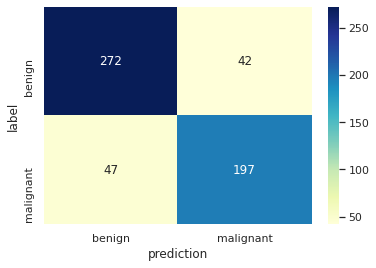

In [13]:
fig = plot_confusion_matrix_ensemble(train_fix_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-train-confusion-matrix.svg", bbox_inches = "tight")

In [14]:
pandas.DataFrame(calculate_confusion_matrix_stats(train_fix_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.840502,272,197,47,42,0.866242,0.807377,0.852665,0.824268,0.192623,0.133758,0.147335,0.83681,0.836292
1,0.840502,197,272,42,47,0.807377,0.866242,0.824268,0.852665,0.133758,0.192623,0.175732,0.83681,0.836292


## ROC Curve

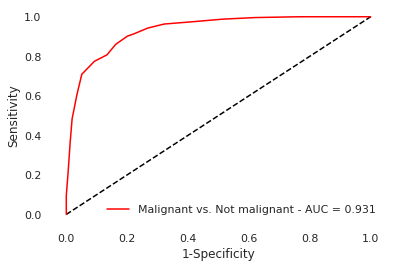

In [15]:
fig = plot_roc_curve(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

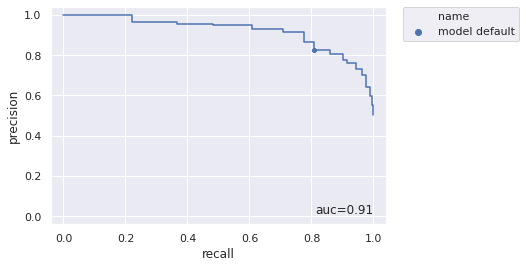

In [16]:
fig = plot_precision_recall(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-precisionrecall.svg", bbox_inches = "tight")

# Validation

In [17]:
model = best_model
predictions = model.predict(validation_set)
probabilities = model.predict_proba(validation_set)
pm.record("validation_labels", list(validation_labels))
pm.record("validation_probabilities", list(probabilities[:,1]))
pm.record("validation_predictions", list(predictions))

In [18]:
print("accuracy: {}".format(metrics.accuracy_score(validation_labels, predictions)))

accuracy: 0.8070175438596491


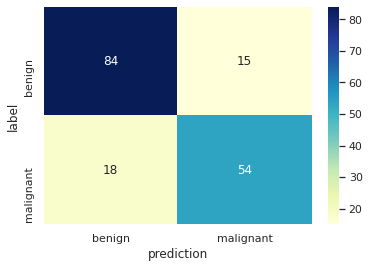

In [19]:
fig = plot_confusion_matrix_ensemble(validation_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-validation-confusion-matrix.svg", bbox_inches = "tight")

In [20]:
pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.807018,84,54,18,15,0.848485,0.750000,0.823529,0.782609,0.250000,0.151515,0.176471,0.799242,0.797724
1,0.807018,54,84,15,18,0.750000,0.848485,0.782609,0.823529,0.151515,0.250000,0.217391,0.799242,0.797724


## ROC Curve

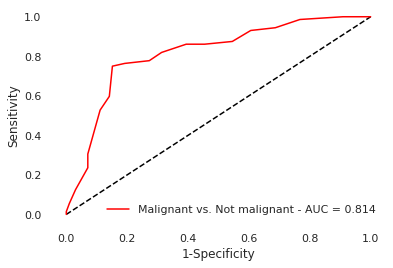

In [21]:
fig = plot_roc_curve(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

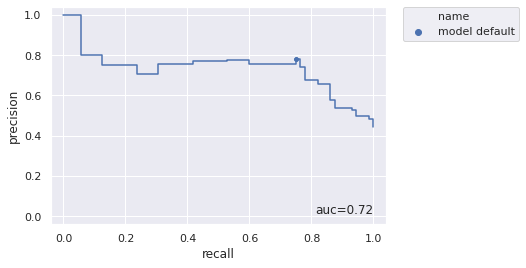

In [22]:
fig = plot_precision_recall(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-precisionrecall.svg", bbox_inches = "tight")

# Test

In [23]:
model = best_model
predictions = model.predict(test_set)
probabilities = model.predict_proba(test_set)
pm.record("test_labels", list(test_labels))
pm.record("test_probabilities", list(probabilities[:,1]))
pm.record("test_predictions", list(predictions))

In [24]:
print("accuracy: {}".format(metrics.accuracy_score(test_labels, predictions)))

accuracy: 0.75


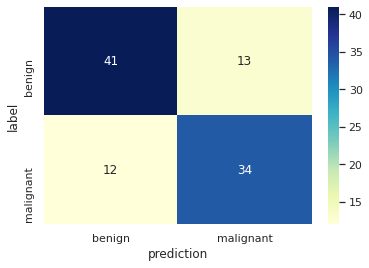

In [25]:
fig = plot_confusion_matrix_ensemble(test_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [26]:
len(test_labels)

100

In [27]:
pandas.DataFrame(calculate_confusion_matrix_stats(test_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.75,41,34,12,13,0.759259,0.739130,0.773585,0.723404,0.260870,0.240741,0.226415,0.749195,0.749127
1,0.75,34,41,13,12,0.739130,0.759259,0.723404,0.773585,0.240741,0.260870,0.276596,0.749195,0.749127


## ROC Curve

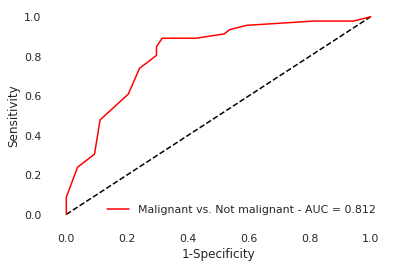

In [28]:
fig = plot_roc_curve(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

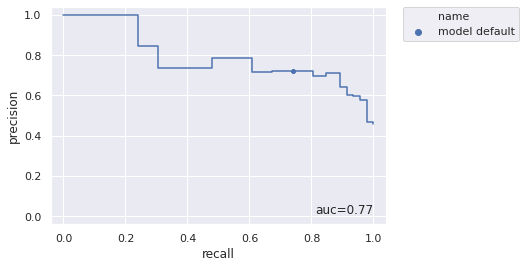

In [29]:
fig = plot_precision_recall(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-precisionrecall.svg", bbox_inches = "tight")

In [30]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')